In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import zipfile
import os
zip_file_path='/content/drive/MyDrive/archive (3).zip'
destination='/content/flower_dataset'

if not os.path.exists(destination):
  os.makedirs(destination)

with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
  zip_ref.extractall(destination)

print(f"Extracted files to {destination}")


Extracted files to /content/flower_dataset


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import os



In [28]:
image_size=64
channels_img=3
latent_dim=100
features_gen=64
features_disc=64
batch_size=128
num_epochs=200
learning_rate=0.0002

In [29]:
os.makedirs("generated",exist_ok=True)

In [30]:
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.CenterCrop(image_size),  s
    transforms.ToTensor(),
    transforms.Normalize([0.5 for _ in range(channels_img)], [0.5 for _ in range(channels_img)])
])


In [31]:
dataset=datasets.ImageFolder(root='/content/flower_dataset',transform=transform)
dataloader=DataLoader(dataset=dataset,batch_size=batch_size,shuffle=True)

In [32]:
class Discriminator(nn.Module):
  def __init__(self,channels_img,feature_disc):
    super(Discriminator,self).__init__()

    self.net=nn.Sequential(
        nn.Conv2d(channels_img,features_disc,kernel_size=4,stride=2,padding=1),
        nn.LeakyReLU(0.2),
        nn.Conv2d(features_disc,features_disc*2,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(features_disc*2),
        nn.LeakyReLU(0.2),
        nn.Conv2d(features_disc*2,features_disc*4,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(features_disc*4),
        nn.LeakyReLU(0.2),
        nn.Conv2d(features_disc*4,features_disc*8,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(features_disc*8),
        nn.LeakyReLU(0.2),
        nn.Conv2d(features_disc*8,1,kernel_size=4,stride=2,padding=0),
        nn.Sigmoid()


    )
  def forward(self,x):
    return self.net(x).view(-1)

class Generator(nn.Module):
  def __init__(self,latent_dim,channels_img,features_gen):
    super(Generator,self).__init__()
    self.net=nn.Sequential(
        nn.ConvTranspose2d(latent_dim,features_gen*8,kernel_size=4,stride=1,padding=0),
        nn.BatchNorm2d(features_gen*8),
        nn.ReLU(),
        nn.ConvTranspose2d(features_gen*8,features_gen*4,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(features_gen*4),
        nn.ReLU(),
        nn.ConvTranspose2d(features_gen*4,features_gen*2,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(features_gen*2),
        nn.ReLU(),
        nn.ConvTranspose2d(features_gen*2,features_gen,kernel_size=4,stride=2,padding=1),
        nn.BatchNorm2d(features_gen),
        nn.ReLU(),
        nn.ConvTranspose2d(features_gen,channels_img,kernel_size=4,stride=2,padding=1),
        nn.Tanh()

    )

  def forward(self,x):
    return self.net(x)


In [33]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [34]:
gen=Generator(latent_dim,channels_img,features_gen).to(device)
disc=Discriminator(channels_img,features_disc).to(device)

optimizer_gen=optim.Adam(gen.parameters(),lr=learning_rate,betas=(0.5,0.999))
optimizer_disc=optim.Adam(disc.parameters(),lr=learning_rate,betas=(0.5,0.999))

criterion=nn.BCELoss()

In [35]:
fixed_noise=torch.randn(32,latent_dim,1,1).to(device)

Epoch [0/200]  Loss D: 0.0931, Loss G: 8.1050


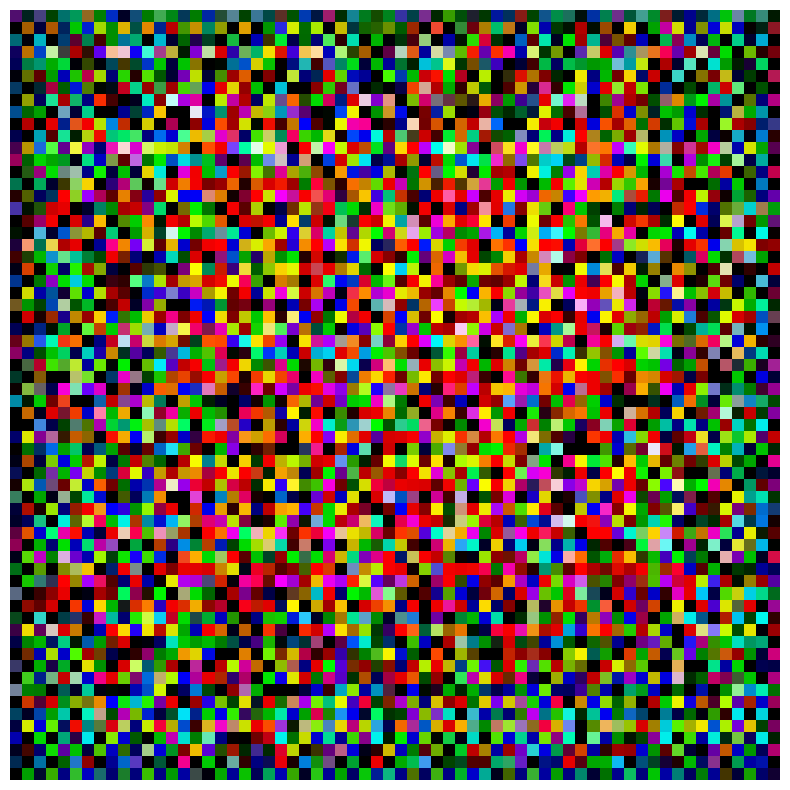

Epoch [1/200]  Loss D: 0.0736, Loss G: 11.6058


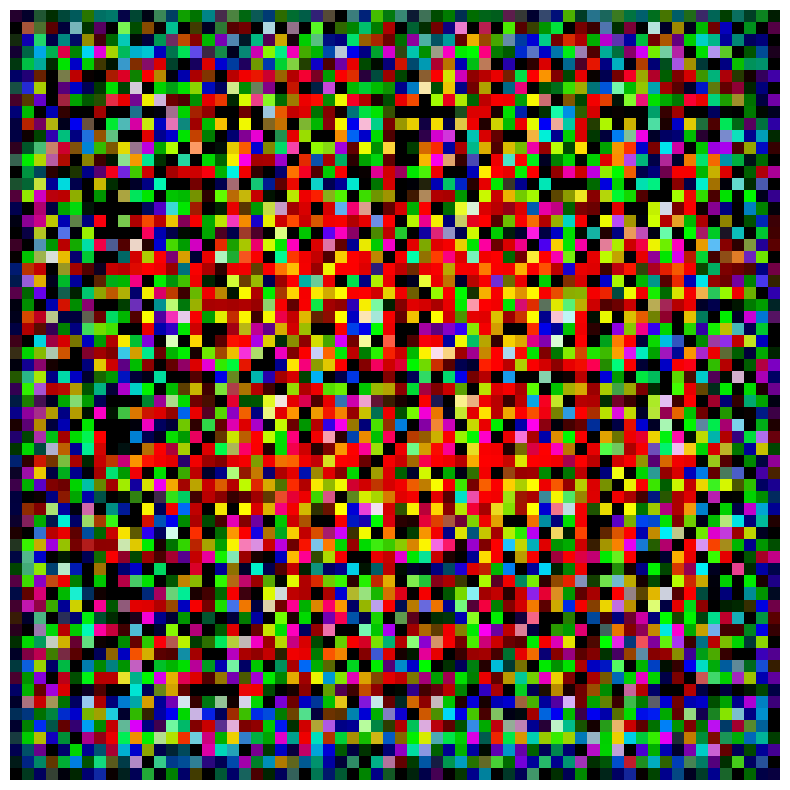

Epoch [2/200]  Loss D: 0.6379, Loss G: 15.3716


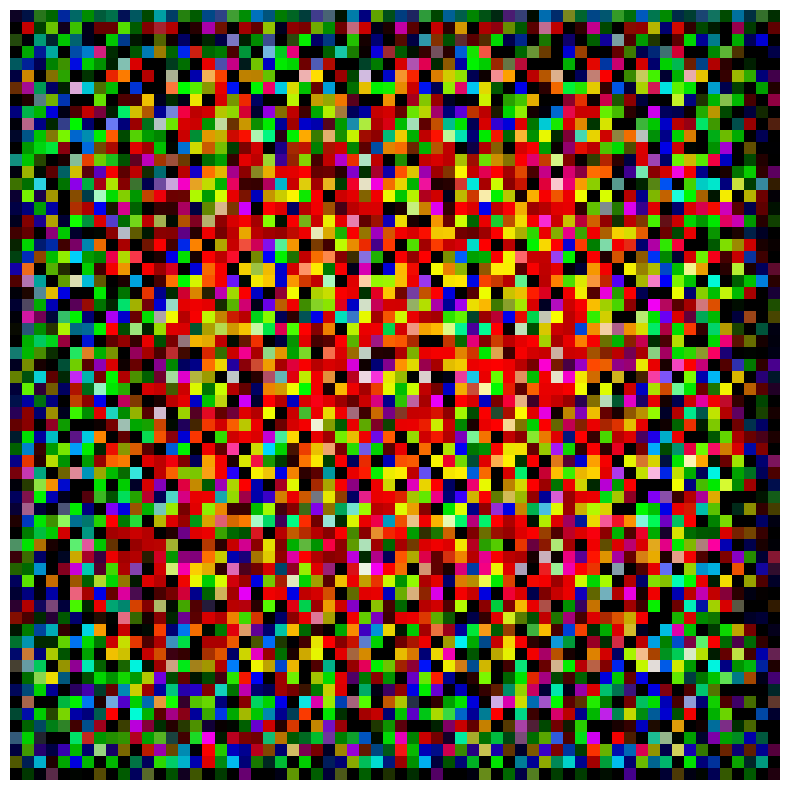

Epoch [3/200]  Loss D: 0.0112, Loss G: 6.4599


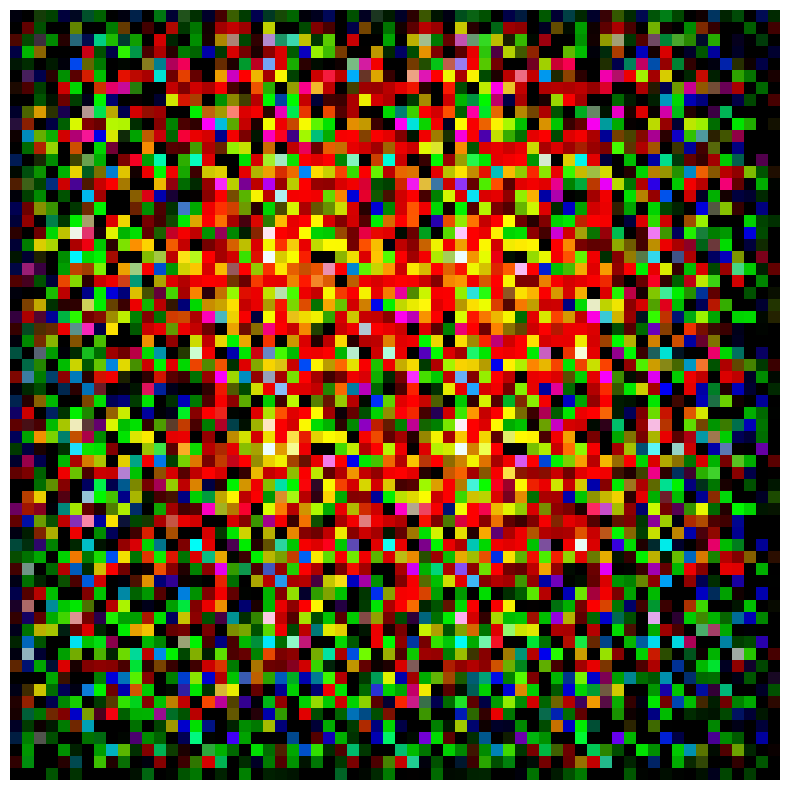

Epoch [4/200]  Loss D: 0.3099, Loss G: 7.7883


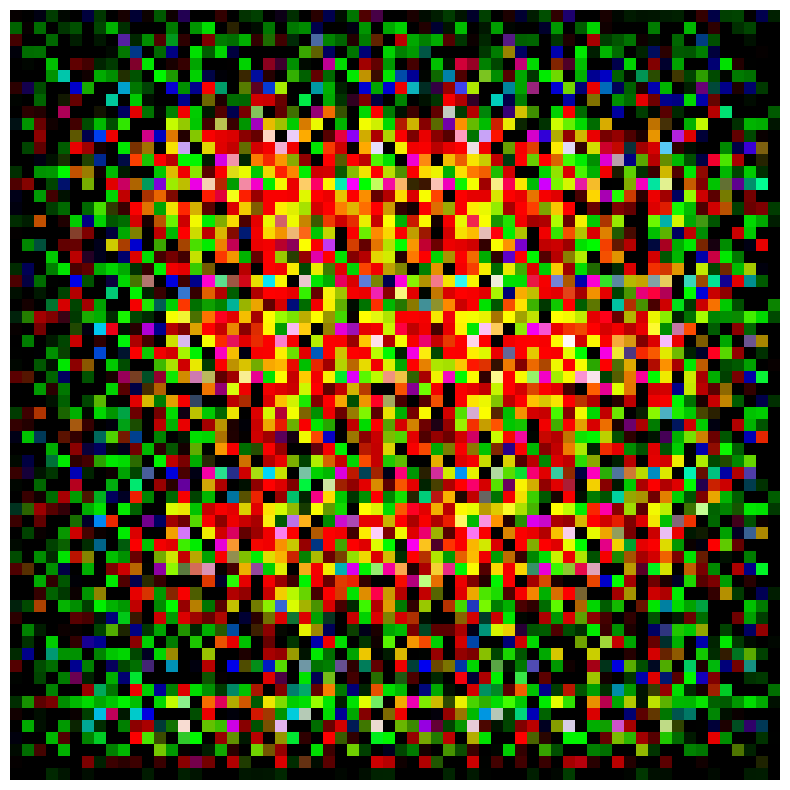

Epoch [5/200]  Loss D: 0.4418, Loss G: 14.2818


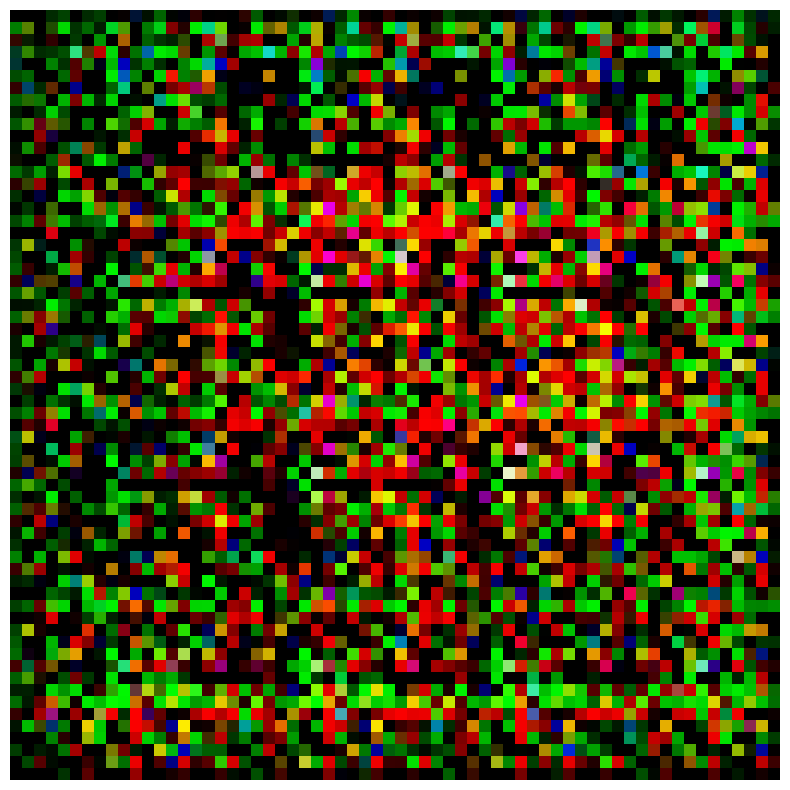

Epoch [6/200]  Loss D: 0.0724, Loss G: 9.9814


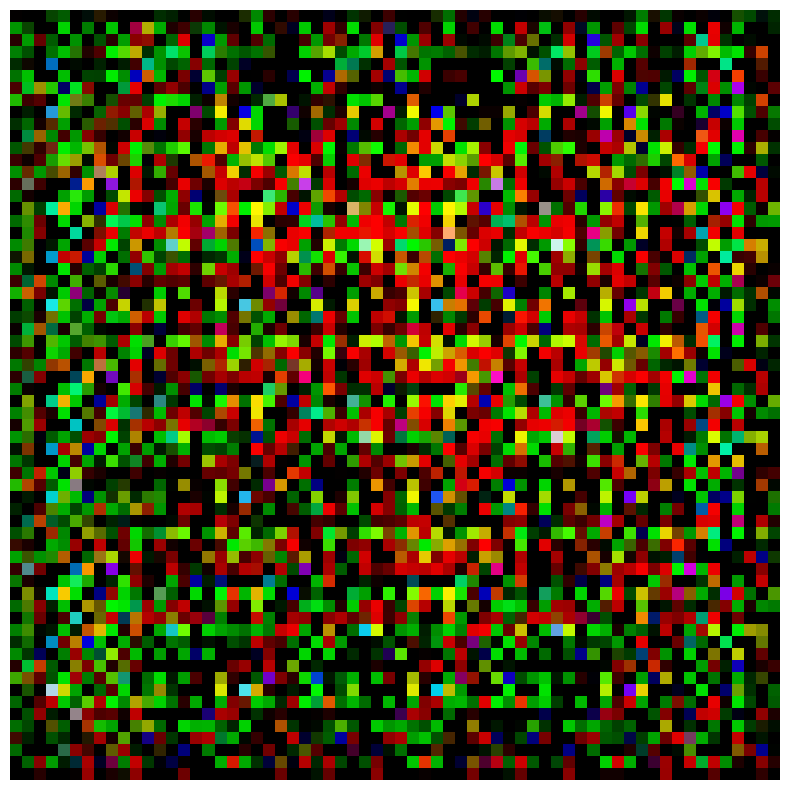

Epoch [7/200]  Loss D: 0.7594, Loss G: 8.9579


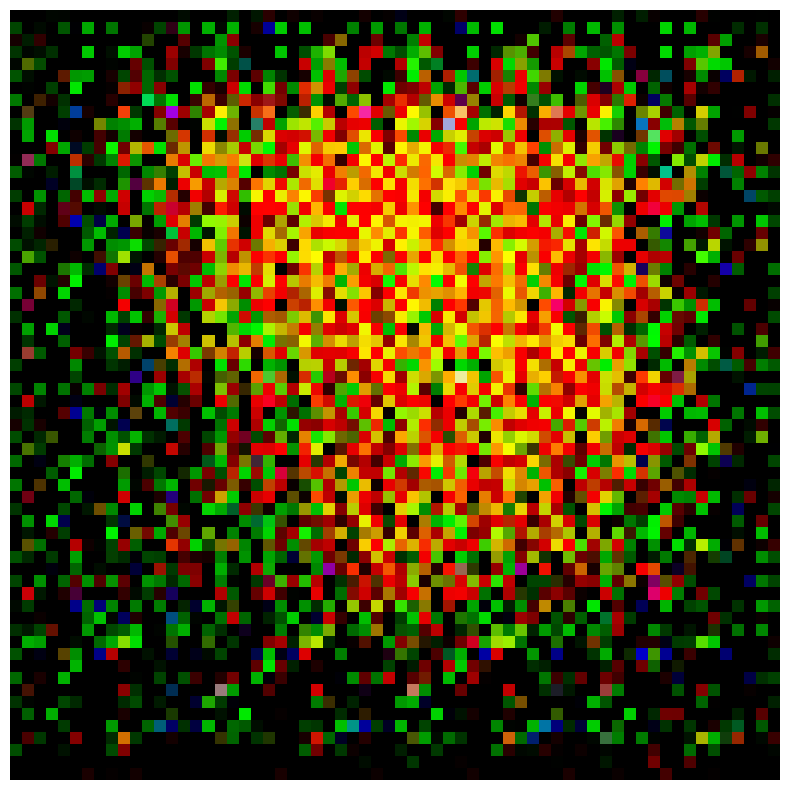

Epoch [8/200]  Loss D: 0.8061, Loss G: 9.3664


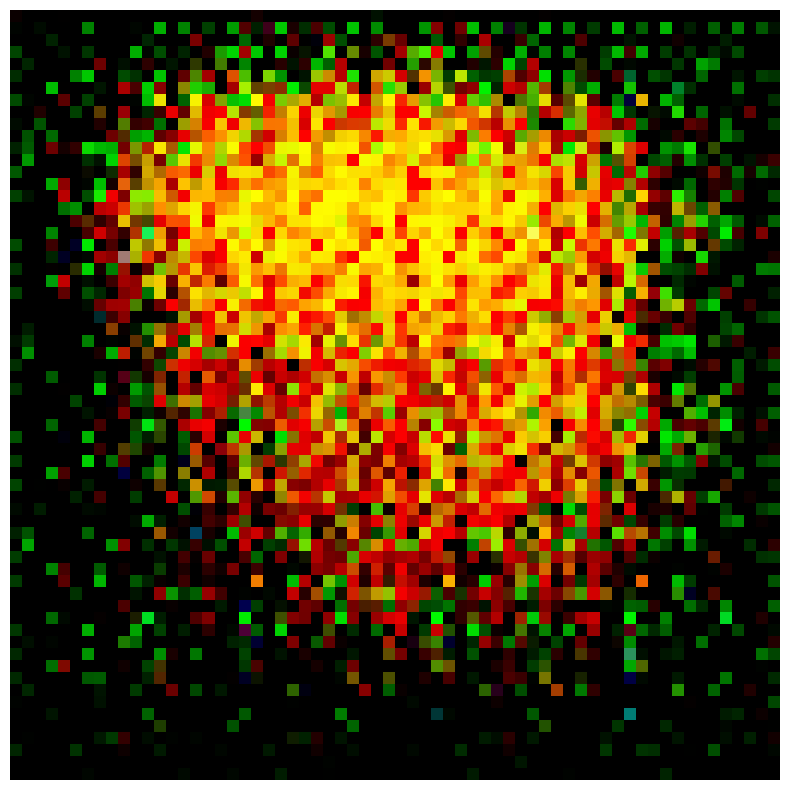

Epoch [9/200]  Loss D: 0.3513, Loss G: 2.3364


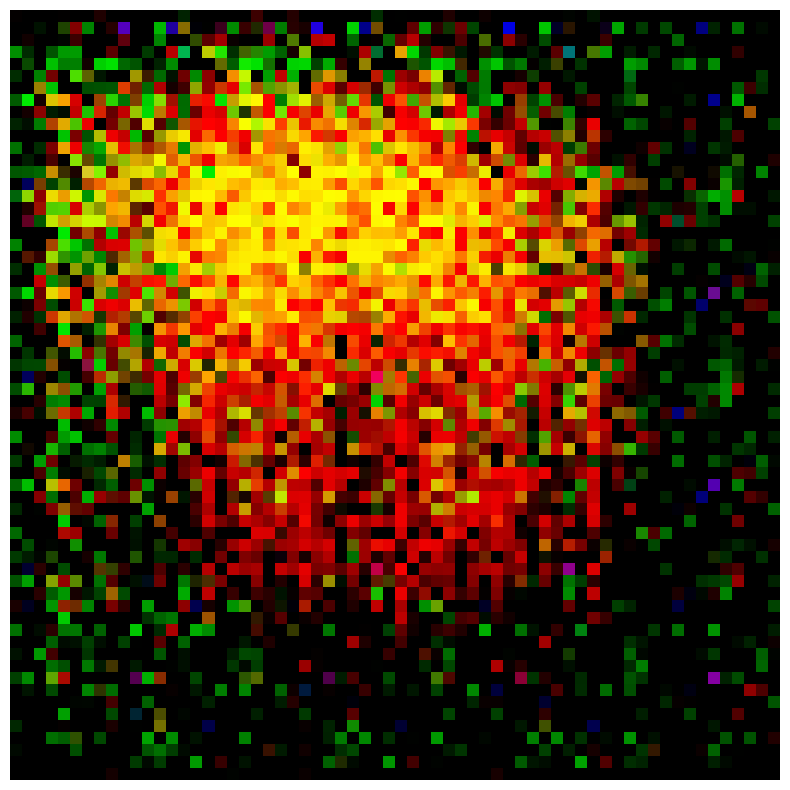

Epoch [10/200]  Loss D: 0.2369, Loss G: 6.1789


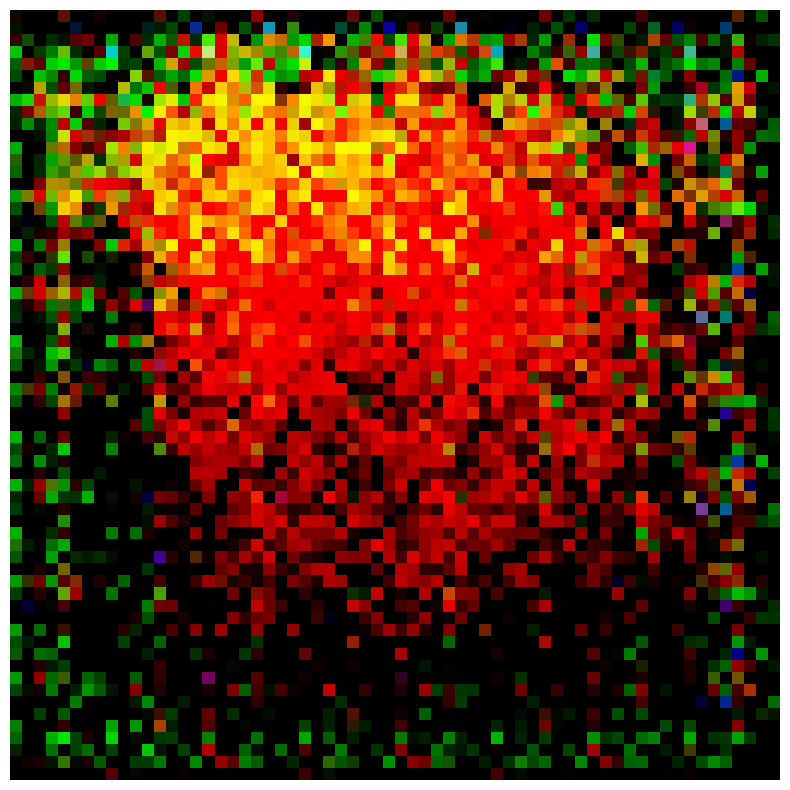

Epoch [11/200]  Loss D: 0.8818, Loss G: 1.2975


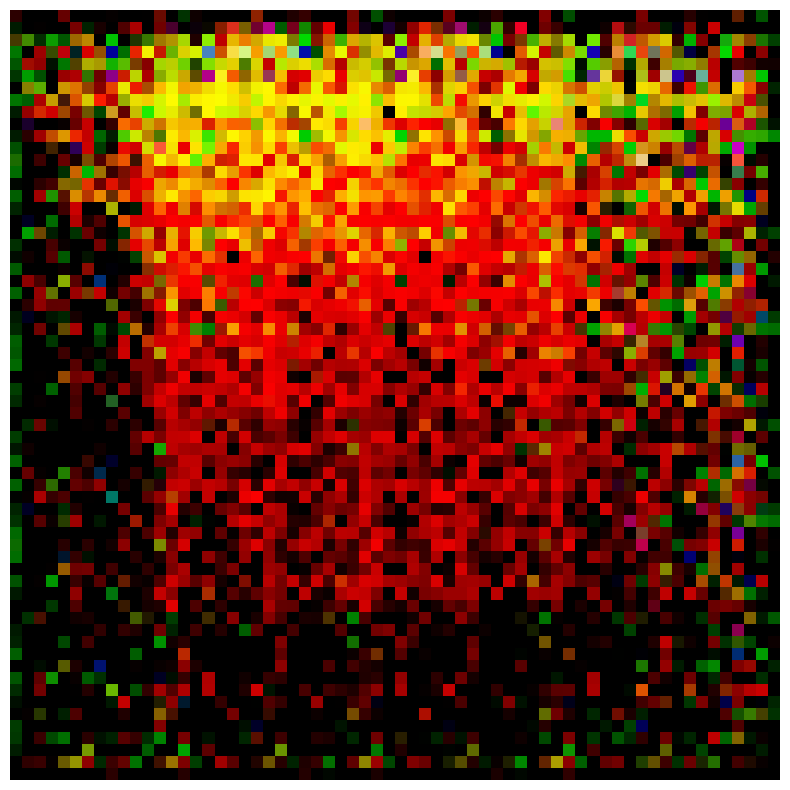

Epoch [12/200]  Loss D: 0.3137, Loss G: 6.0913


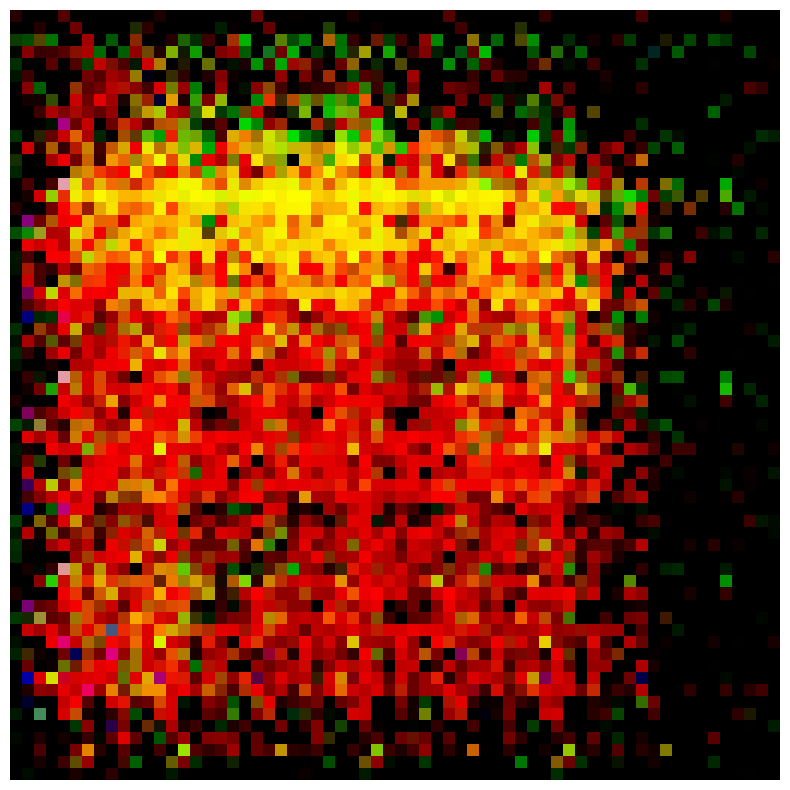

Epoch [13/200]  Loss D: 0.1556, Loss G: 4.5301


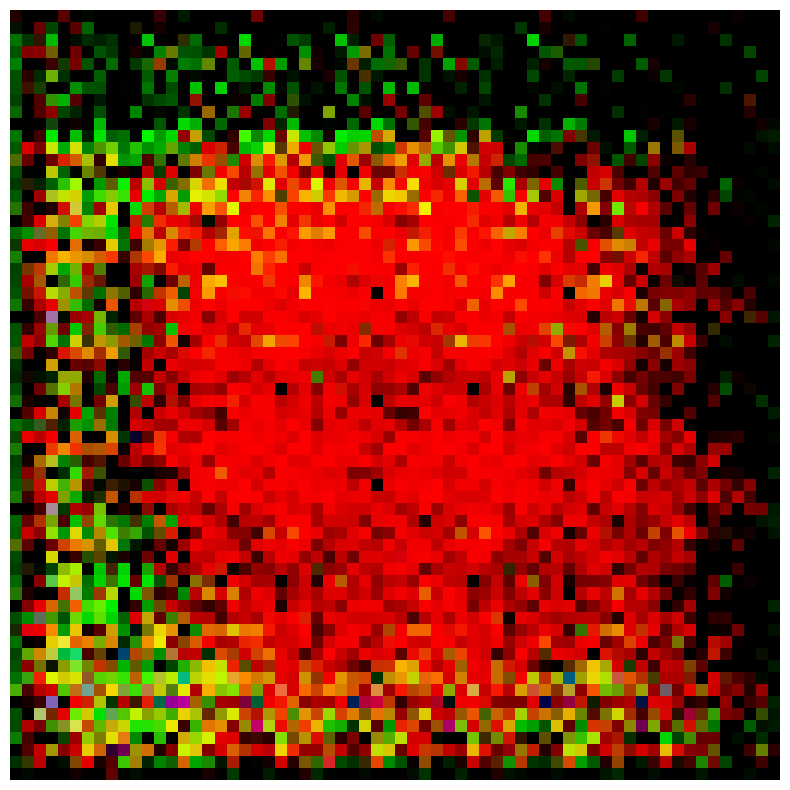

Epoch [14/200]  Loss D: 0.4272, Loss G: 5.6525


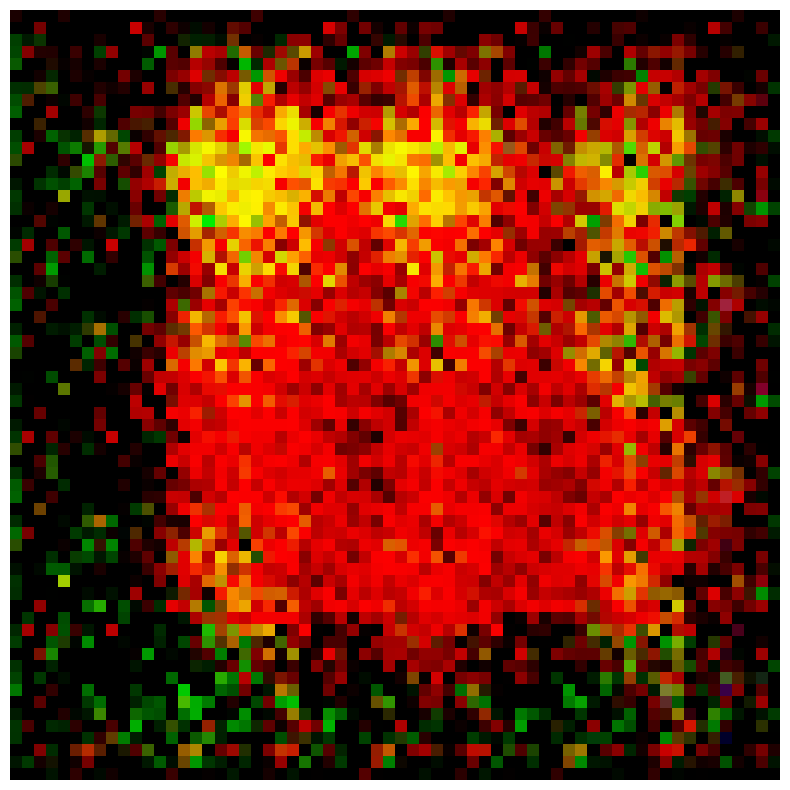

Epoch [15/200]  Loss D: 0.1565, Loss G: 5.9602


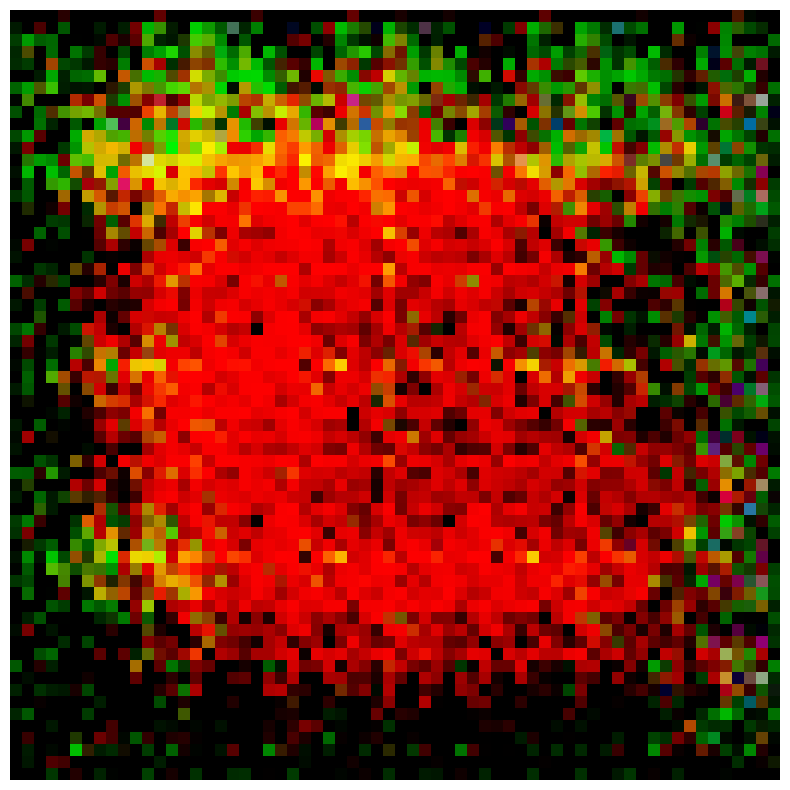

Epoch [16/200]  Loss D: 0.2895, Loss G: 10.2177


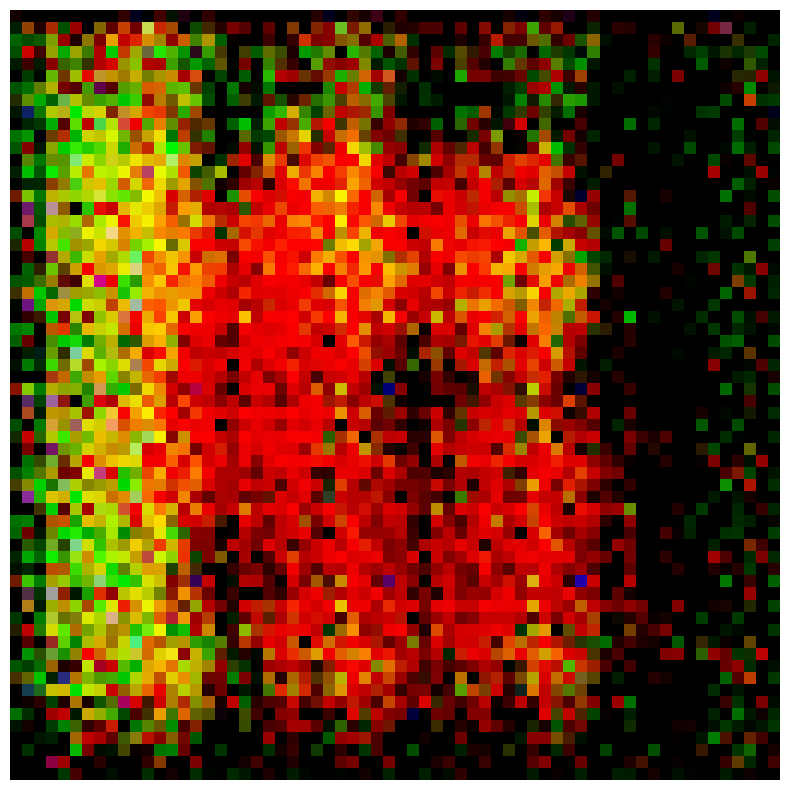

Epoch [17/200]  Loss D: 0.7139, Loss G: 1.7278


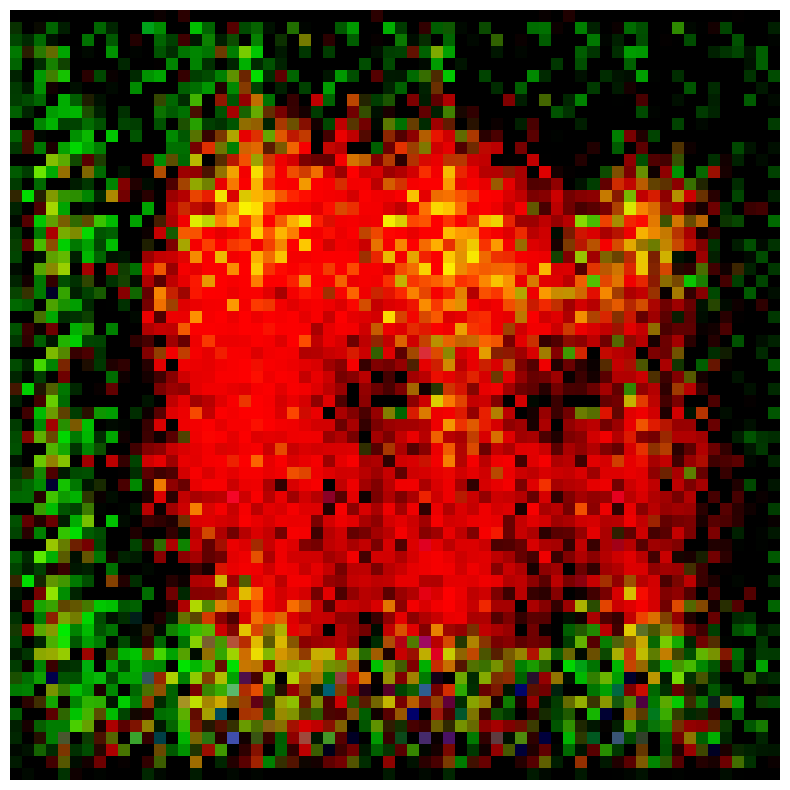

Epoch [18/200]  Loss D: 0.4250, Loss G: 3.1250


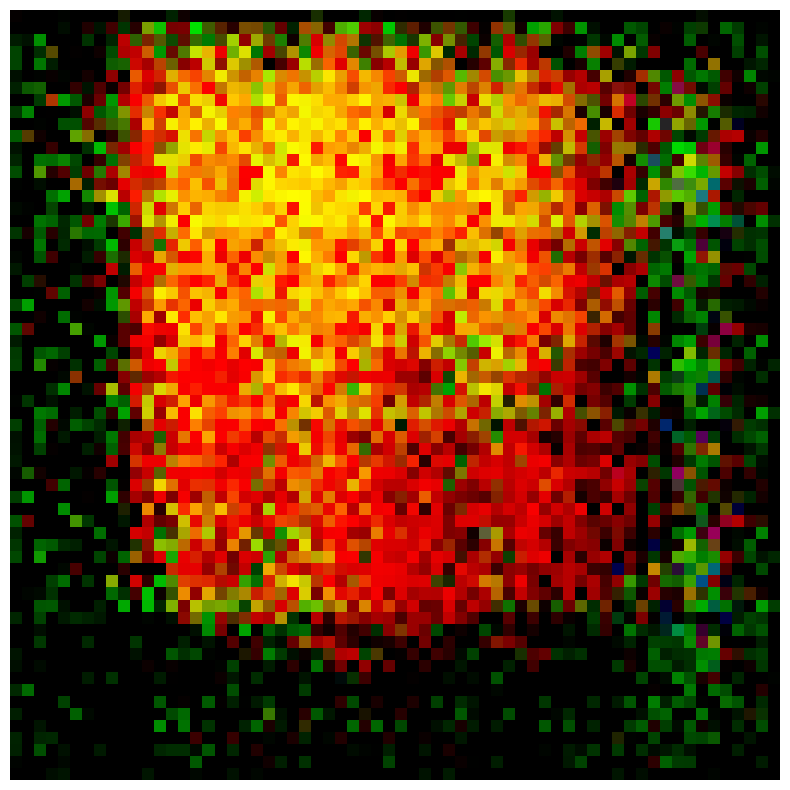

Epoch [19/200]  Loss D: 0.1646, Loss G: 3.6546


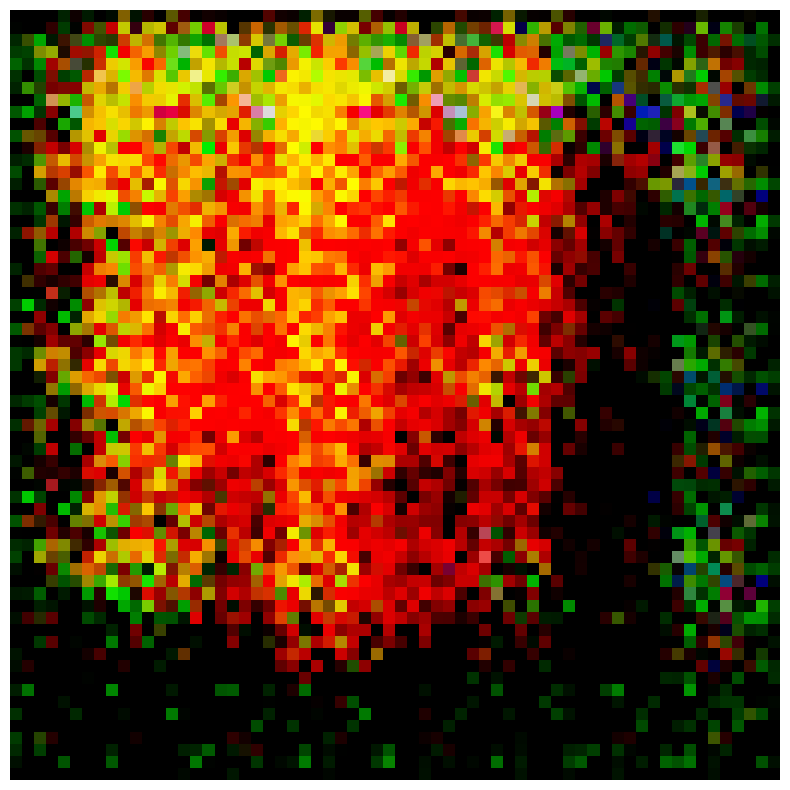

Epoch [20/200]  Loss D: 0.3417, Loss G: 2.7273


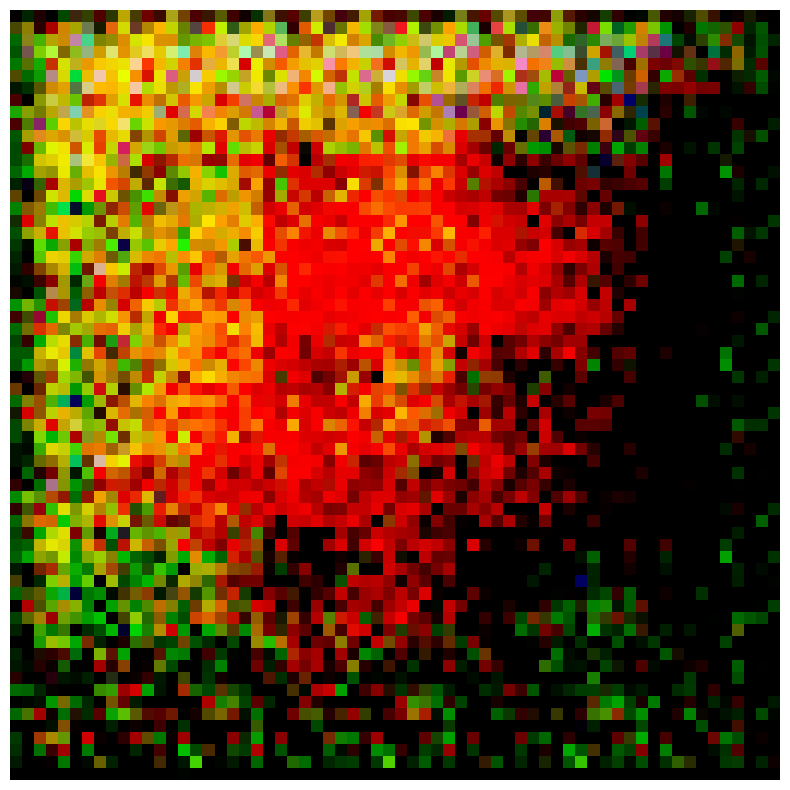

Epoch [21/200]  Loss D: 0.5794, Loss G: 1.8204


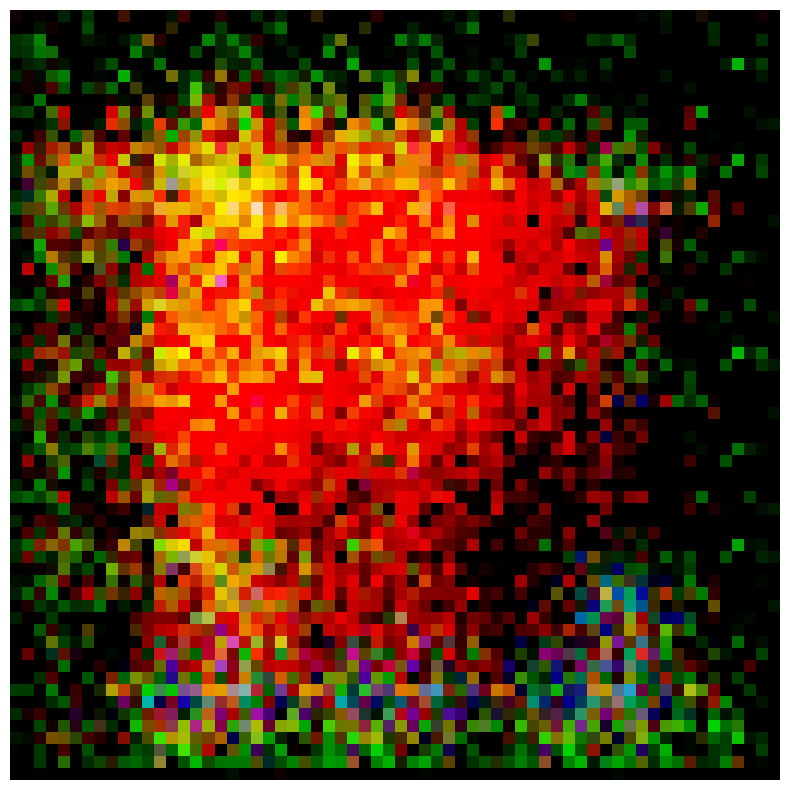

Epoch [22/200]  Loss D: 0.8114, Loss G: 3.1090


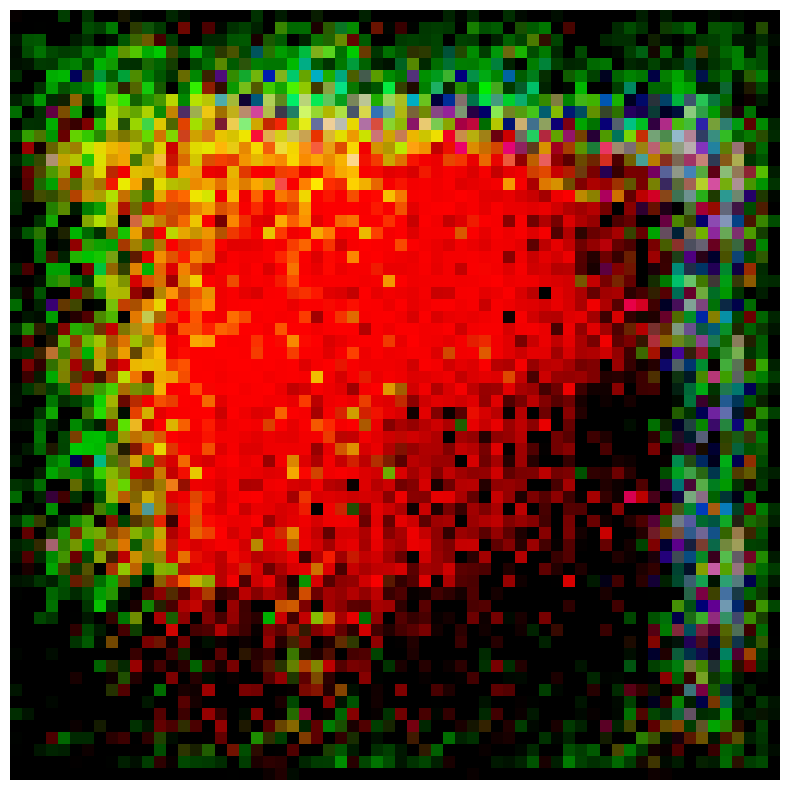

Epoch [23/200]  Loss D: 1.6193, Loss G: 6.1926


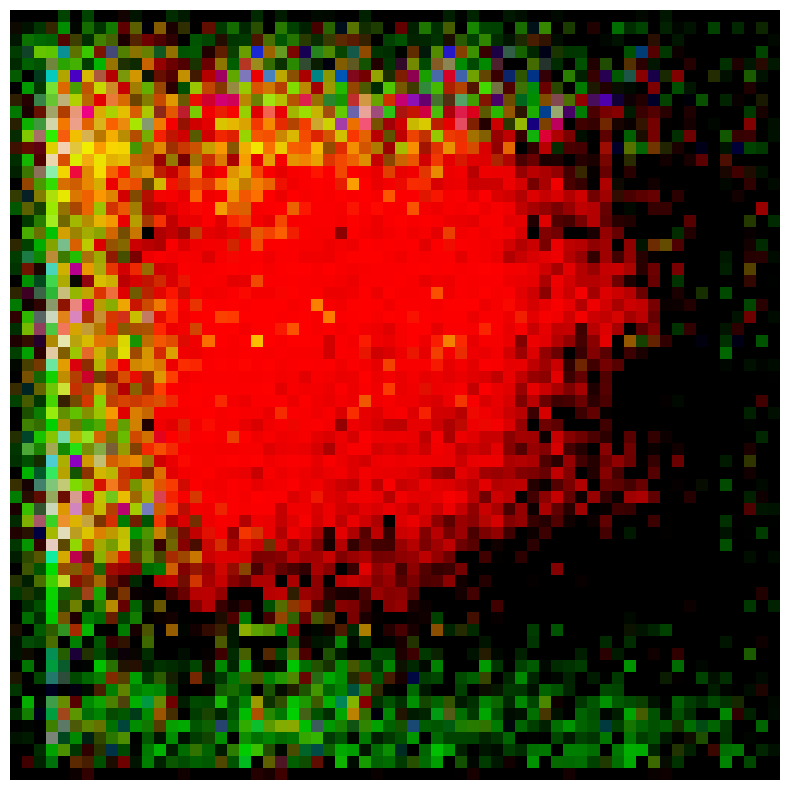

Epoch [24/200]  Loss D: 0.7024, Loss G: 2.1242


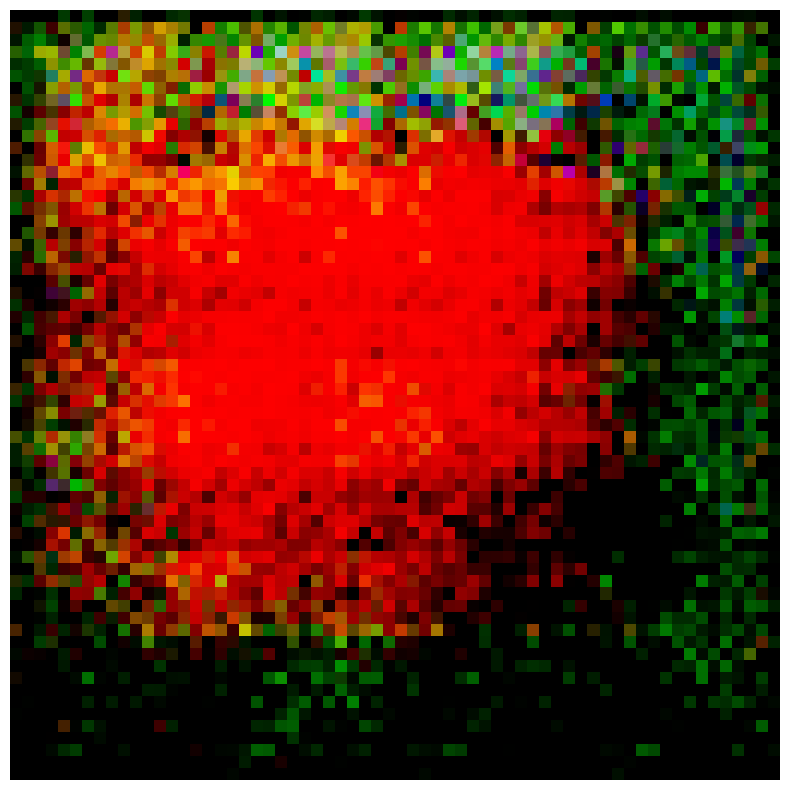

Epoch [25/200]  Loss D: 0.3768, Loss G: 1.4206


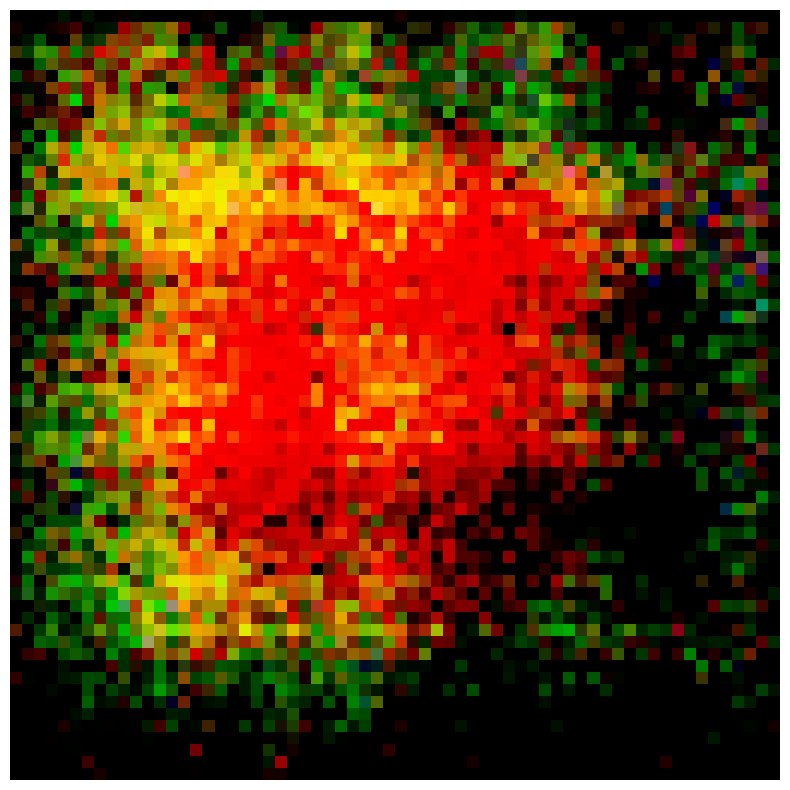

Epoch [26/200]  Loss D: 0.5732, Loss G: 0.4635


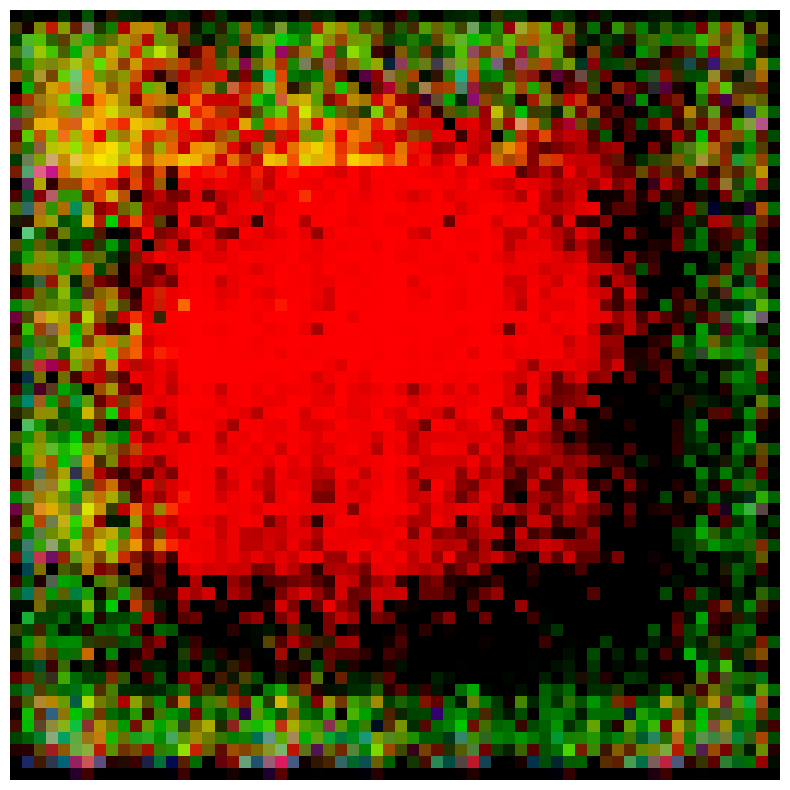

Epoch [27/200]  Loss D: 0.7214, Loss G: 1.2268


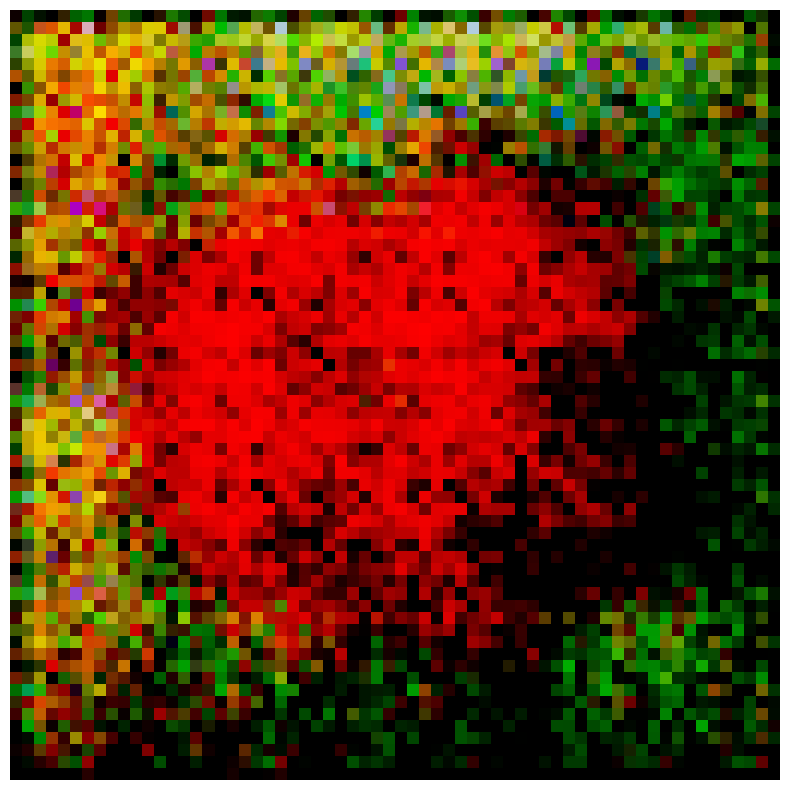

Epoch [28/200]  Loss D: 0.4471, Loss G: 2.2274


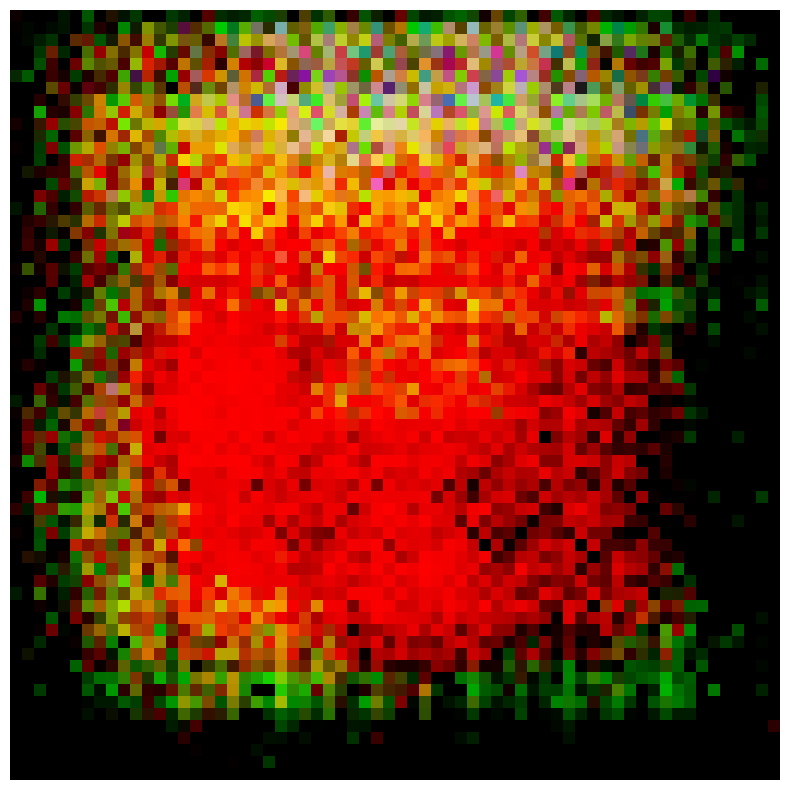

Epoch [29/200]  Loss D: 0.2446, Loss G: 3.3066


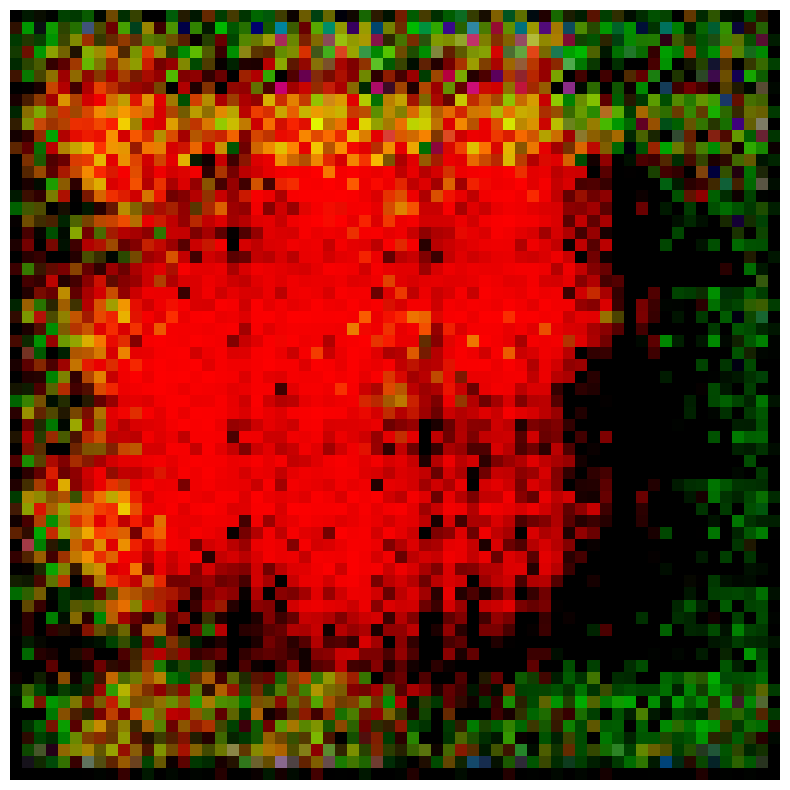

Epoch [30/200]  Loss D: 0.4767, Loss G: 2.4442


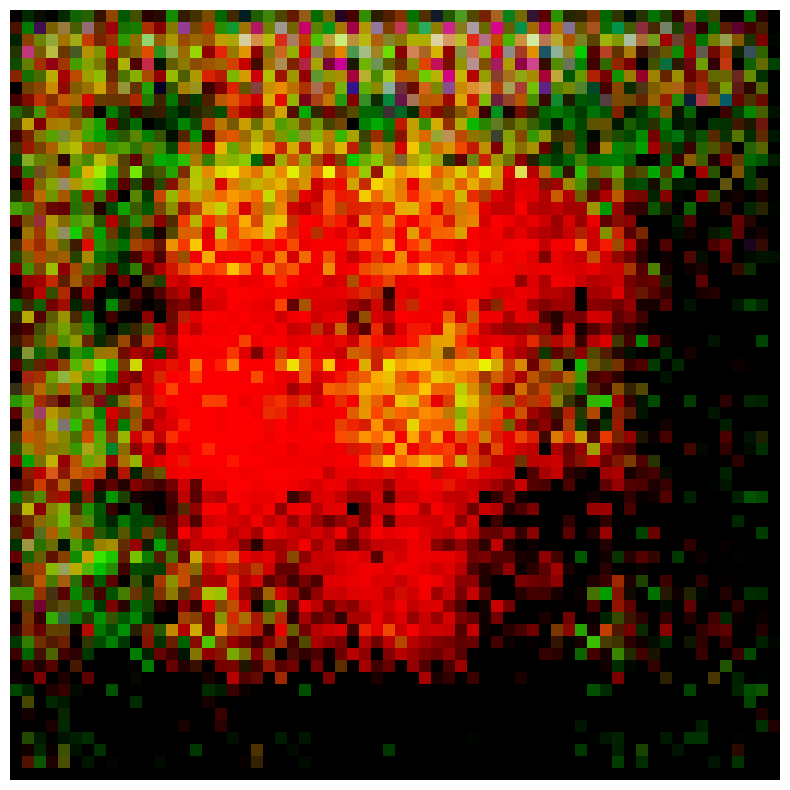

Epoch [31/200]  Loss D: 0.5022, Loss G: 2.8736


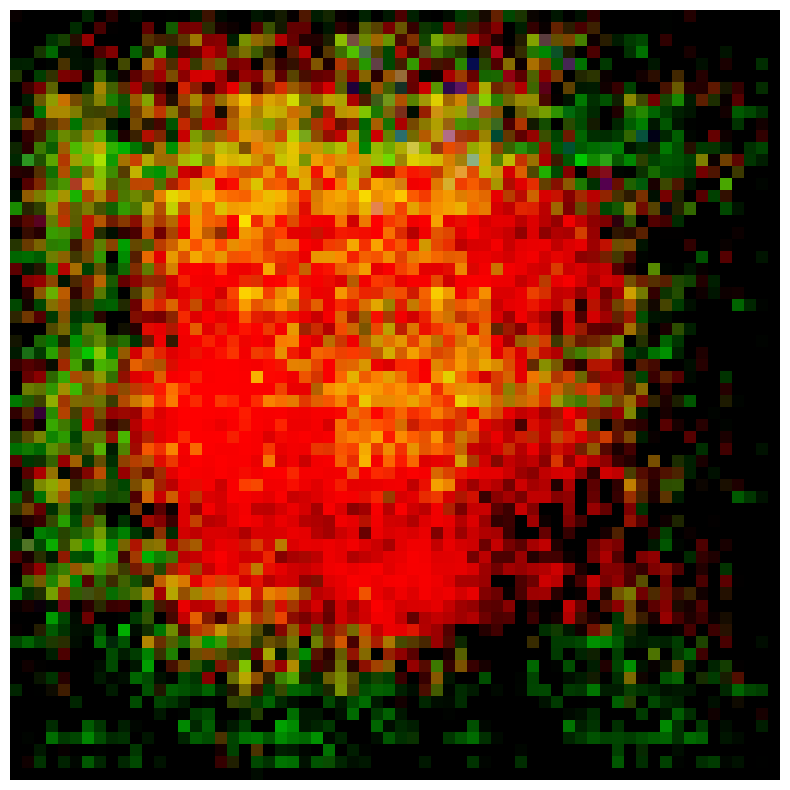

Epoch [32/200]  Loss D: 0.2727, Loss G: 5.3610


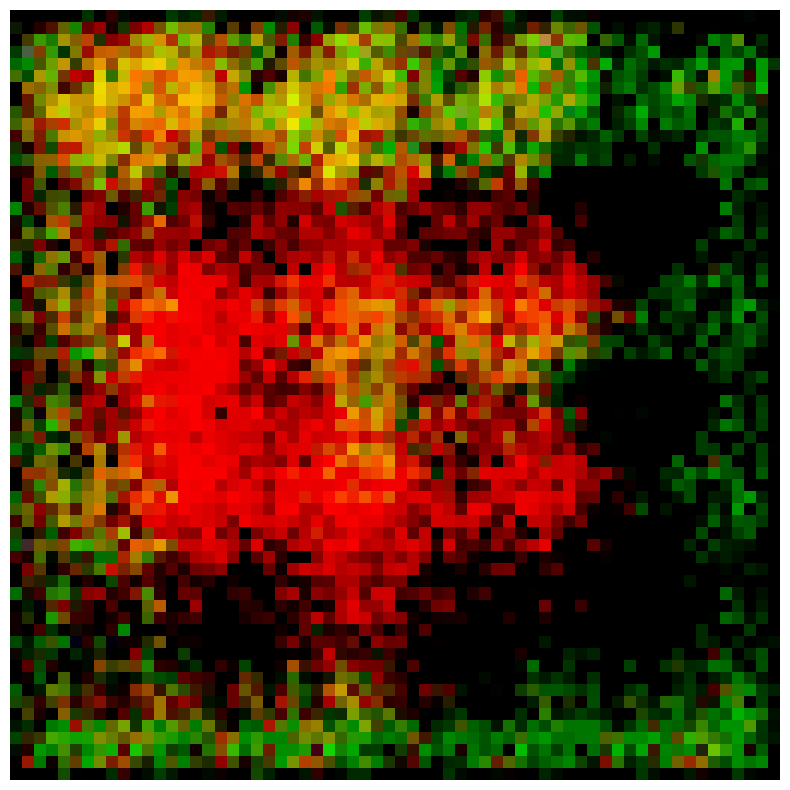

Epoch [33/200]  Loss D: 0.4341, Loss G: 1.4295


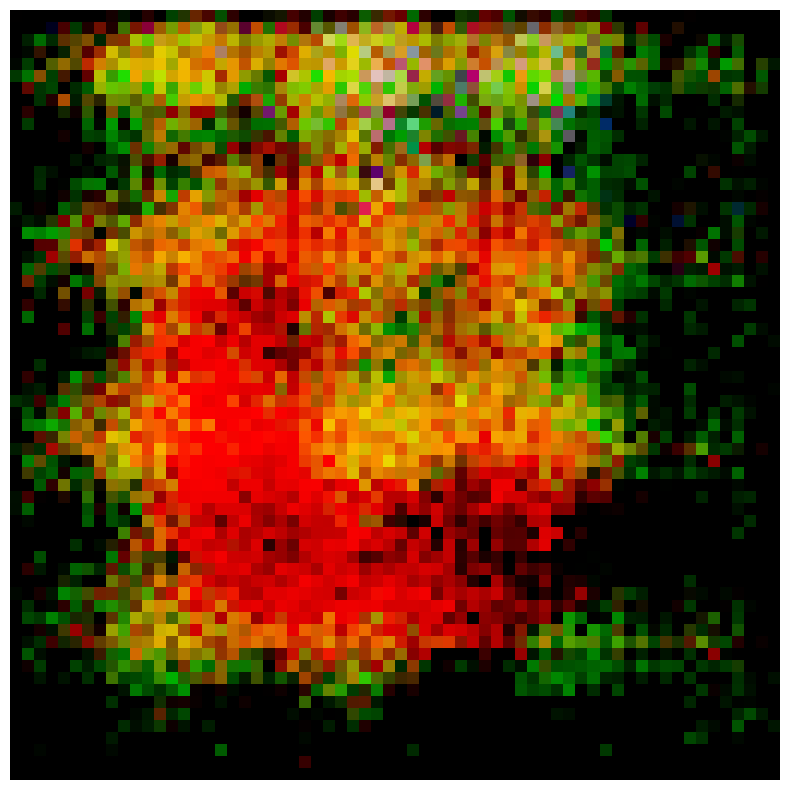

Epoch [34/200]  Loss D: 0.7062, Loss G: 6.8733


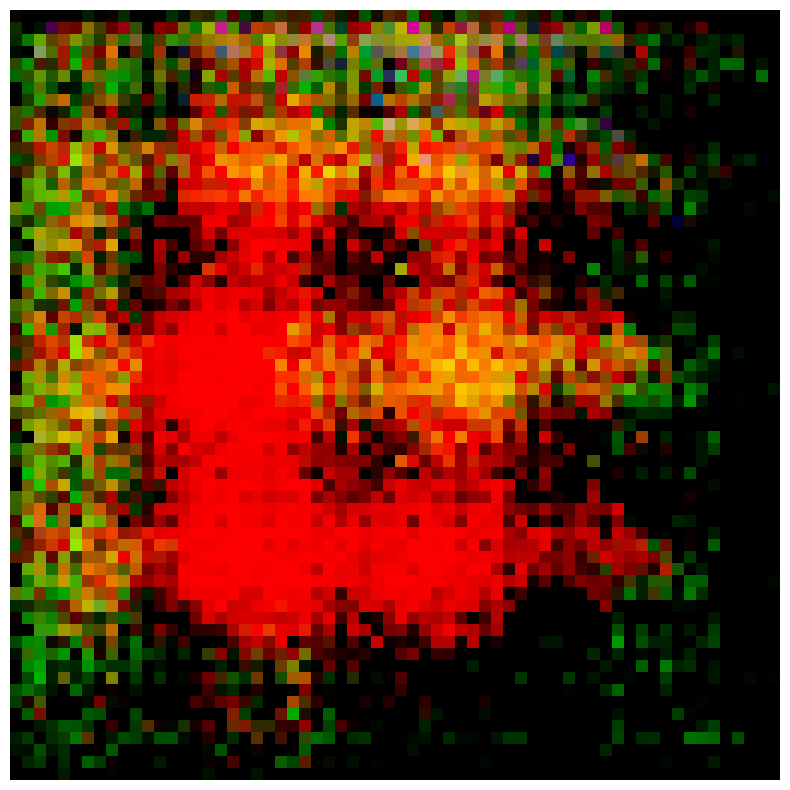

Epoch [35/200]  Loss D: 0.6486, Loss G: 1.9282


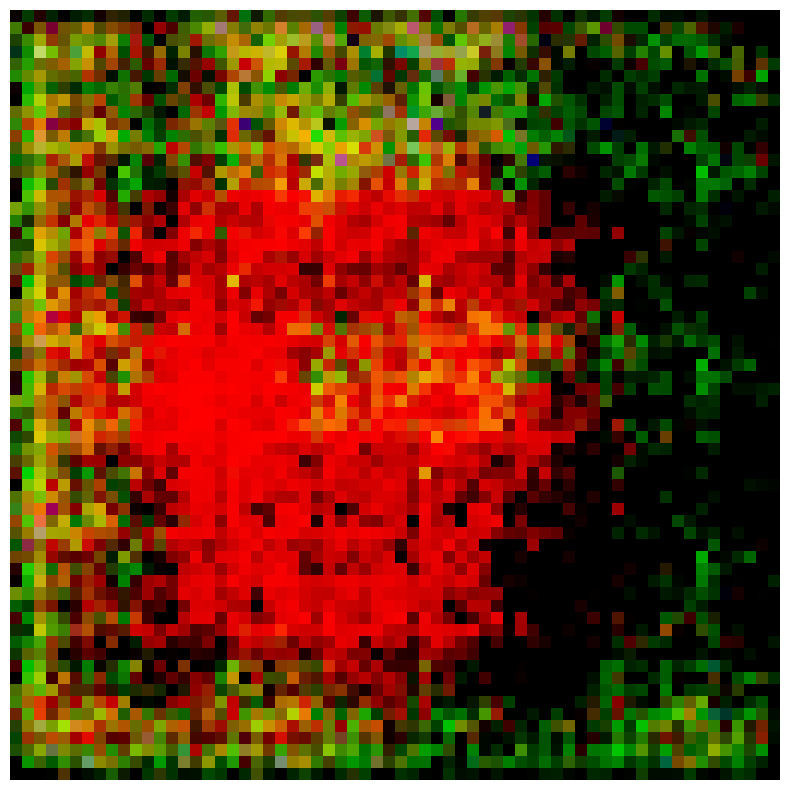

Epoch [36/200]  Loss D: 0.3377, Loss G: 2.0290


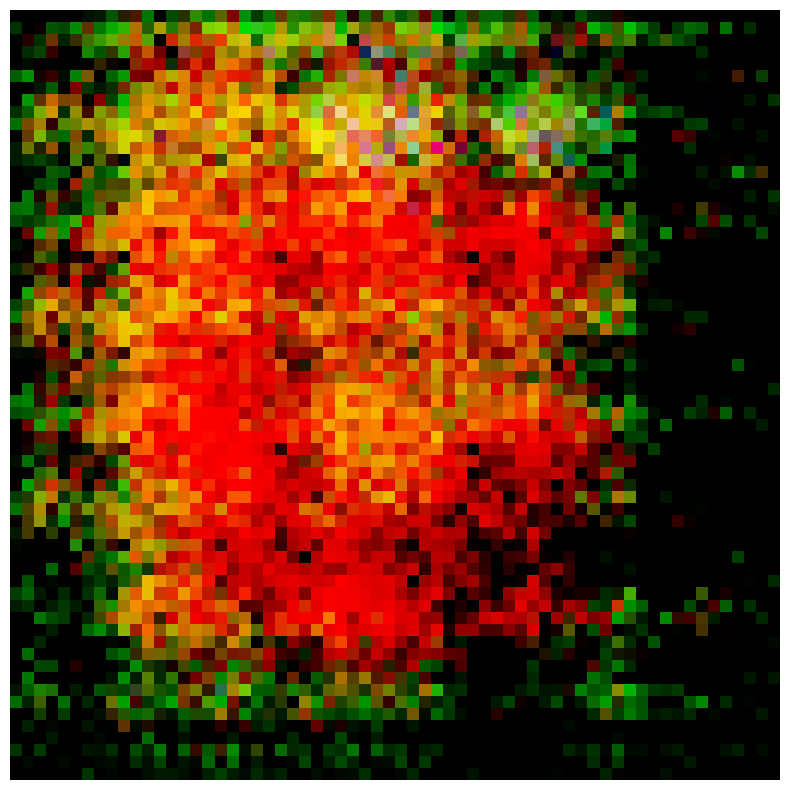

Epoch [37/200]  Loss D: 0.2602, Loss G: 3.9277


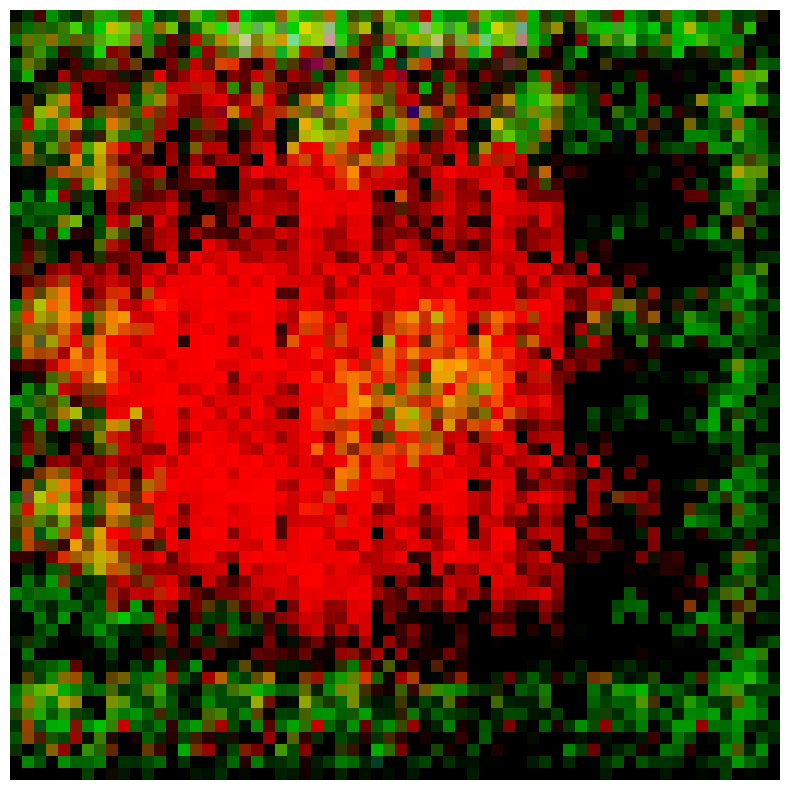

Epoch [38/200]  Loss D: 0.3709, Loss G: 4.1101


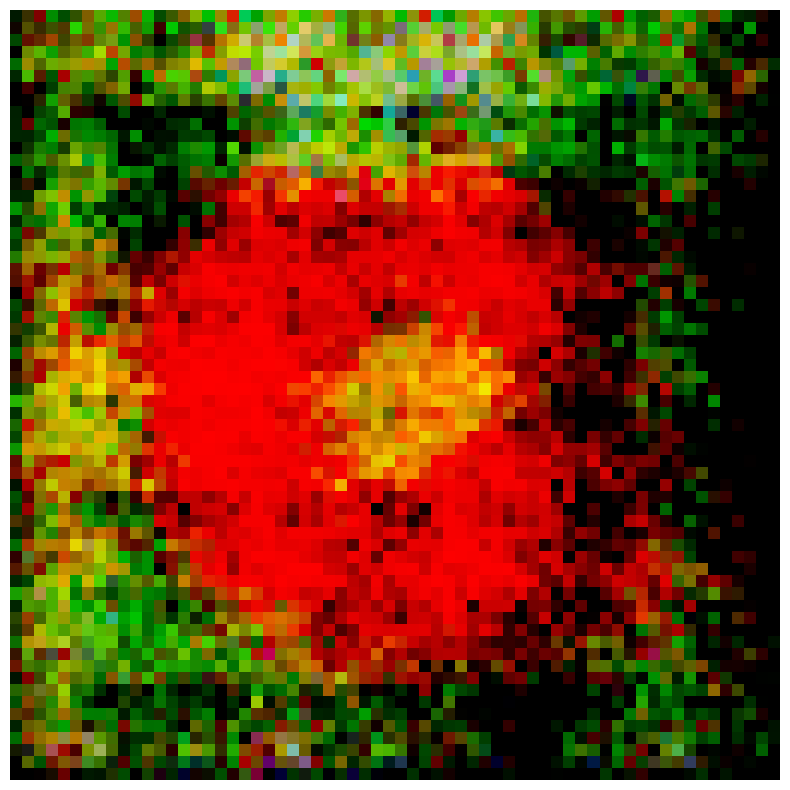

Epoch [39/200]  Loss D: 0.6126, Loss G: 1.7512


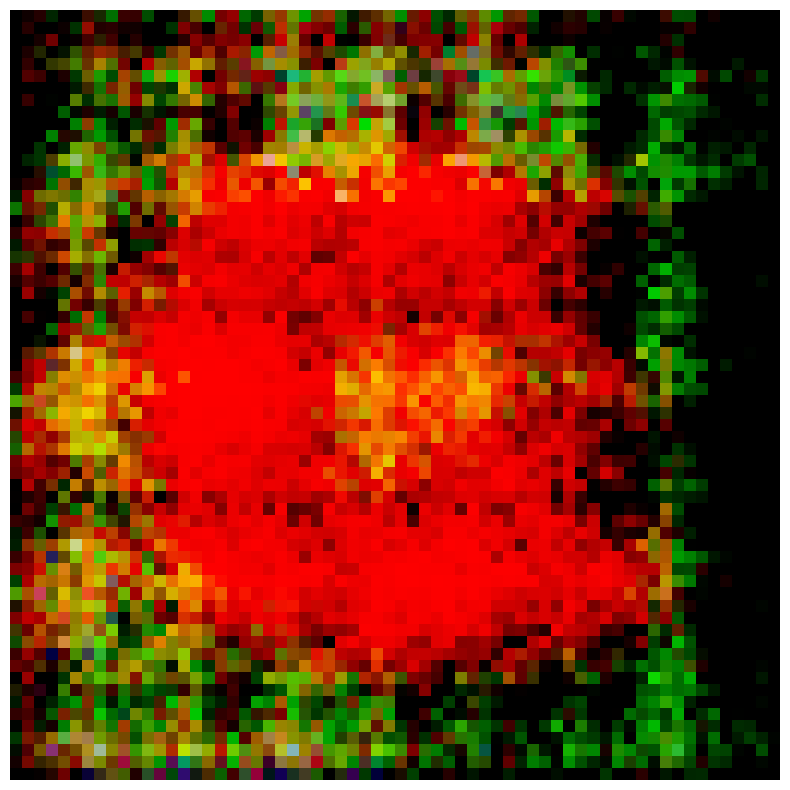

Epoch [40/200]  Loss D: 0.1578, Loss G: 3.7565


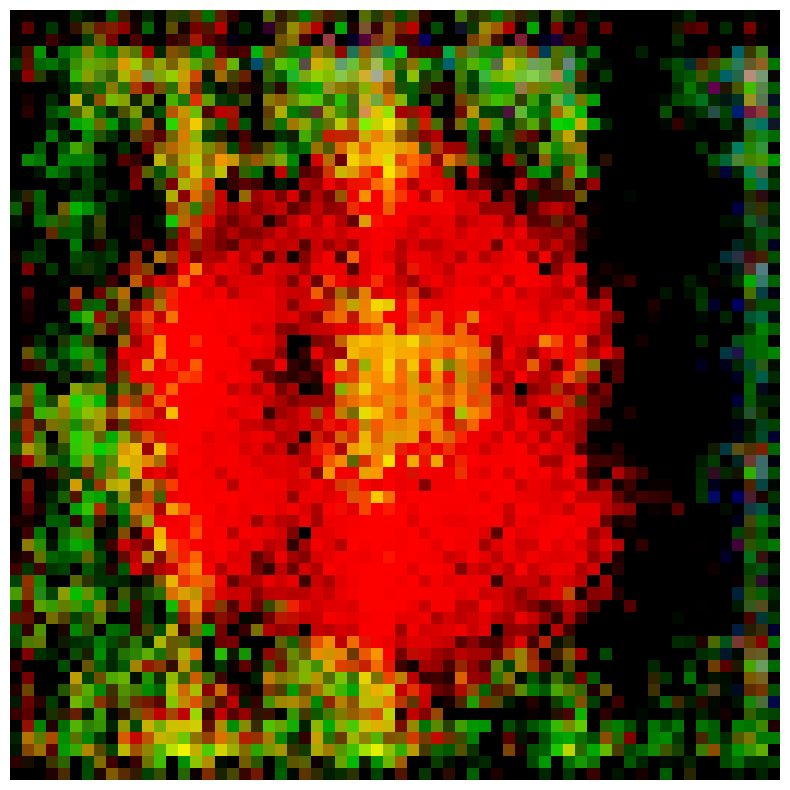

Epoch [41/200]  Loss D: 0.8430, Loss G: 0.3107


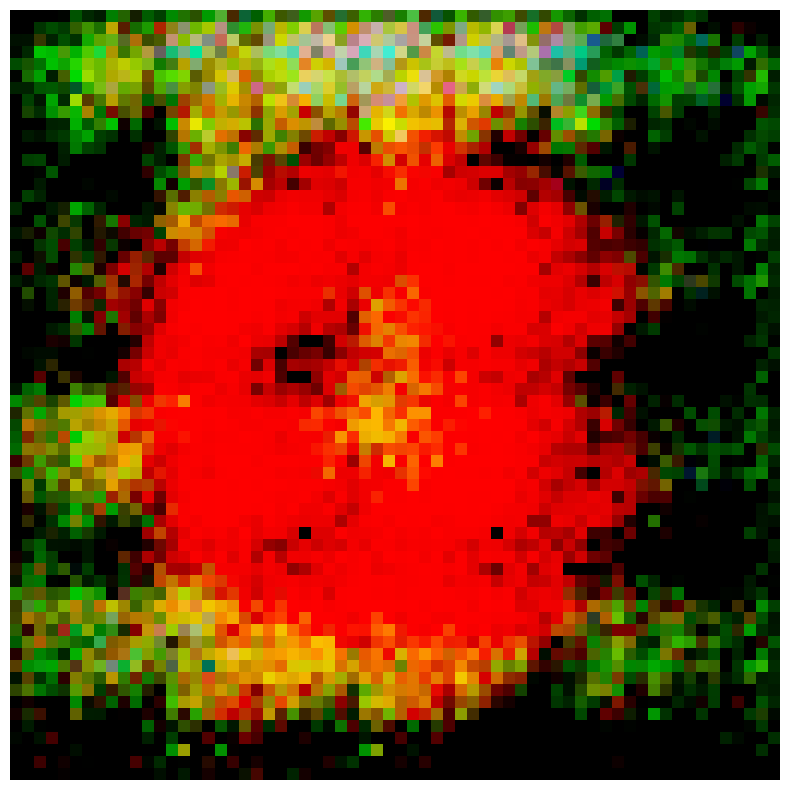

Epoch [42/200]  Loss D: 0.3476, Loss G: 3.8057


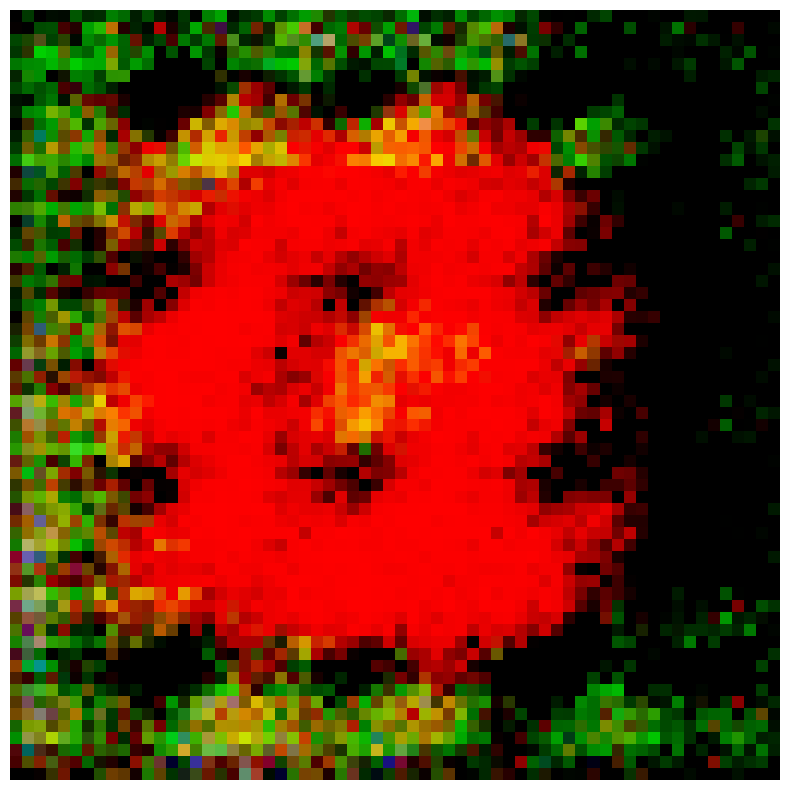

Epoch [43/200]  Loss D: 0.3839, Loss G: 1.9464


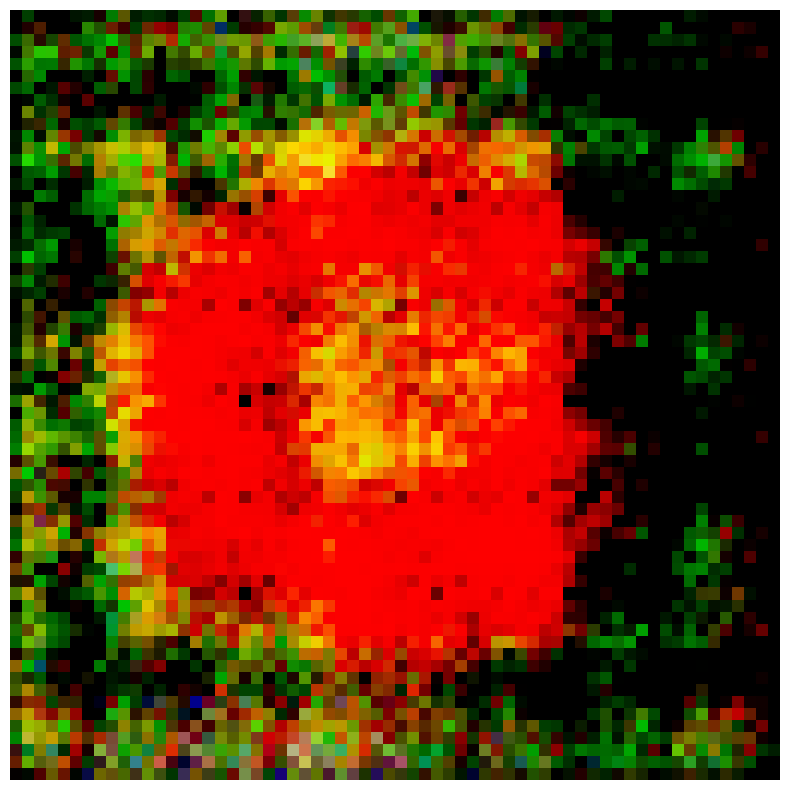

Epoch [44/200]  Loss D: 0.2502, Loss G: 3.3994


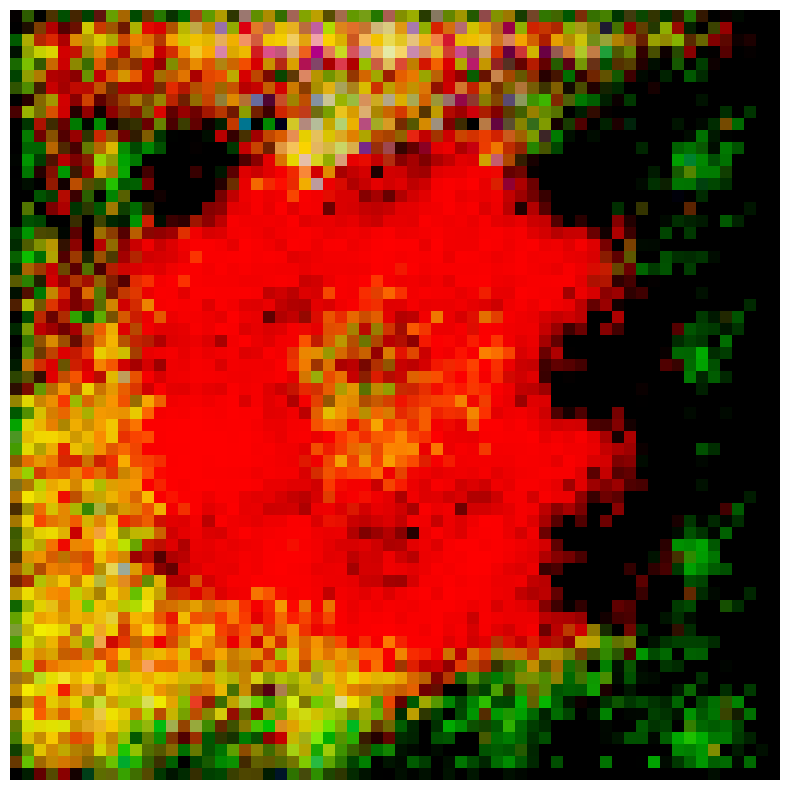

Epoch [45/200]  Loss D: 0.6384, Loss G: 2.1279


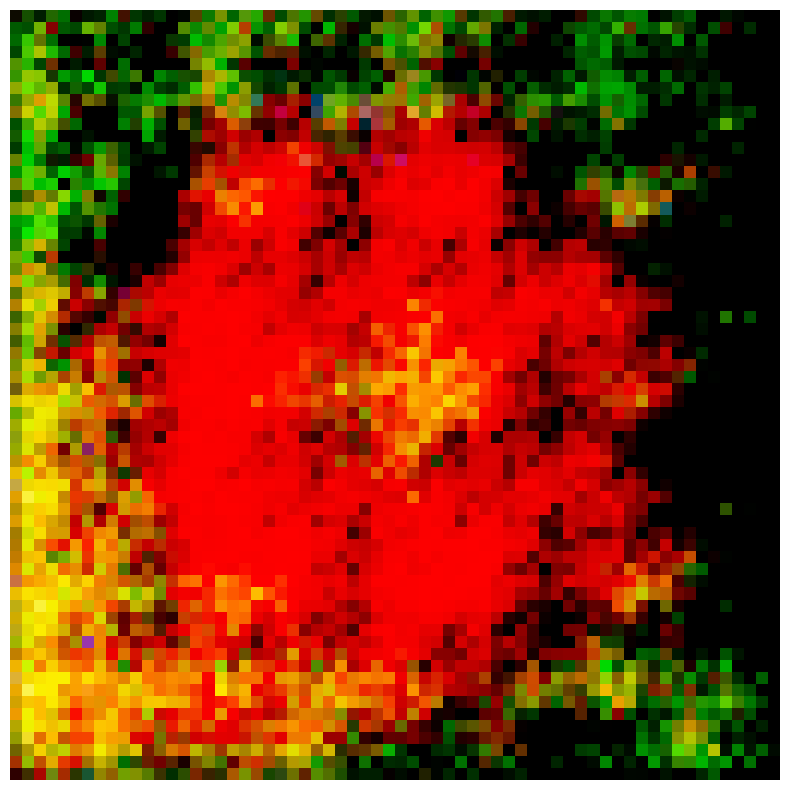

Epoch [46/200]  Loss D: 0.6604, Loss G: 6.2711


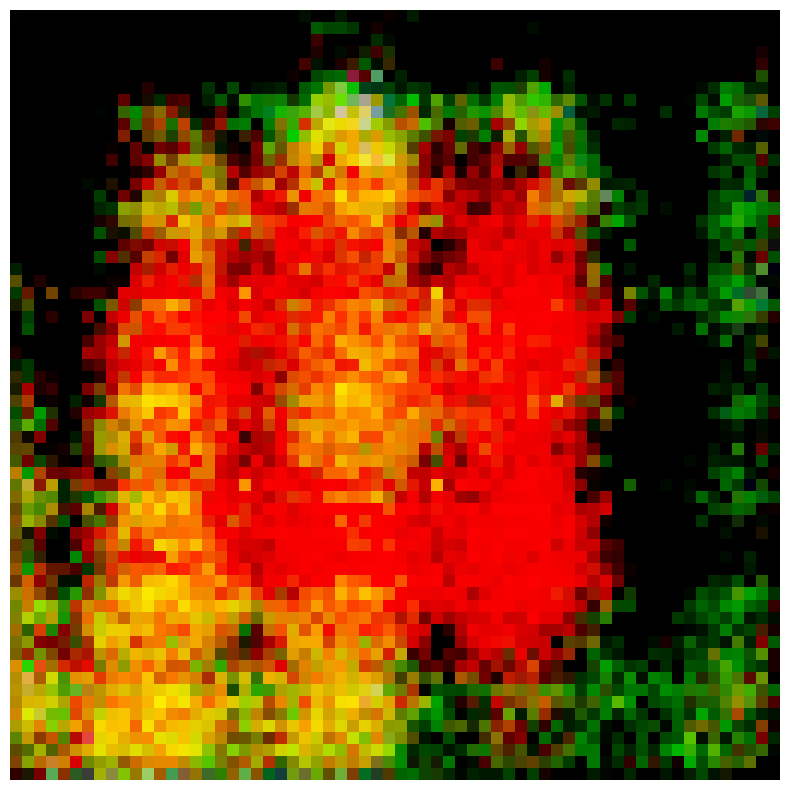

Epoch [47/200]  Loss D: 0.3603, Loss G: 6.2690


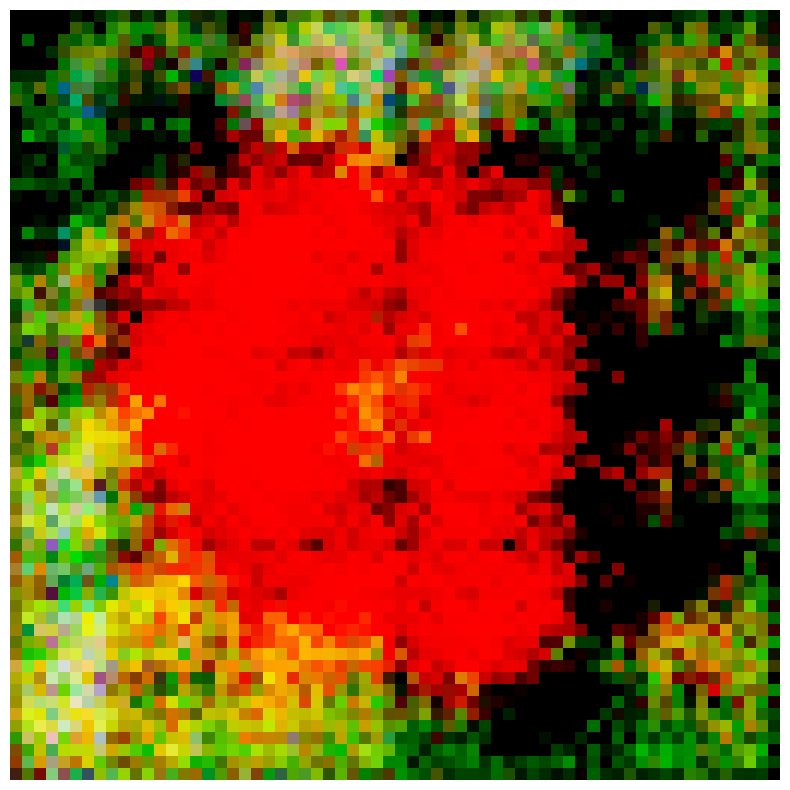

Epoch [48/200]  Loss D: 0.5338, Loss G: 2.1086


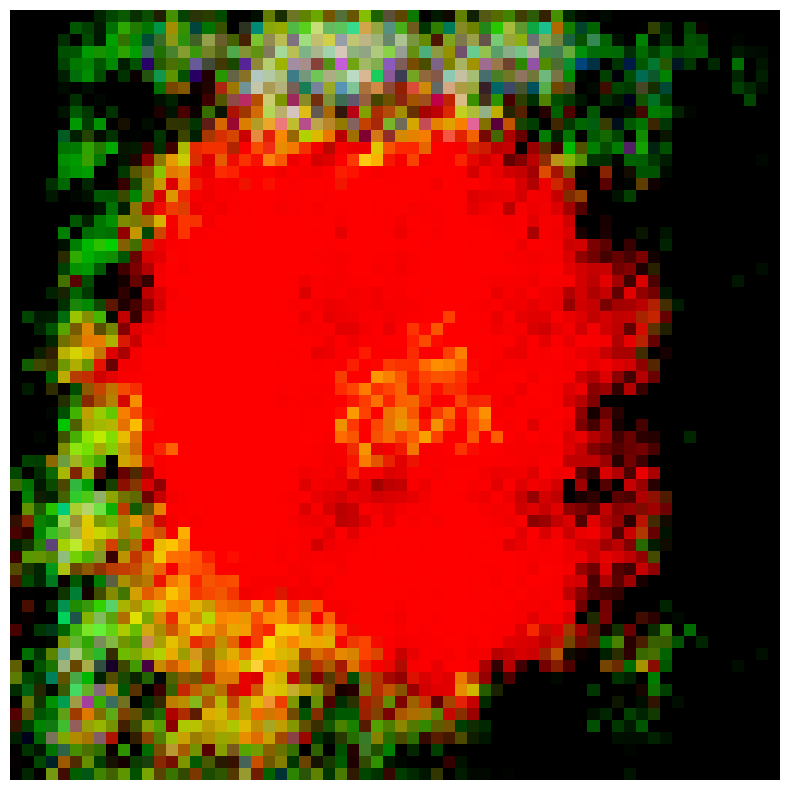

Epoch [49/200]  Loss D: 0.2774, Loss G: 4.8008


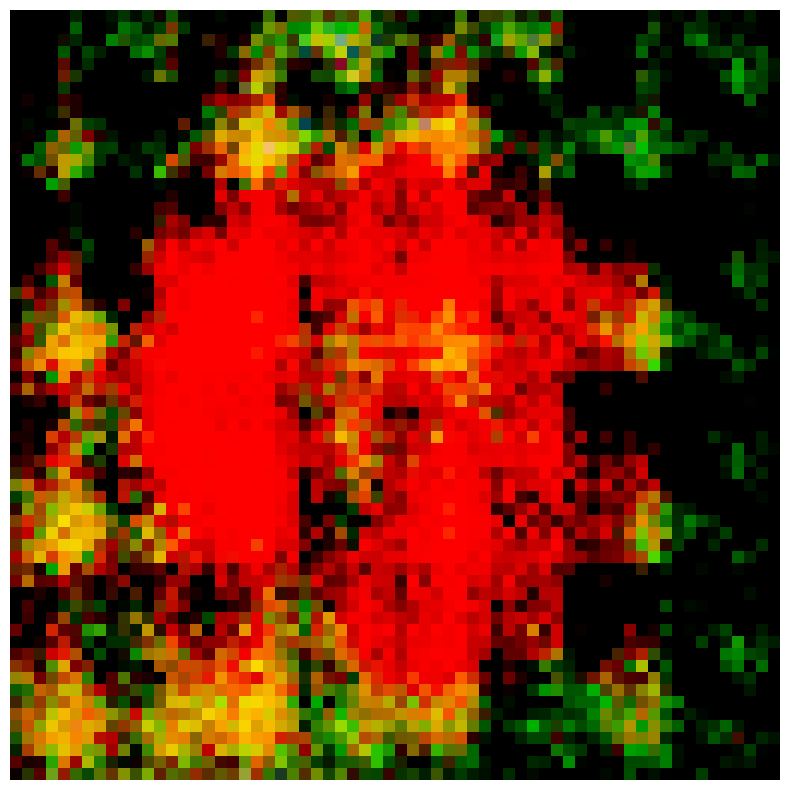

Epoch [50/200]  Loss D: 0.3583, Loss G: 1.1602


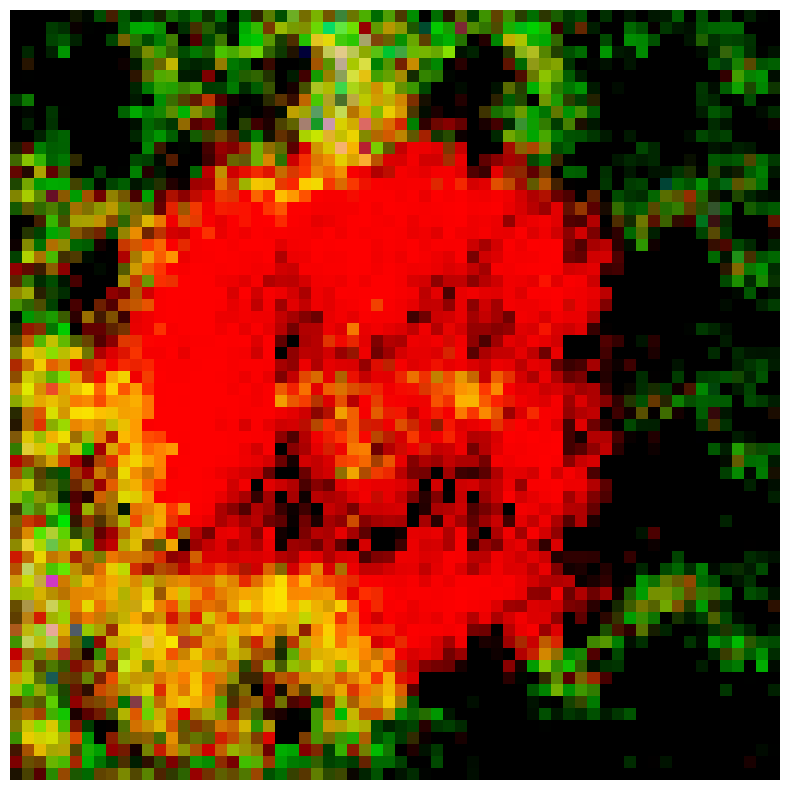

Epoch [51/200]  Loss D: 0.4986, Loss G: 3.9665


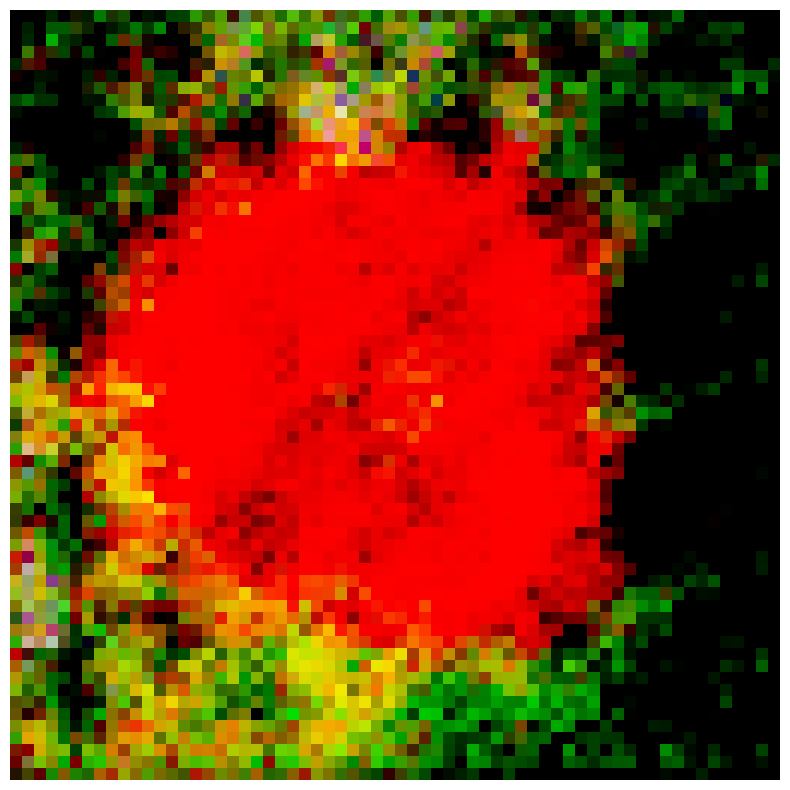

Epoch [52/200]  Loss D: 0.7762, Loss G: 1.2884


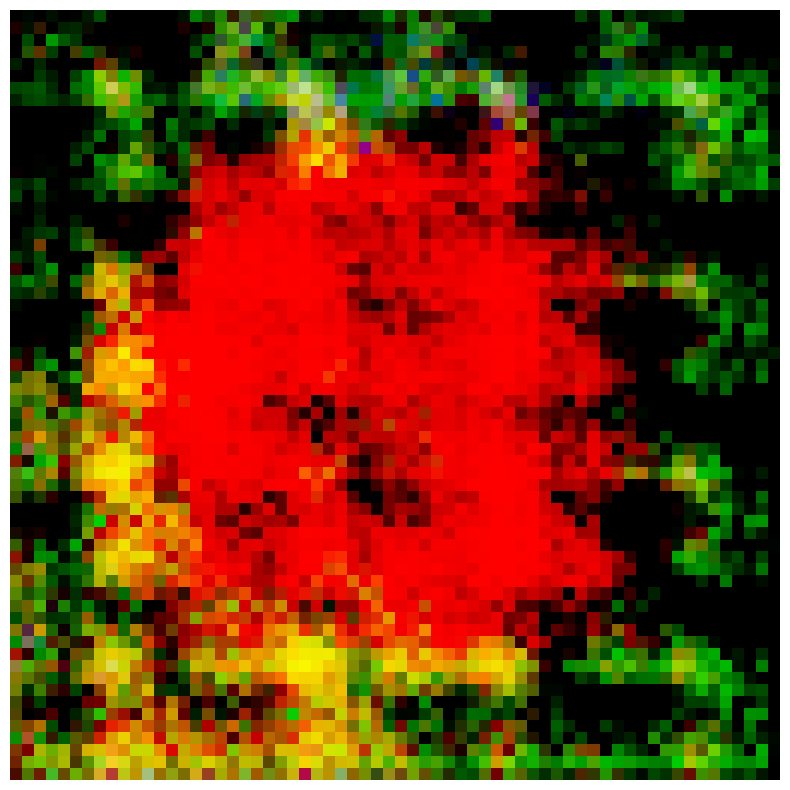

Epoch [53/200]  Loss D: 0.7766, Loss G: 4.1802


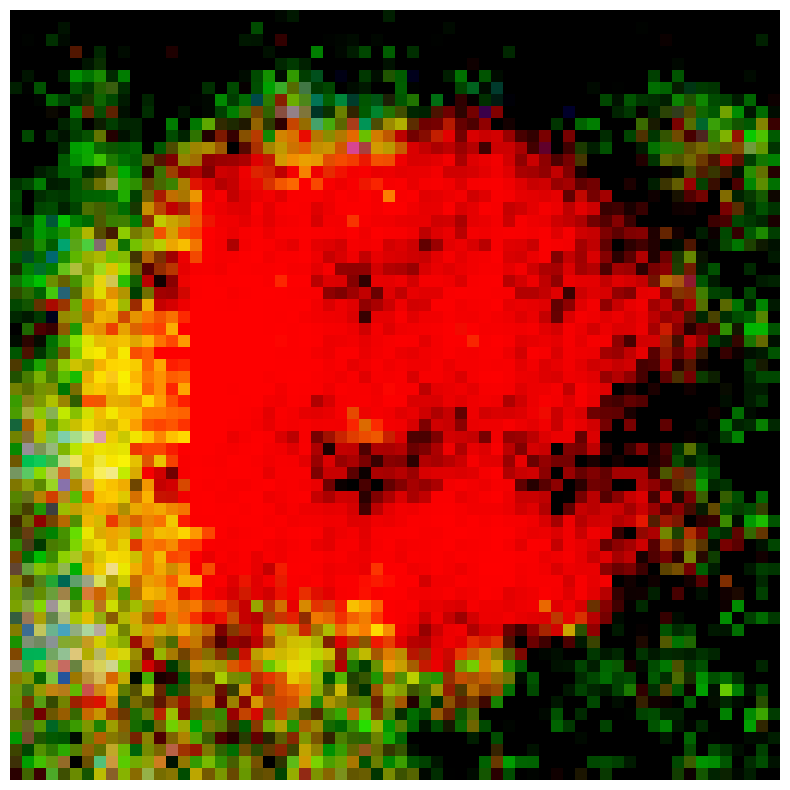

Epoch [54/200]  Loss D: 0.6880, Loss G: 2.9700


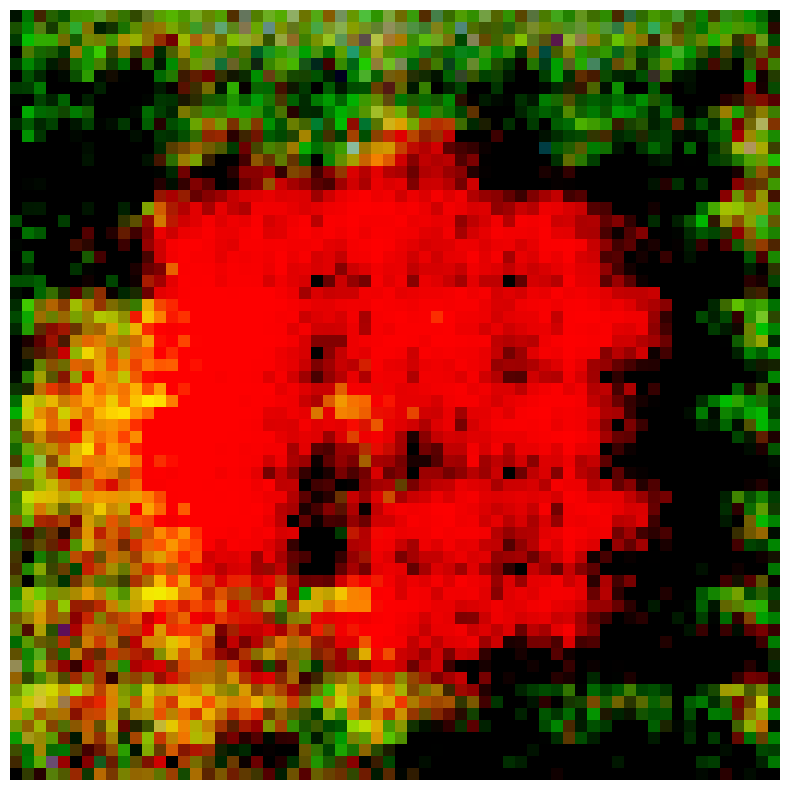

Epoch [55/200]  Loss D: 0.6109, Loss G: 0.5653


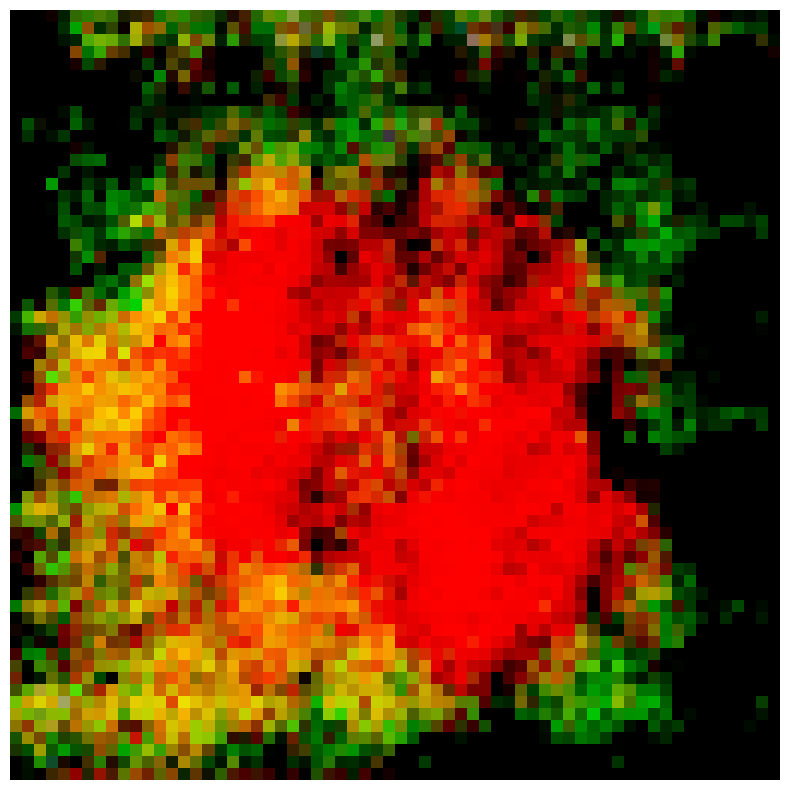

Epoch [56/200]  Loss D: 0.4760, Loss G: 1.0264


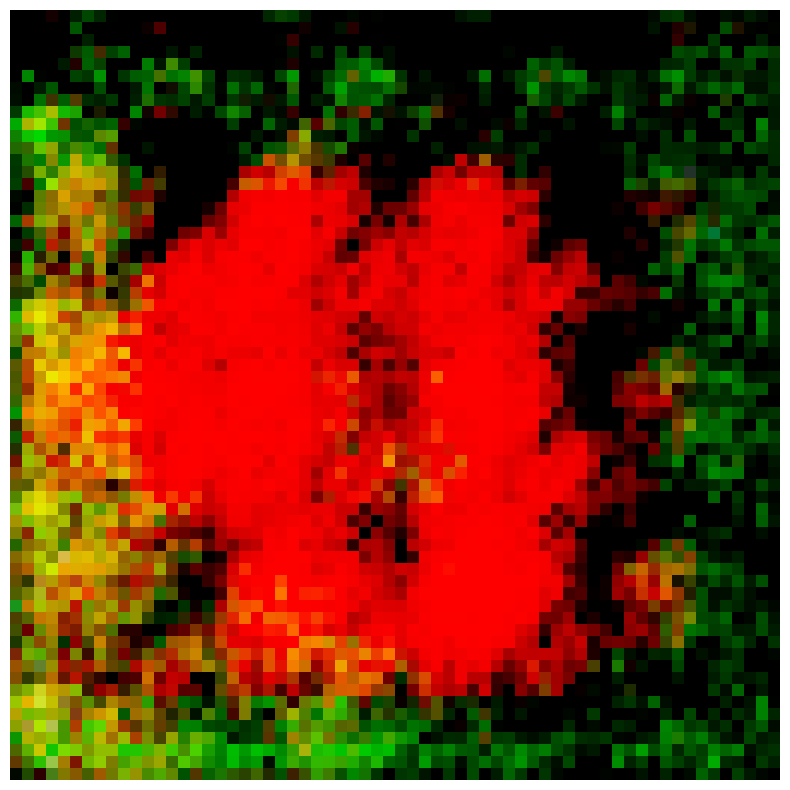

Epoch [57/200]  Loss D: 0.2694, Loss G: 2.0060


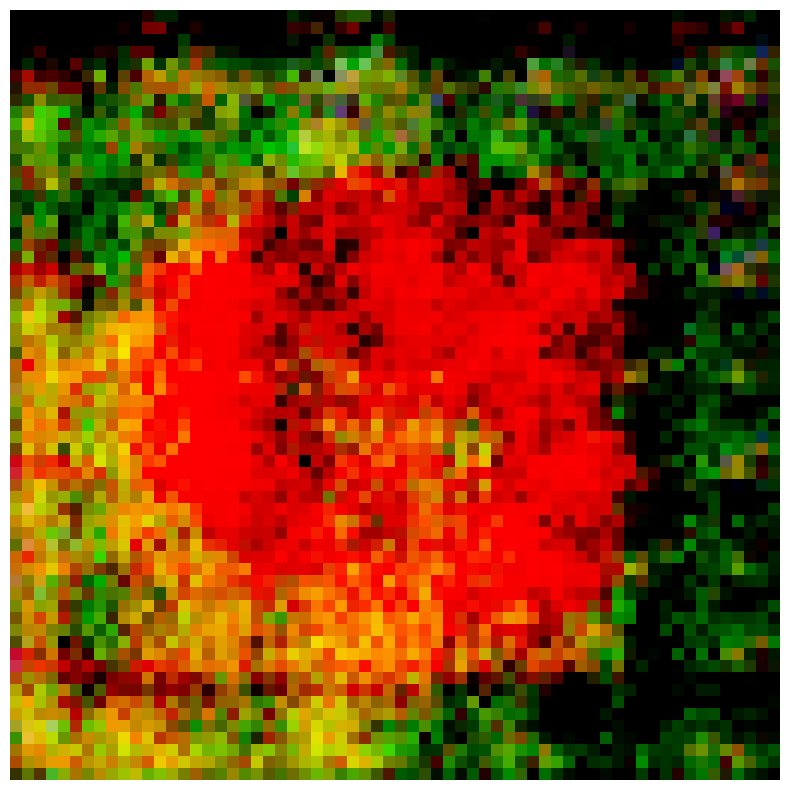

Epoch [58/200]  Loss D: 0.4810, Loss G: 3.6487


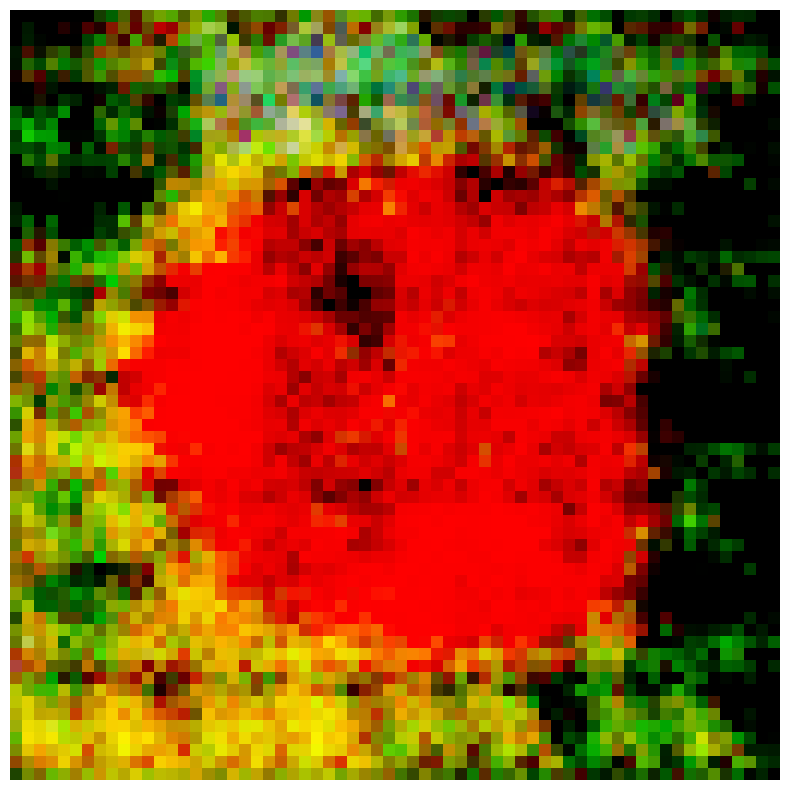

Epoch [59/200]  Loss D: 0.1989, Loss G: 4.3461


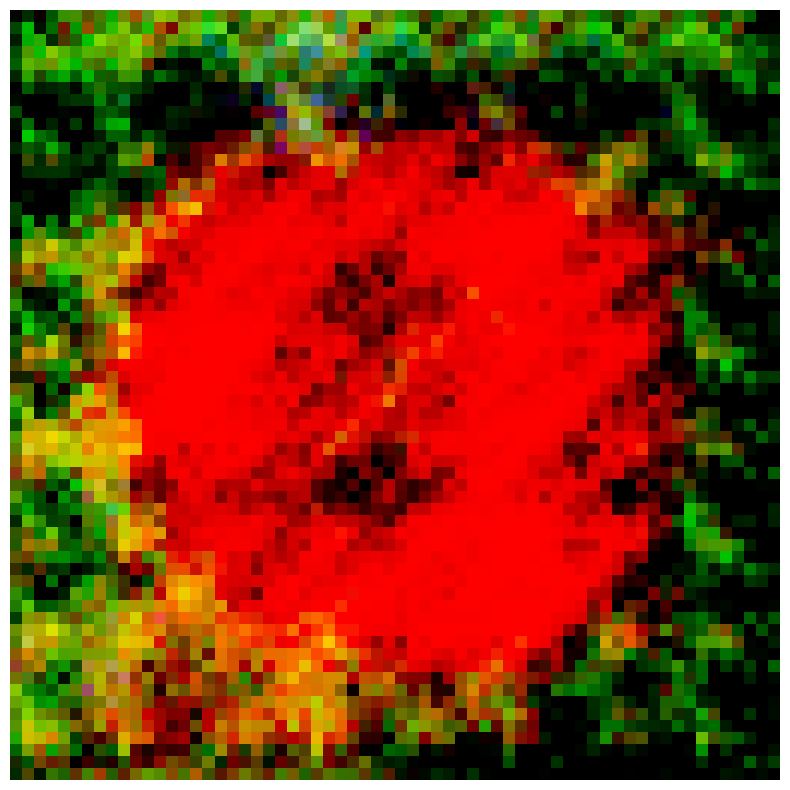

Epoch [60/200]  Loss D: 0.3851, Loss G: 0.2680


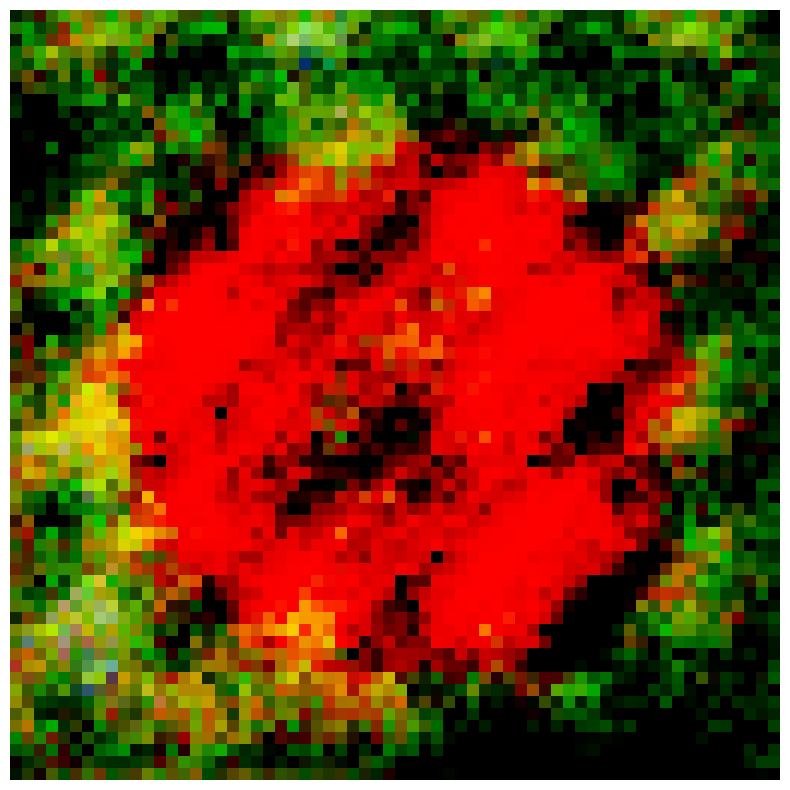

Epoch [61/200]  Loss D: 0.2250, Loss G: 3.9101


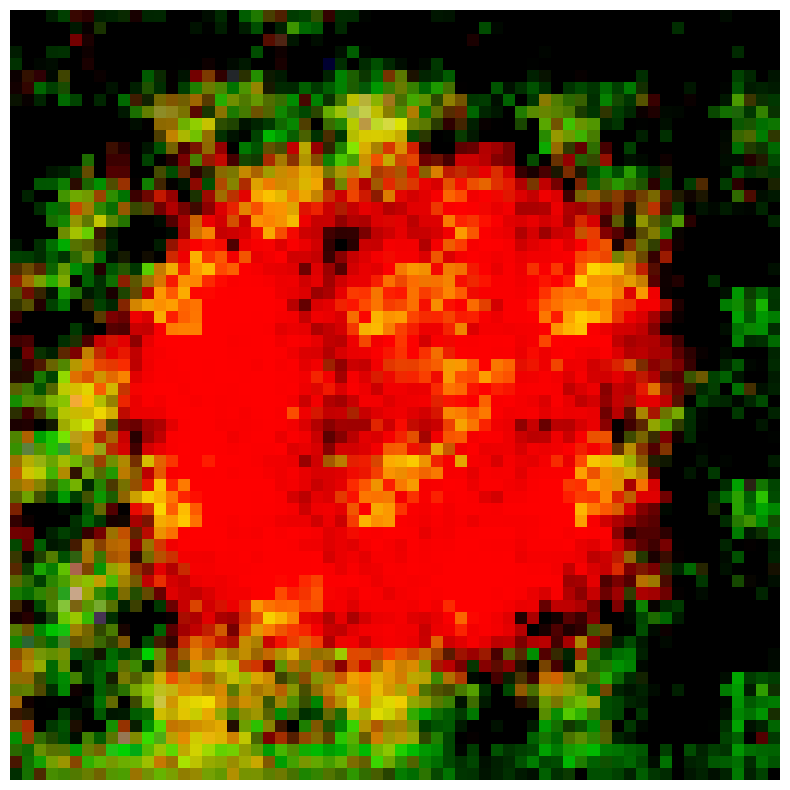

Epoch [62/200]  Loss D: 0.7716, Loss G: 0.9241


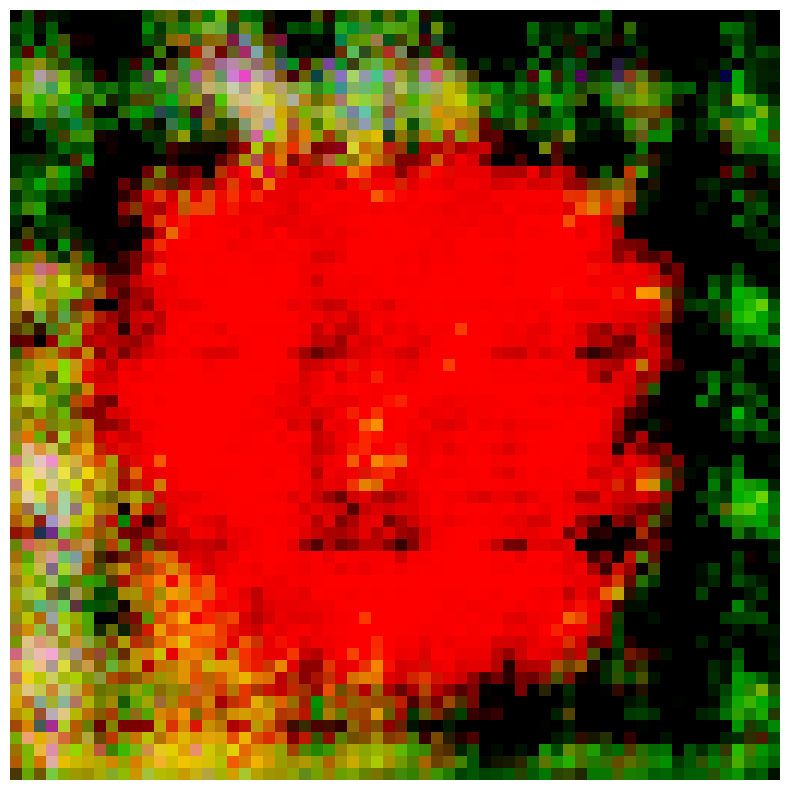

Epoch [63/200]  Loss D: 0.6245, Loss G: 0.7231


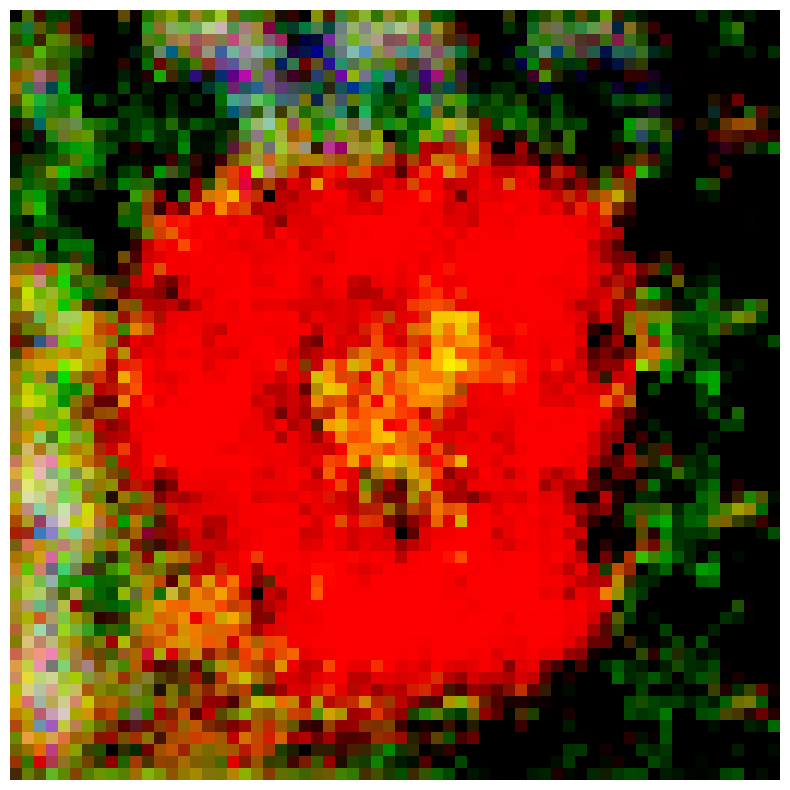

Epoch [64/200]  Loss D: 0.3090, Loss G: 1.3618


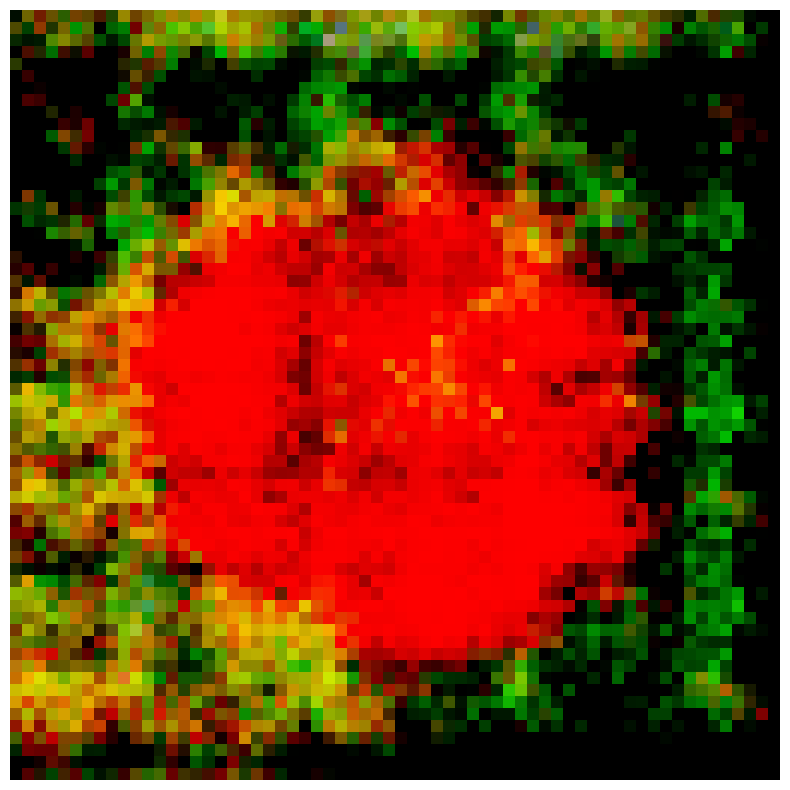

Epoch [65/200]  Loss D: 0.6388, Loss G: 0.7267


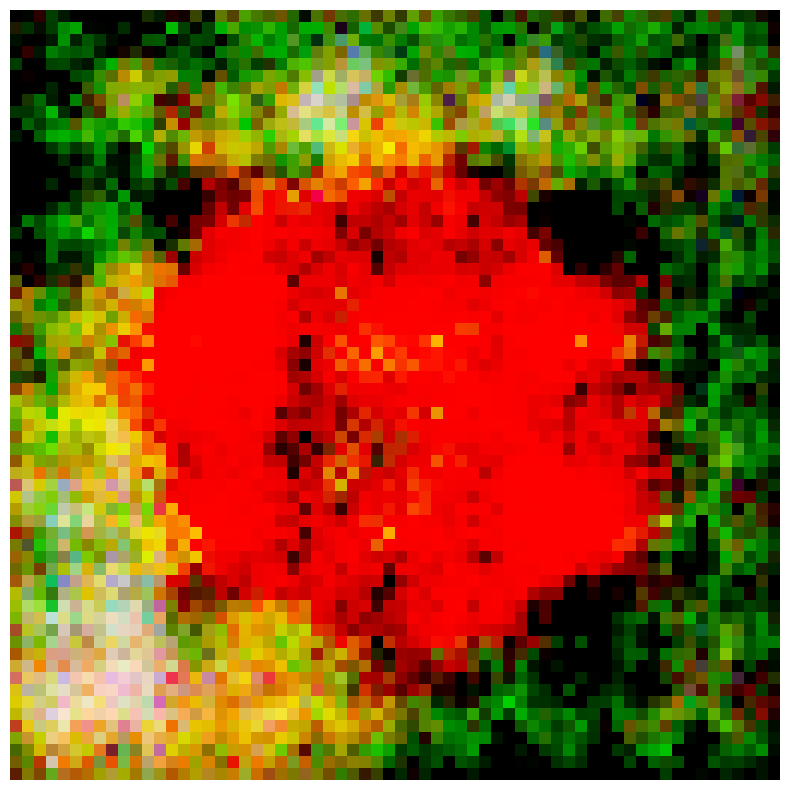

Epoch [66/200]  Loss D: 0.3211, Loss G: 2.1828


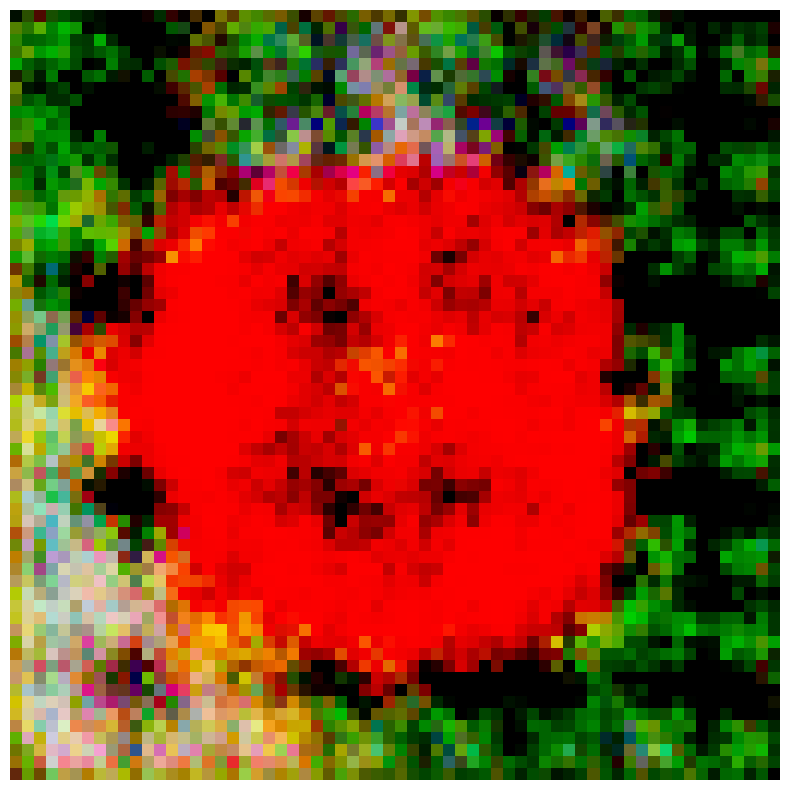

Epoch [67/200]  Loss D: 0.2752, Loss G: 4.1358


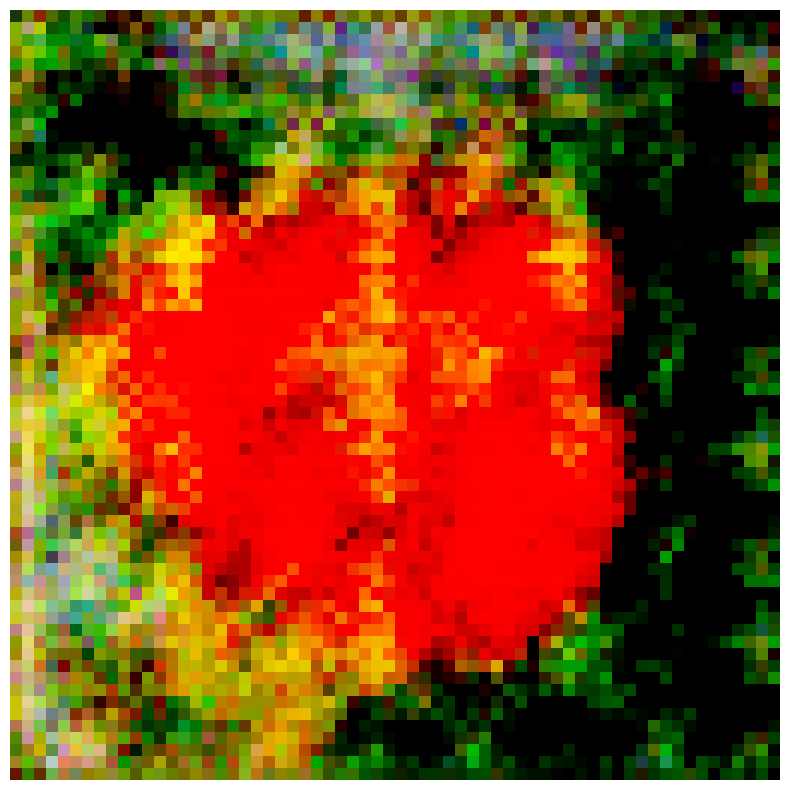

Epoch [68/200]  Loss D: 0.5917, Loss G: 6.8325


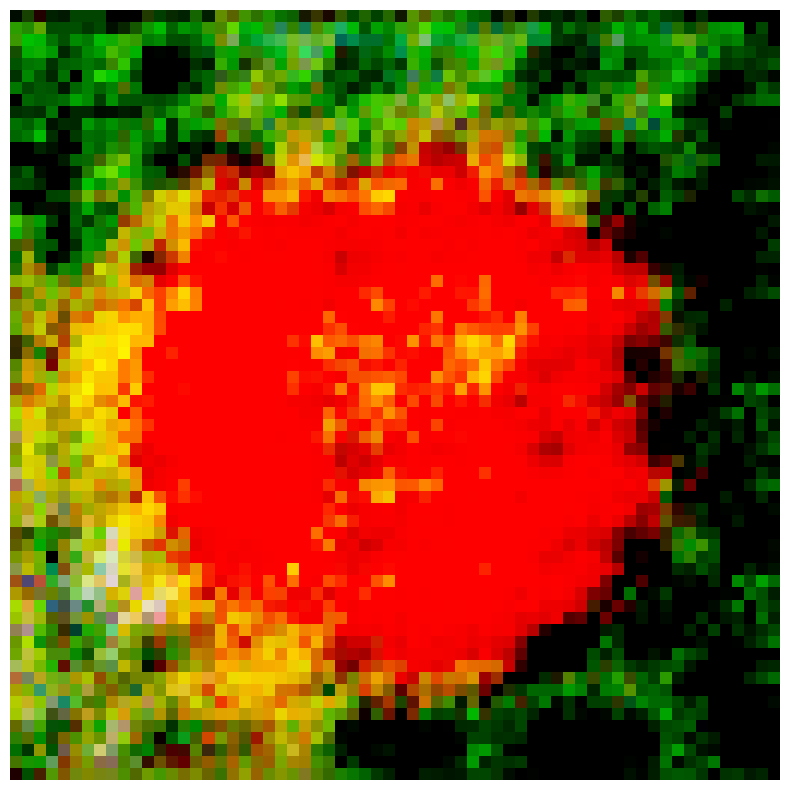

Epoch [69/200]  Loss D: 0.2253, Loss G: 3.2284


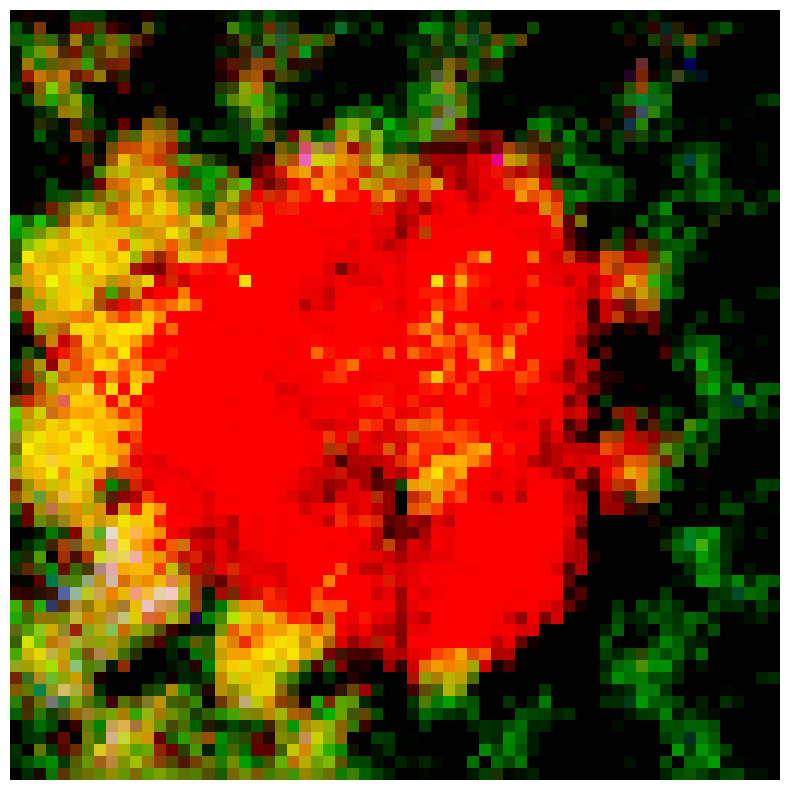

Epoch [70/200]  Loss D: 0.6713, Loss G: 7.8371


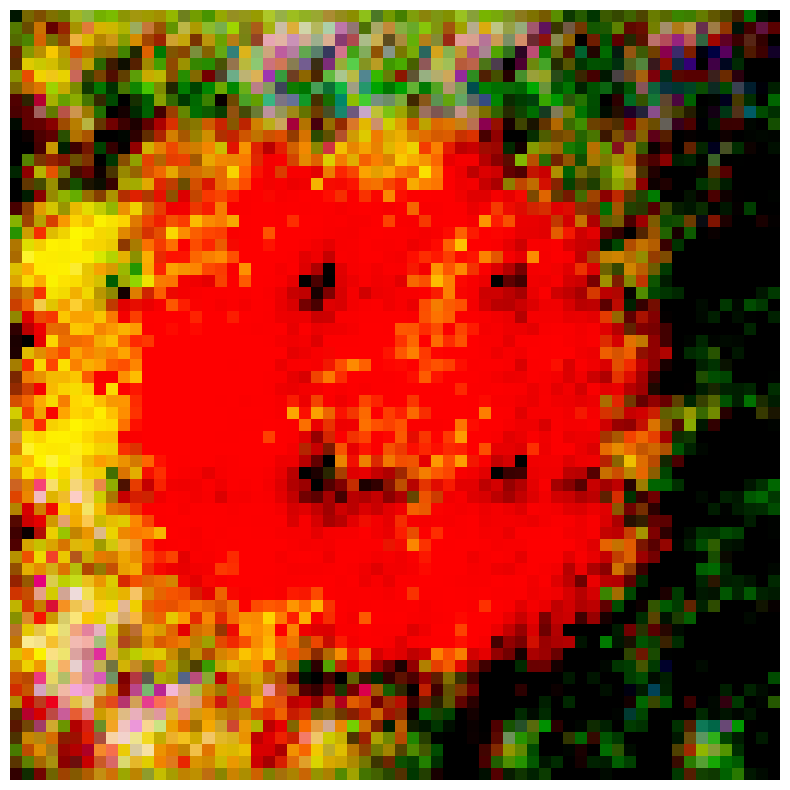

Epoch [71/200]  Loss D: 0.6300, Loss G: 0.9389


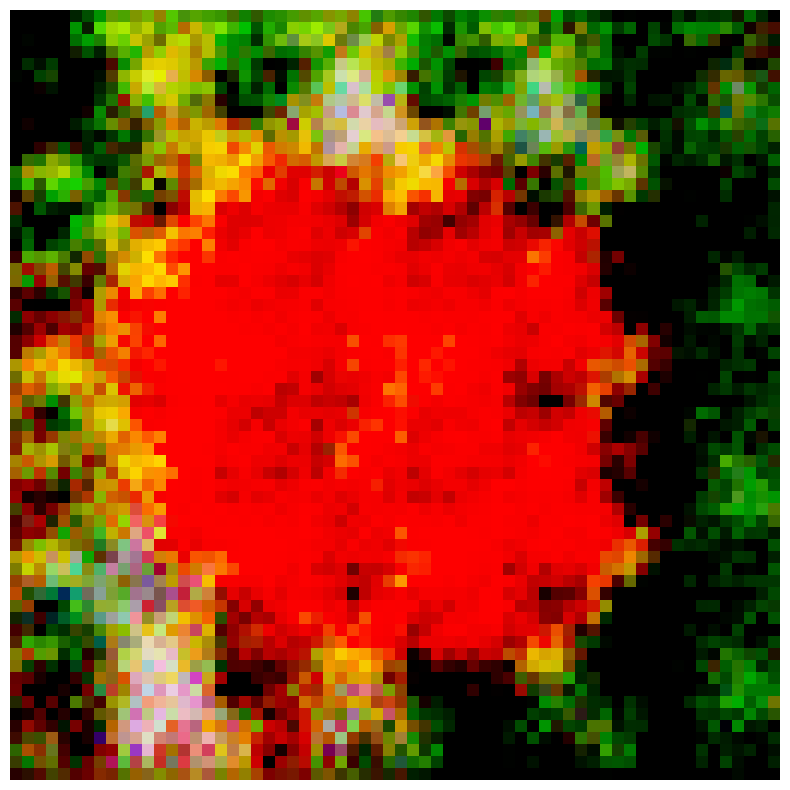

Epoch [72/200]  Loss D: 0.2586, Loss G: 4.3133


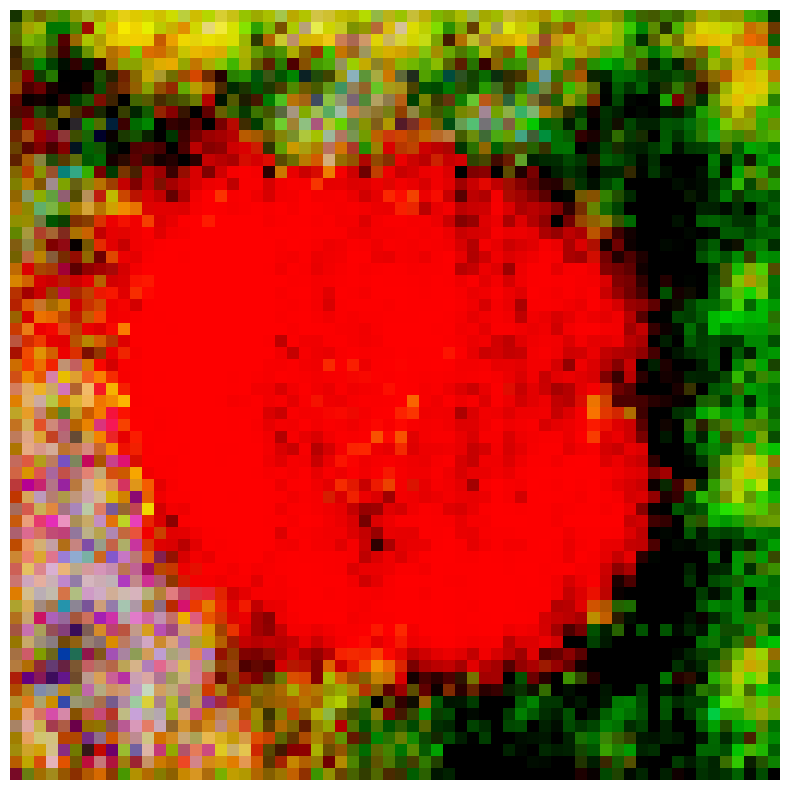

Epoch [73/200]  Loss D: 0.3894, Loss G: 2.4864


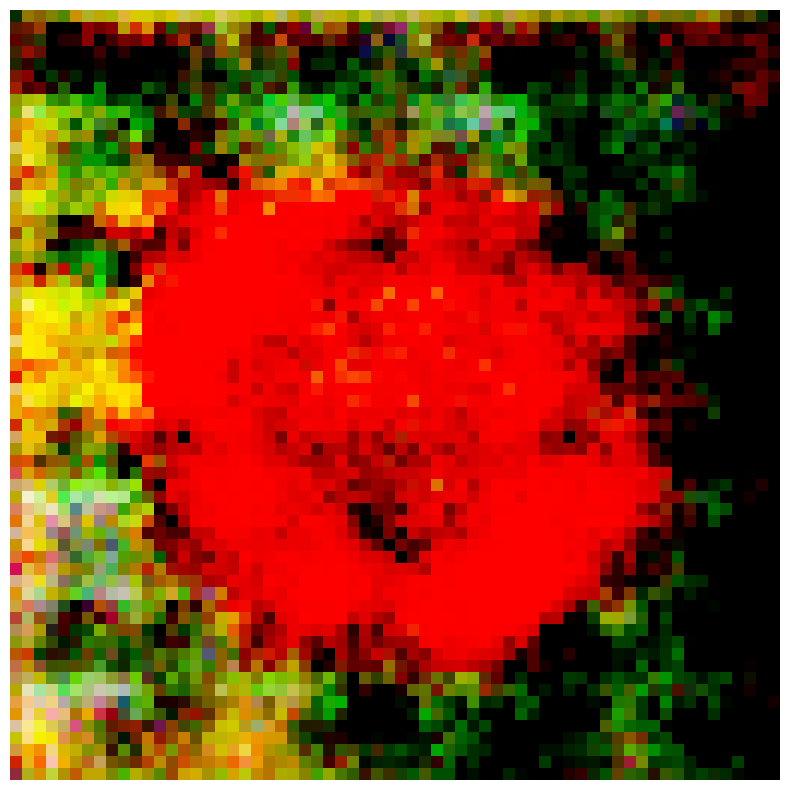

Epoch [74/200]  Loss D: 0.1917, Loss G: 2.2249


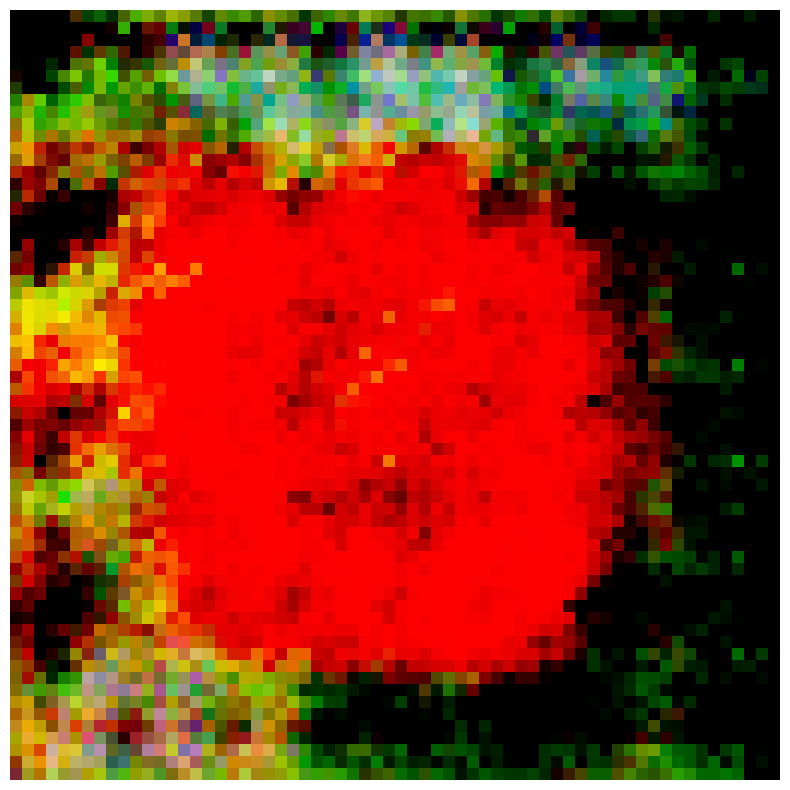

Epoch [75/200]  Loss D: 0.9214, Loss G: 0.8133


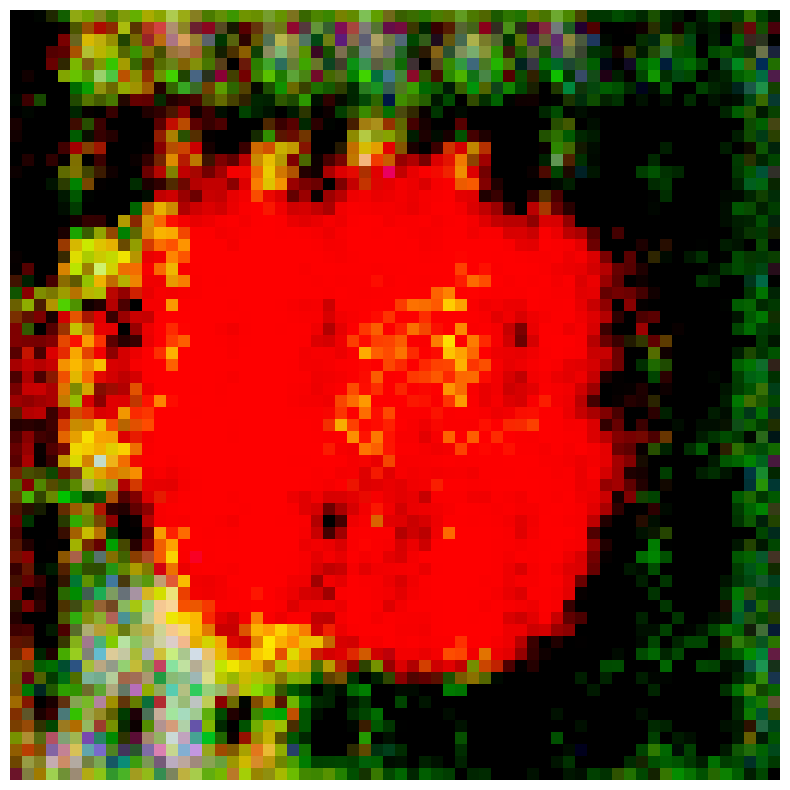

Epoch [76/200]  Loss D: 0.5056, Loss G: 1.8777


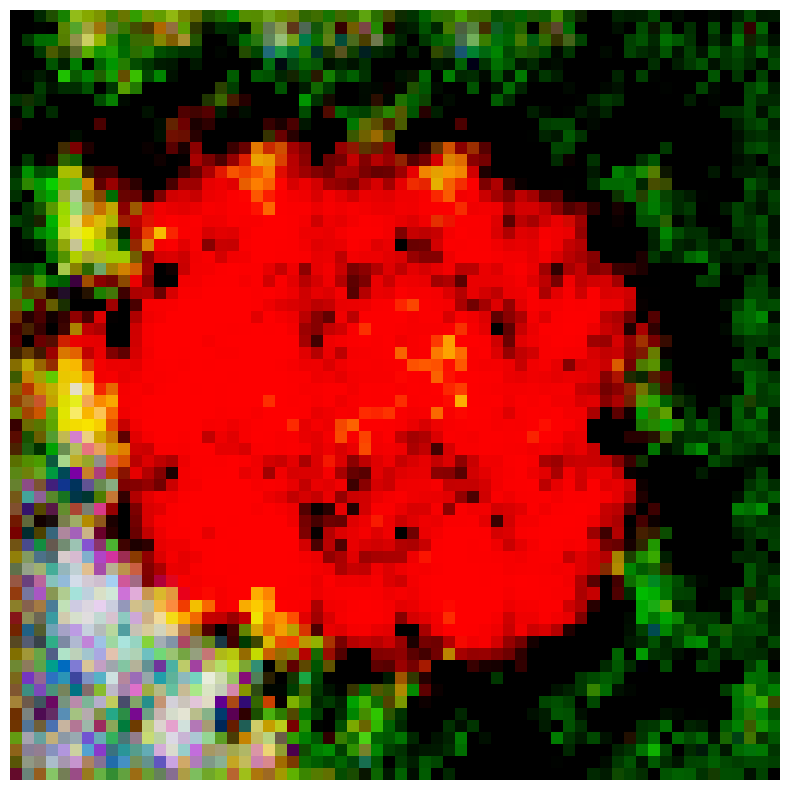

Epoch [77/200]  Loss D: 0.7285, Loss G: 2.2025


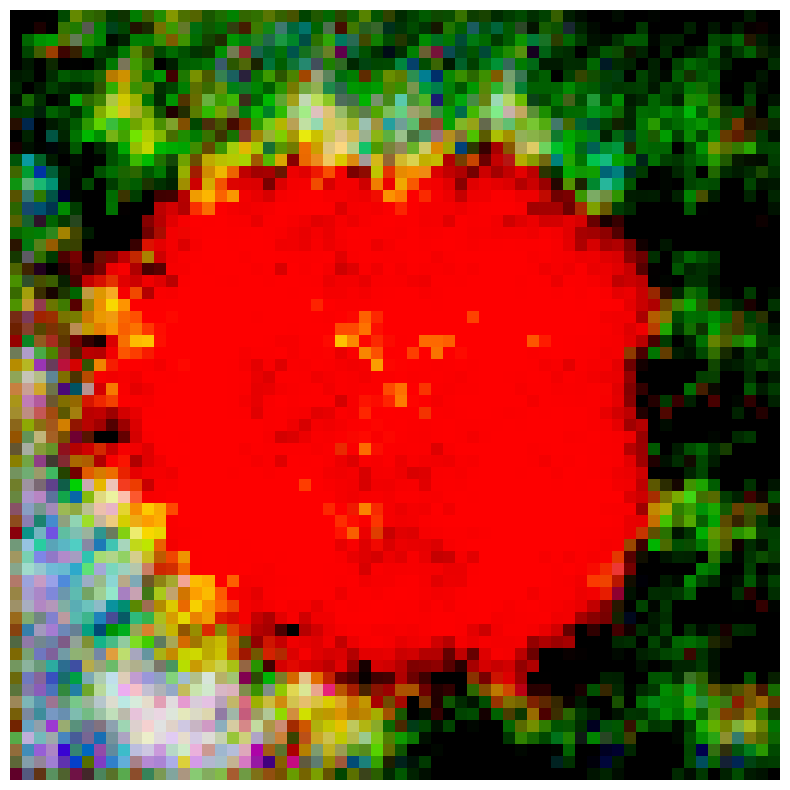

Epoch [78/200]  Loss D: 0.6698, Loss G: 3.5461


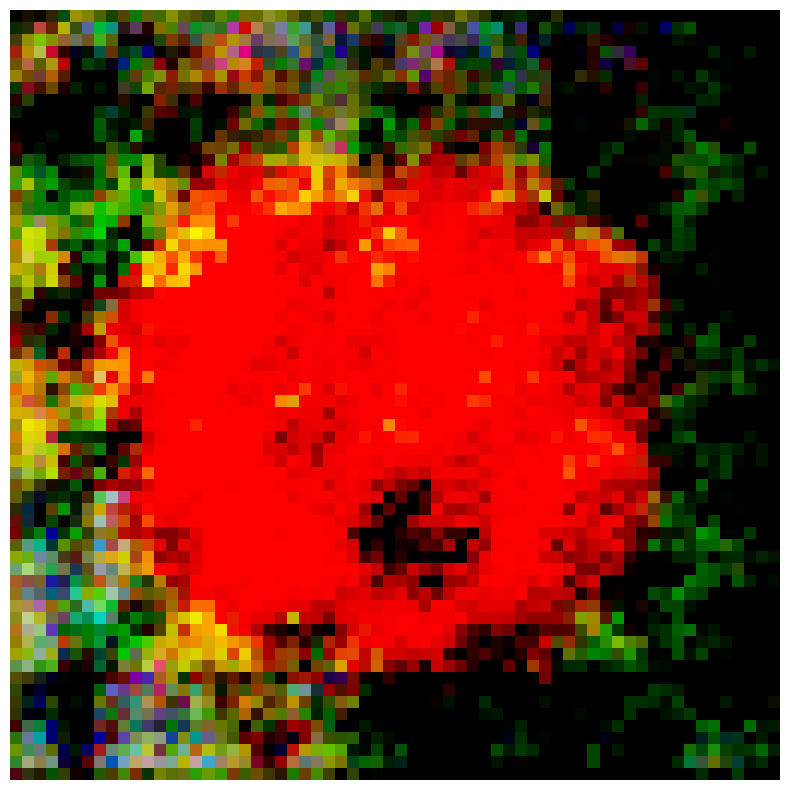

Epoch [79/200]  Loss D: 0.4207, Loss G: 1.1256


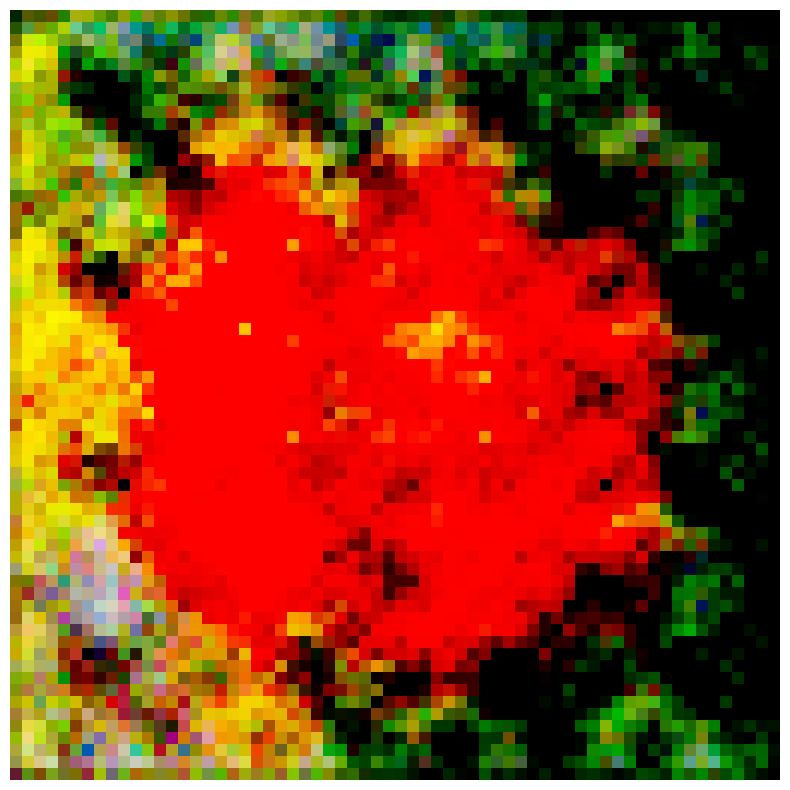

Epoch [80/200]  Loss D: 1.0966, Loss G: 1.9740


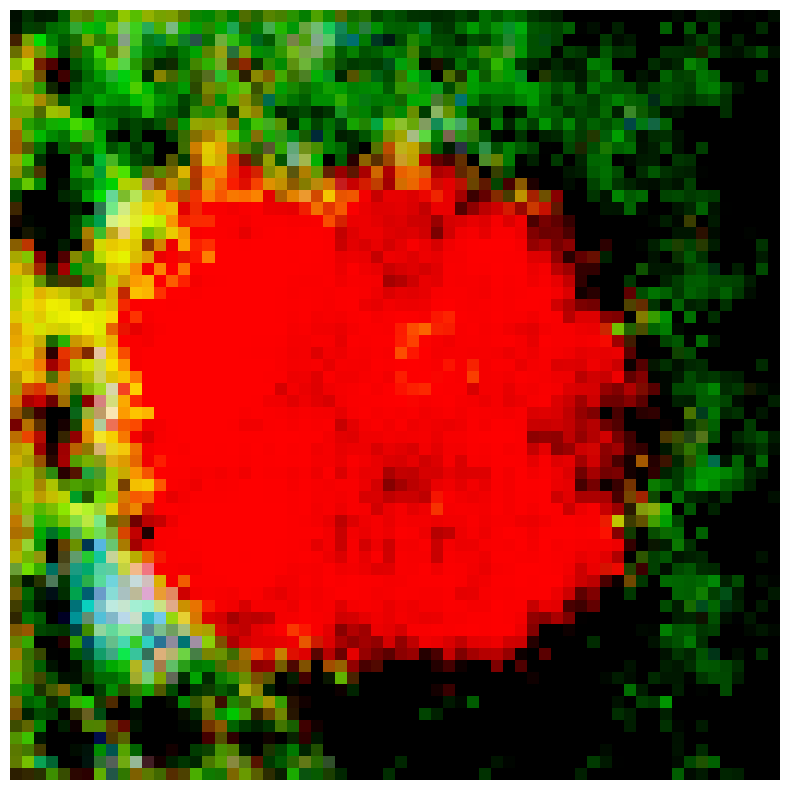

Epoch [81/200]  Loss D: 0.4674, Loss G: 7.1185


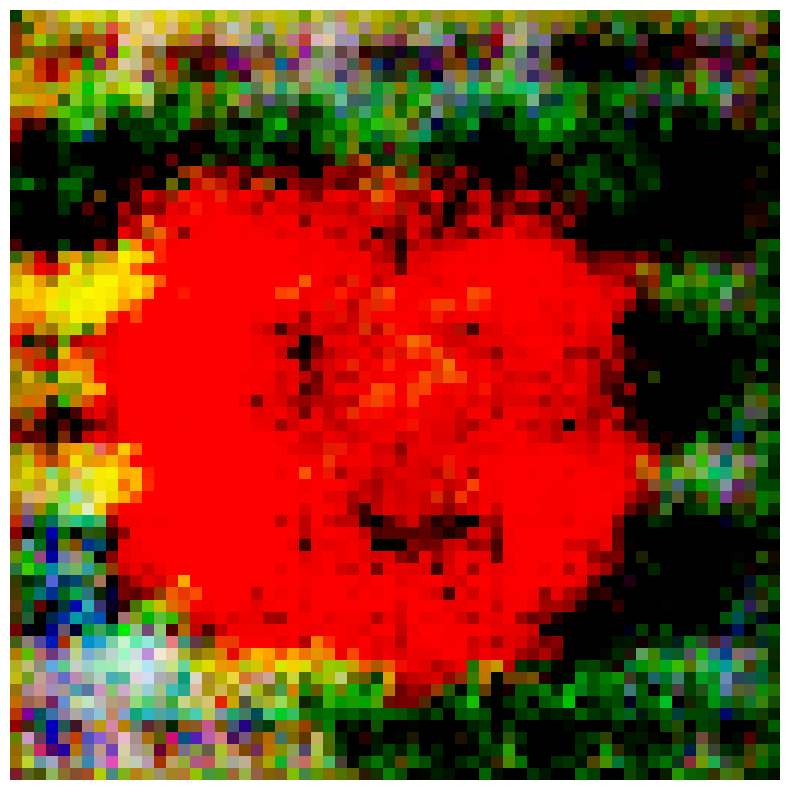

Epoch [82/200]  Loss D: 0.7079, Loss G: 6.7646


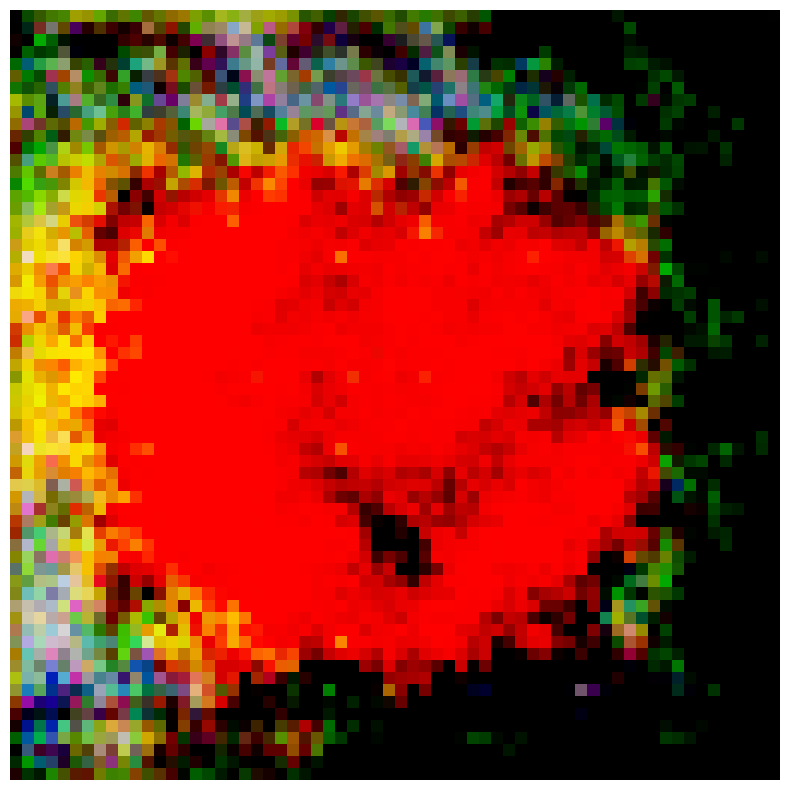

Epoch [83/200]  Loss D: 0.3485, Loss G: 3.6737


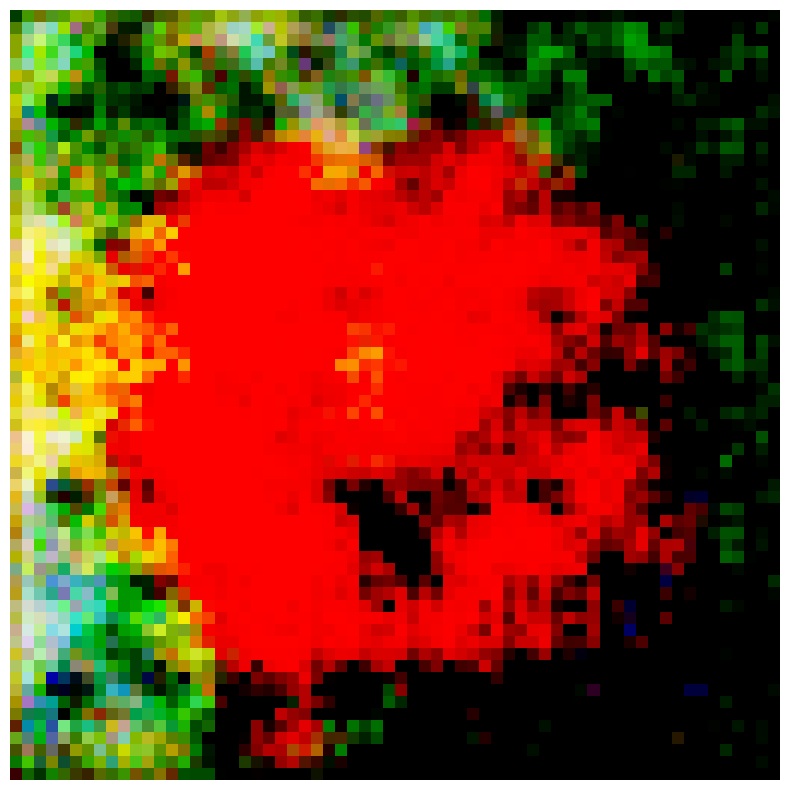

Epoch [84/200]  Loss D: 0.6694, Loss G: 1.1007


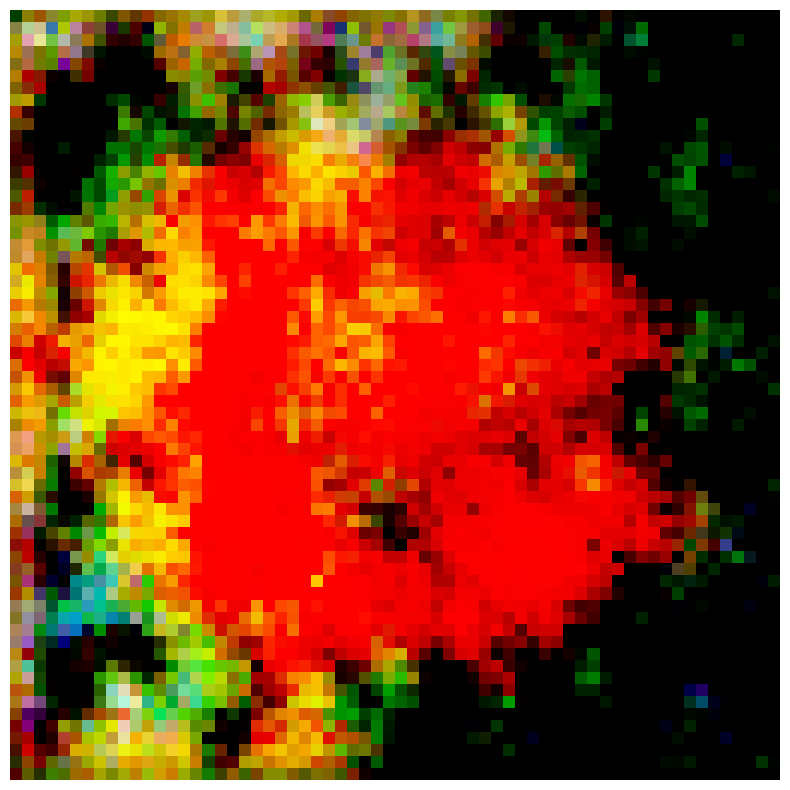

Epoch [85/200]  Loss D: 0.1310, Loss G: 2.9934


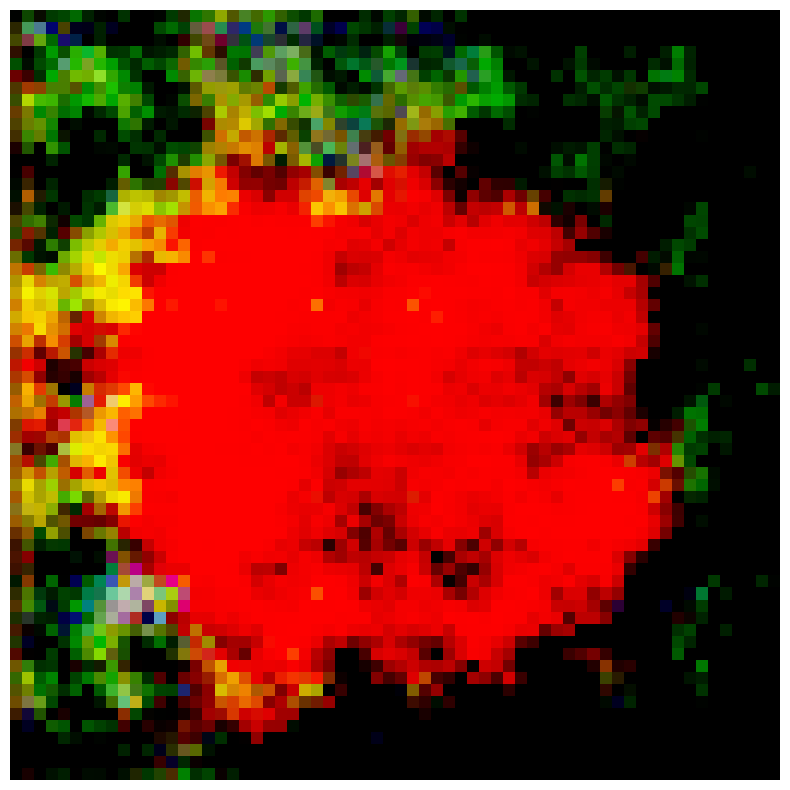

Epoch [86/200]  Loss D: 0.4771, Loss G: 1.2744


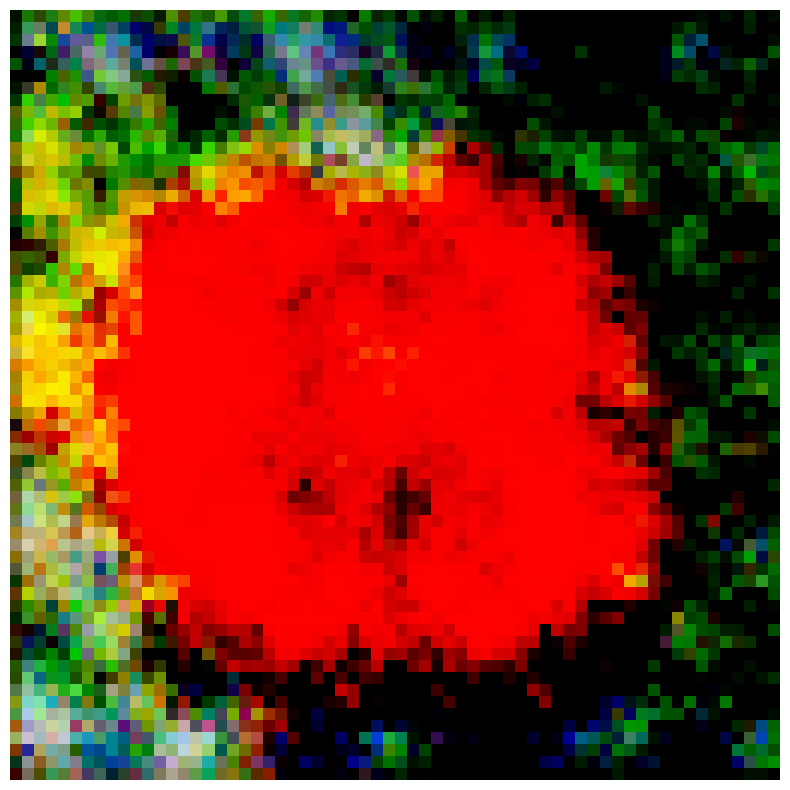

Epoch [87/200]  Loss D: 0.3841, Loss G: 5.1797


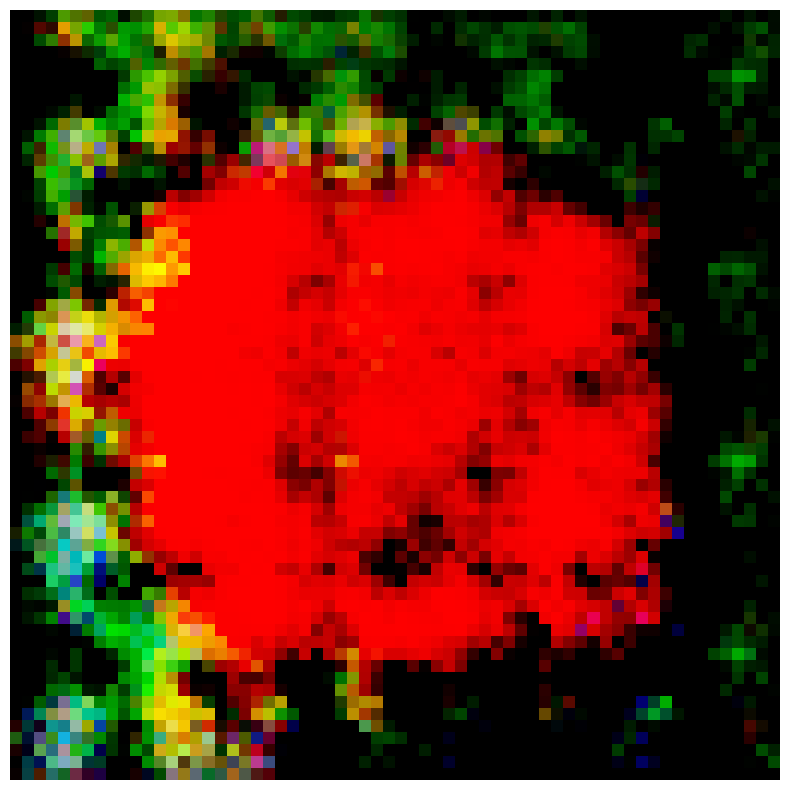

Epoch [88/200]  Loss D: 0.4292, Loss G: 6.4411


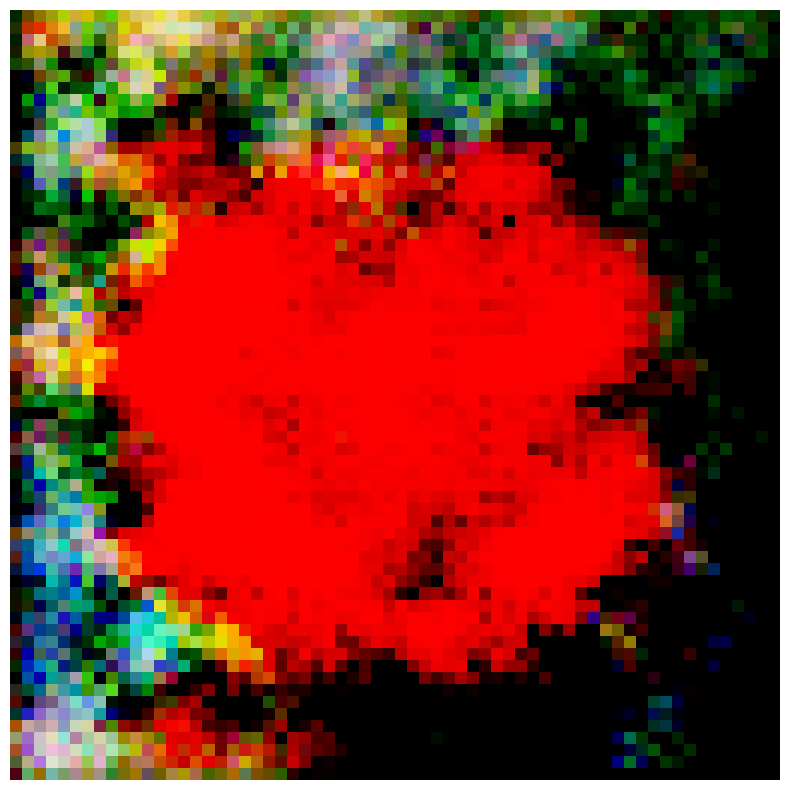

Epoch [89/200]  Loss D: 0.4457, Loss G: 5.9261


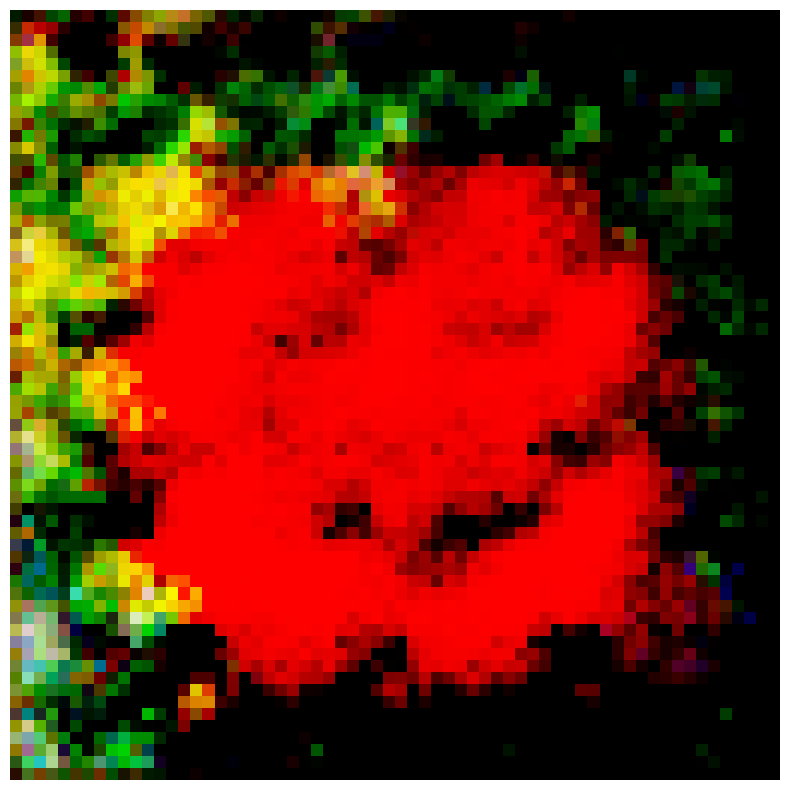

Epoch [90/200]  Loss D: 1.1490, Loss G: 0.4117


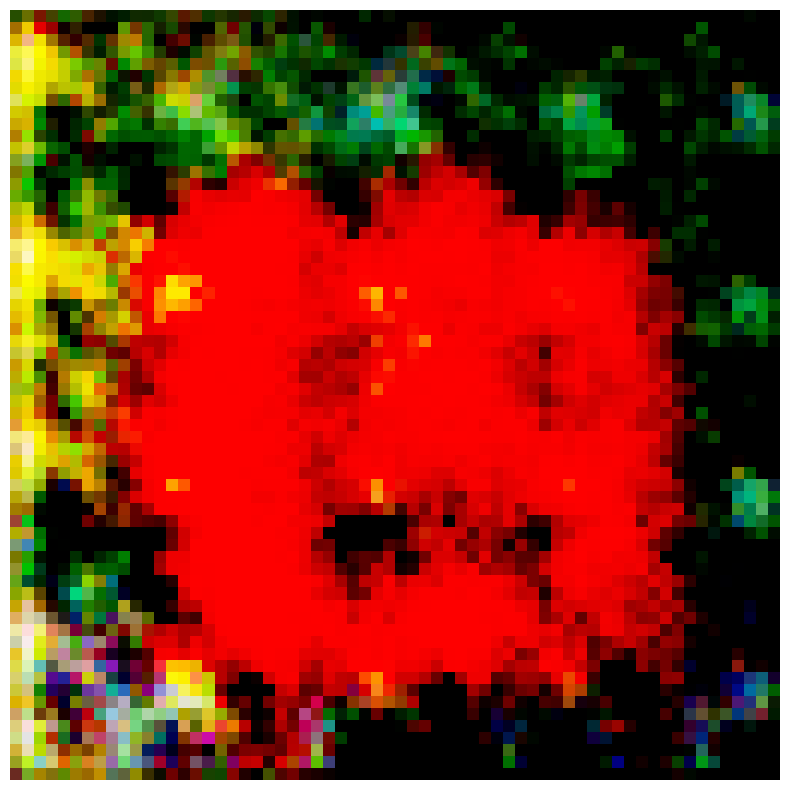

Epoch [91/200]  Loss D: 0.5568, Loss G: 1.5322


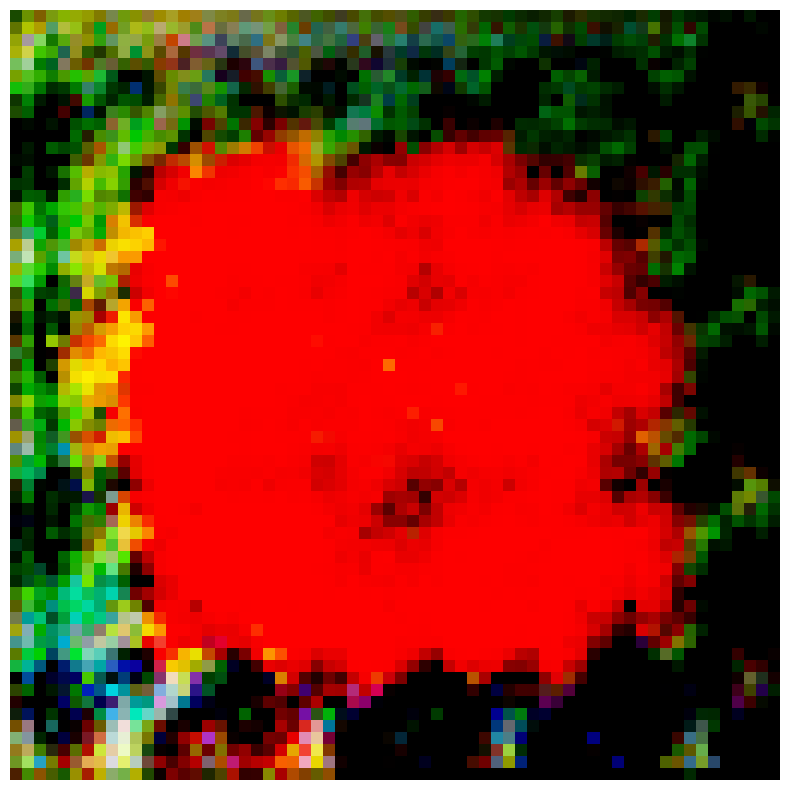

Epoch [92/200]  Loss D: 0.2963, Loss G: 2.4291


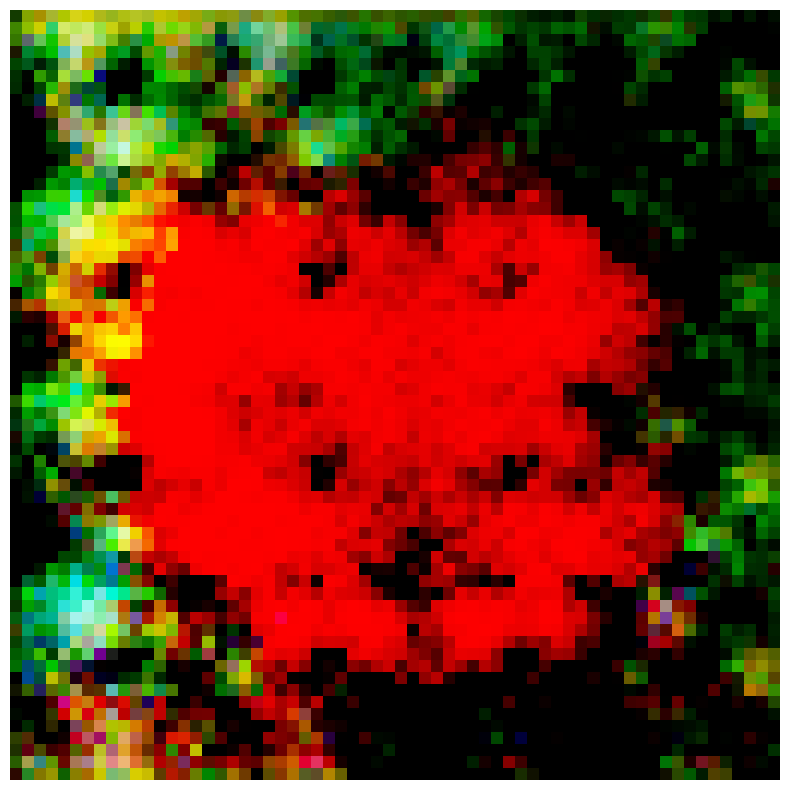

Epoch [93/200]  Loss D: 0.5469, Loss G: 1.6415


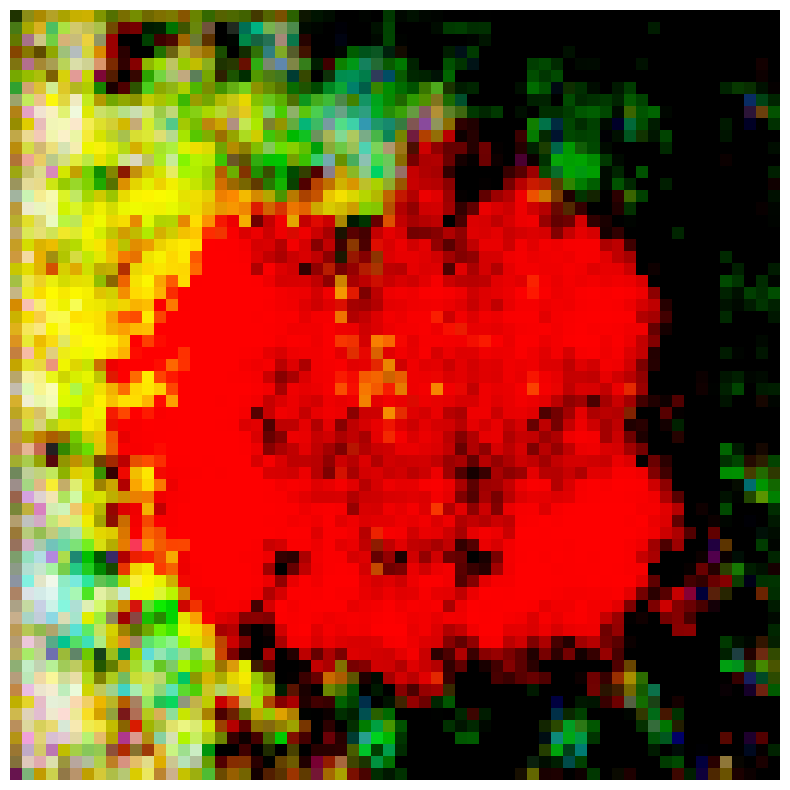

Epoch [94/200]  Loss D: 0.1840, Loss G: 3.7518


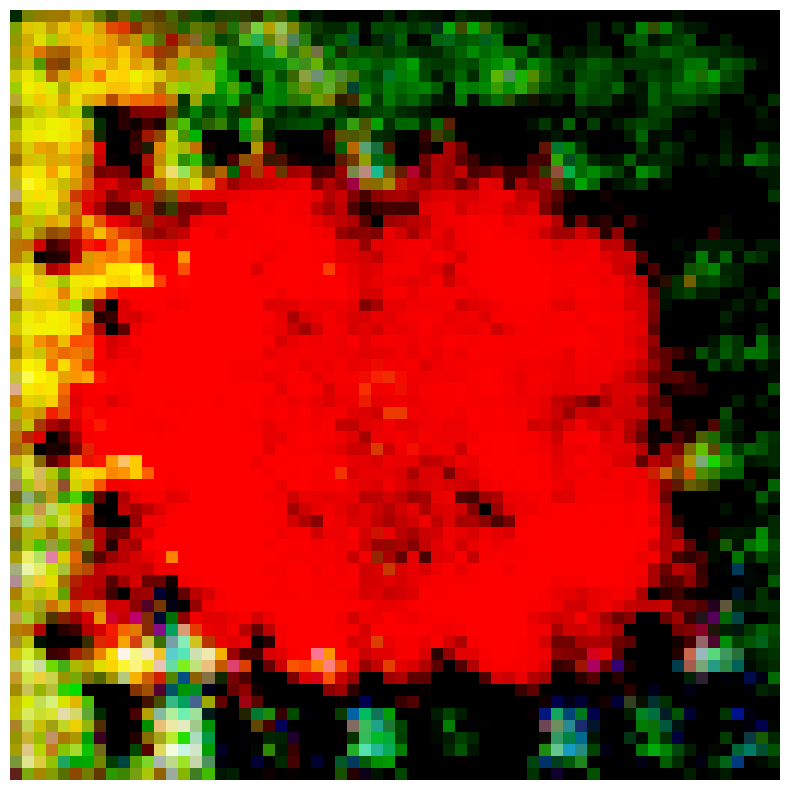

Epoch [95/200]  Loss D: 0.4806, Loss G: 6.0999


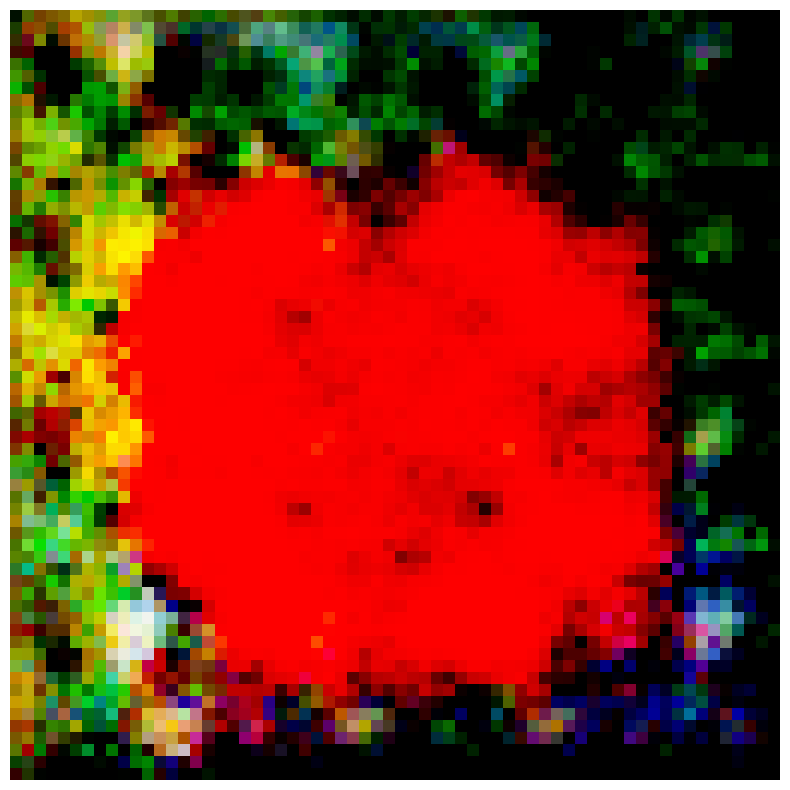

Epoch [96/200]  Loss D: 0.2974, Loss G: 2.7104


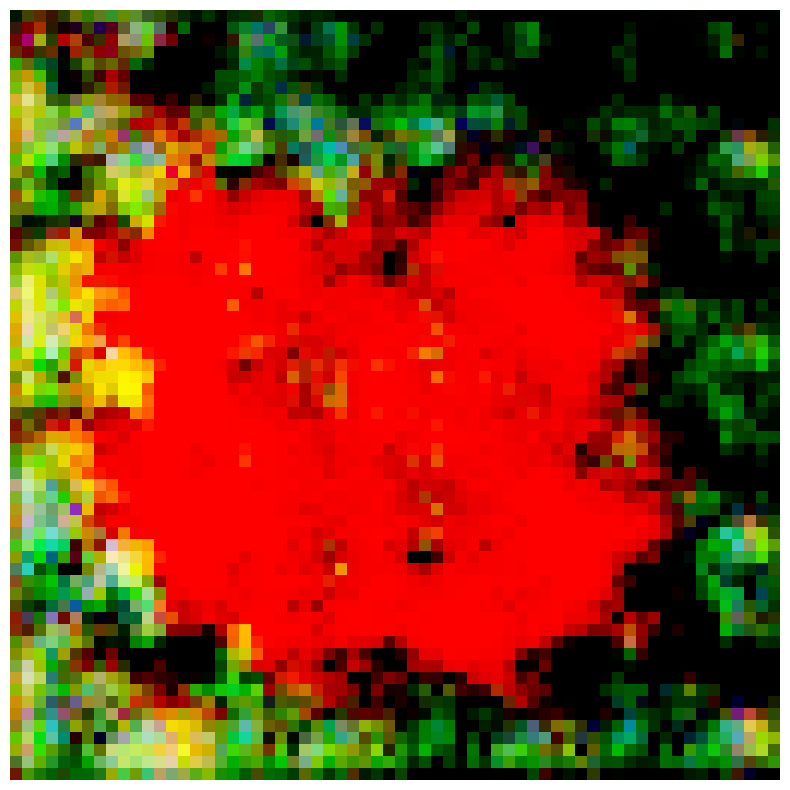

Epoch [97/200]  Loss D: 0.6401, Loss G: 0.9428


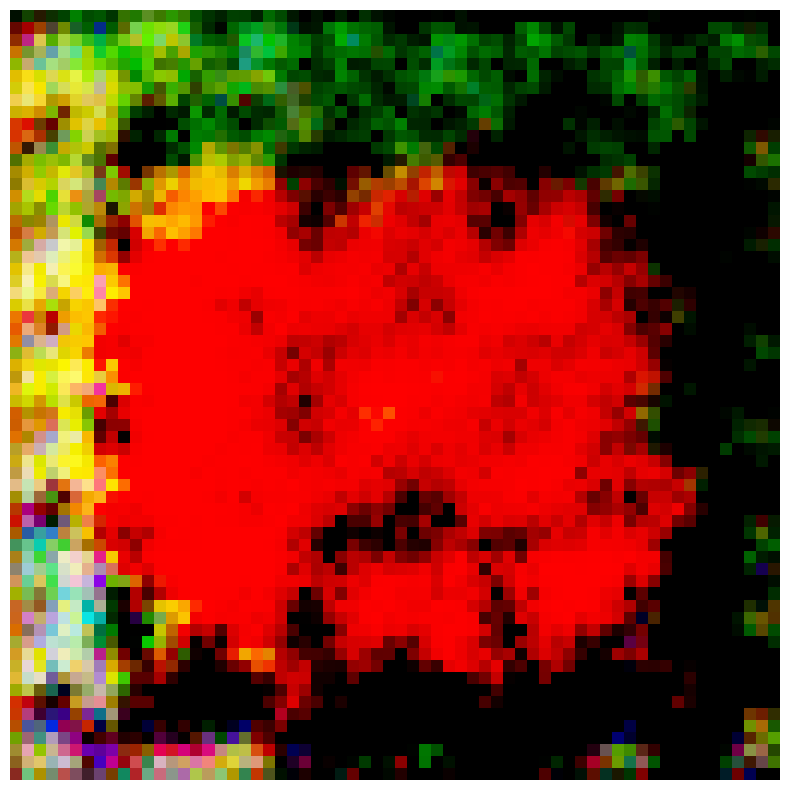

Epoch [98/200]  Loss D: 0.8299, Loss G: 3.7331


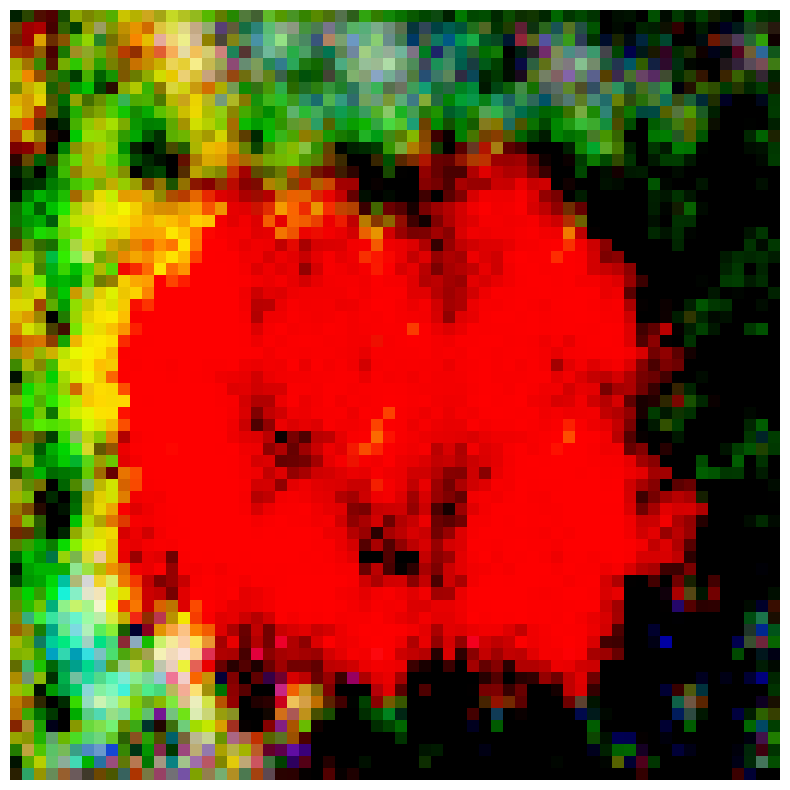

Epoch [99/200]  Loss D: 0.4788, Loss G: 1.5006


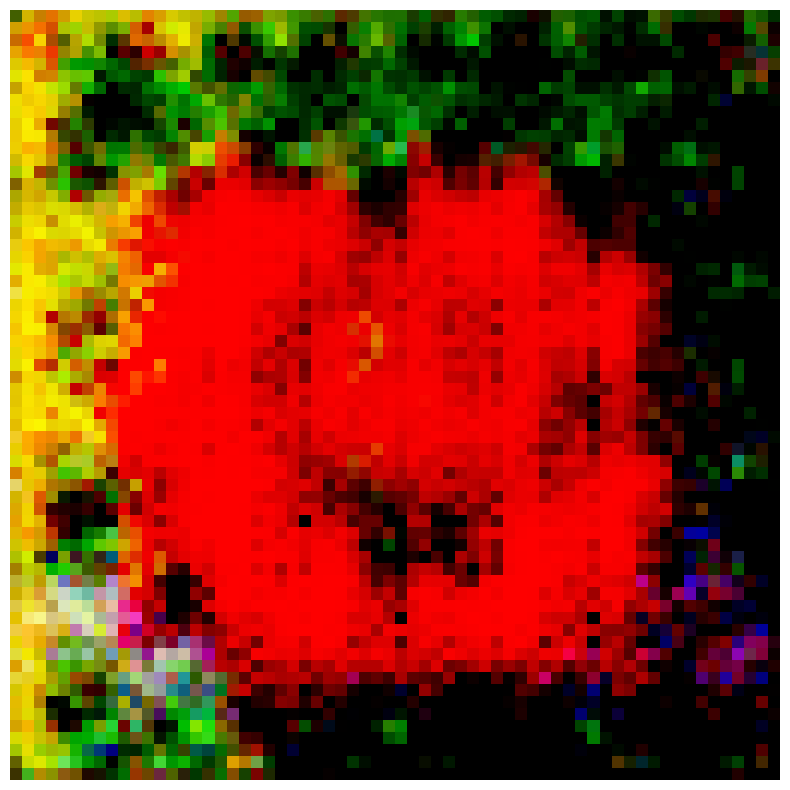

Epoch [100/200]  Loss D: 0.2905, Loss G: 2.0841


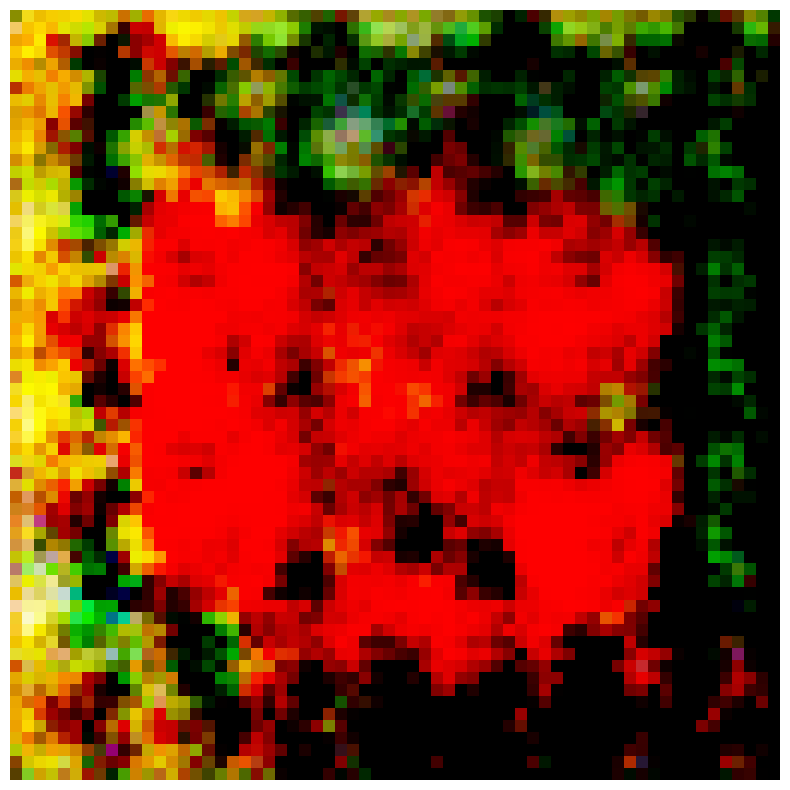

Epoch [101/200]  Loss D: 0.2220, Loss G: 2.7613


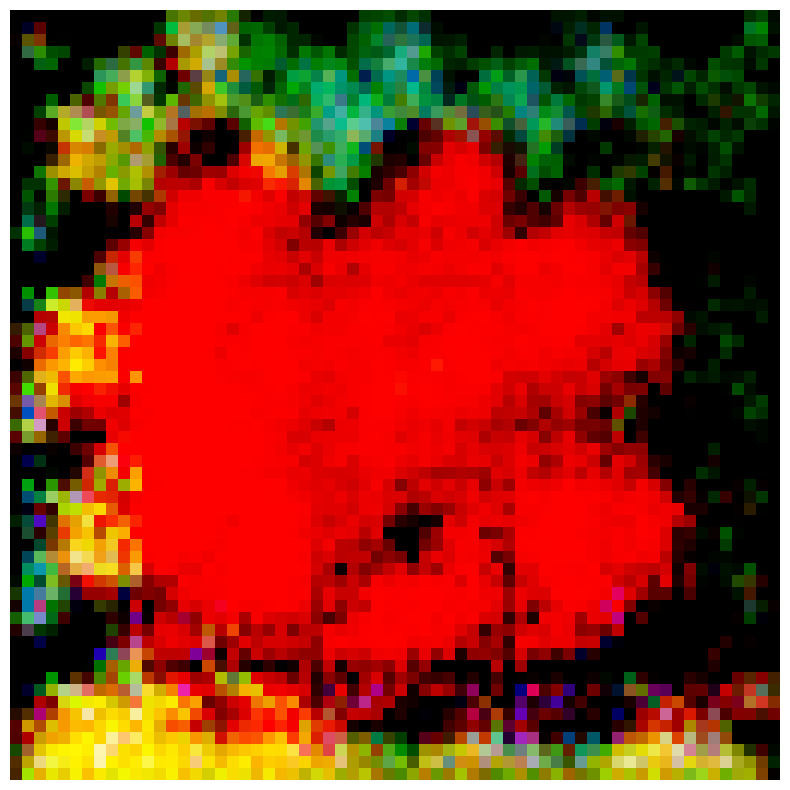

Epoch [102/200]  Loss D: 0.6611, Loss G: 4.7448


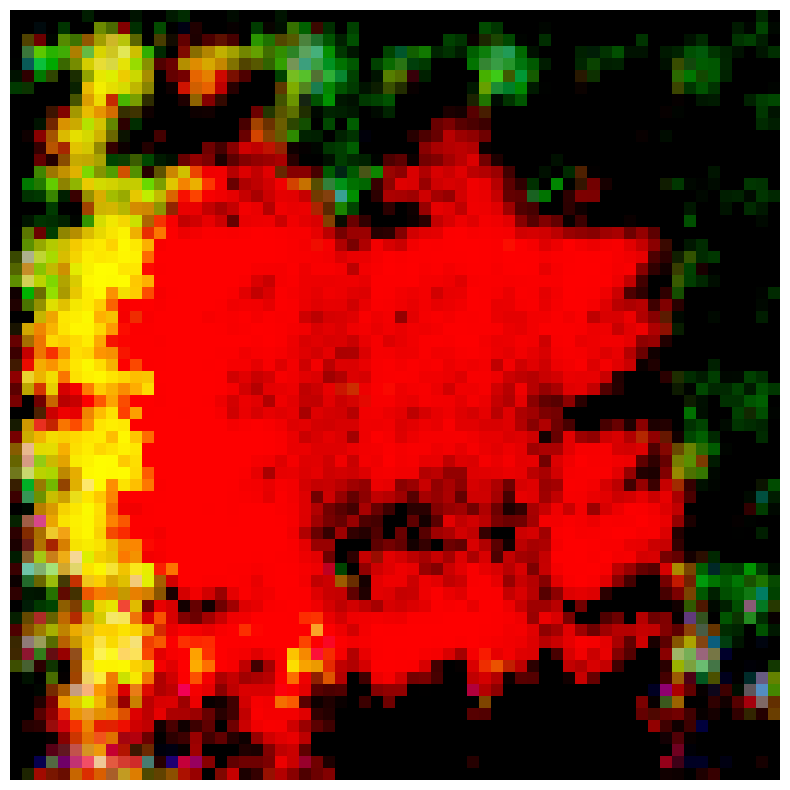

Epoch [103/200]  Loss D: 0.9160, Loss G: 0.4162


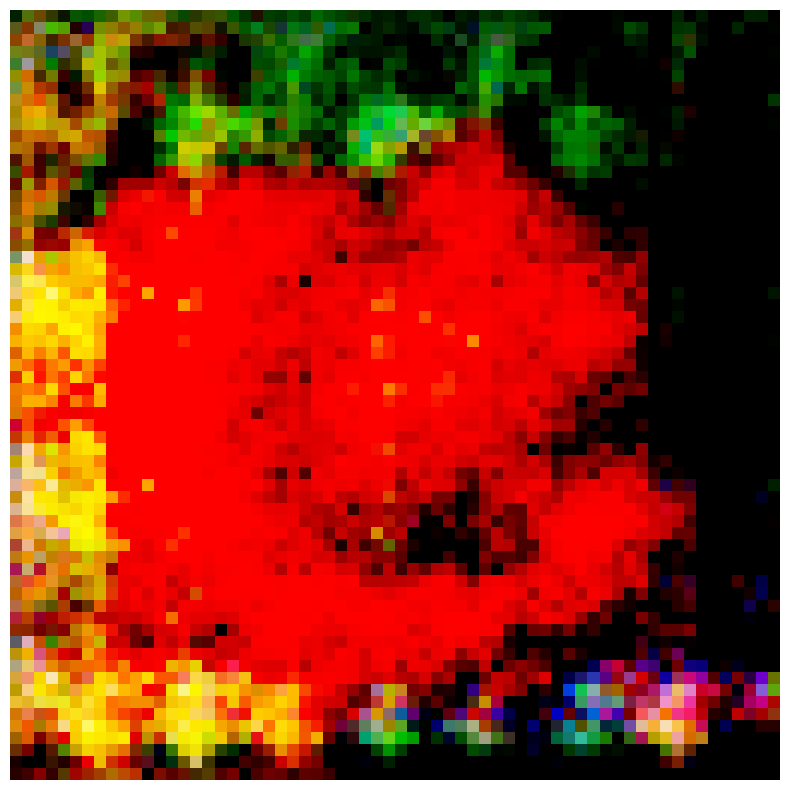

Epoch [104/200]  Loss D: 0.3012, Loss G: 2.1207


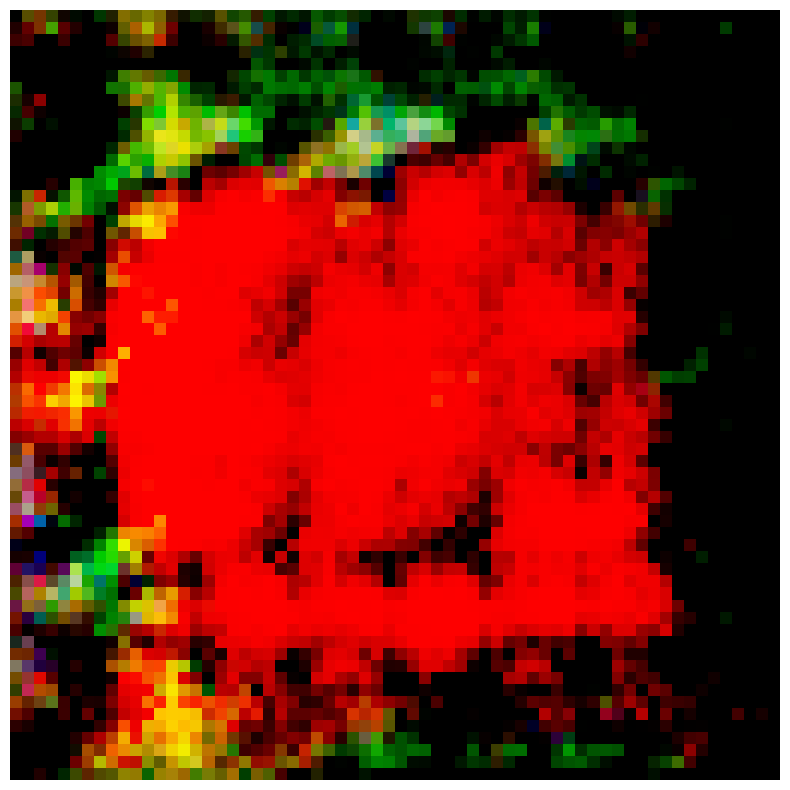

Epoch [105/200]  Loss D: 0.6203, Loss G: 0.8623


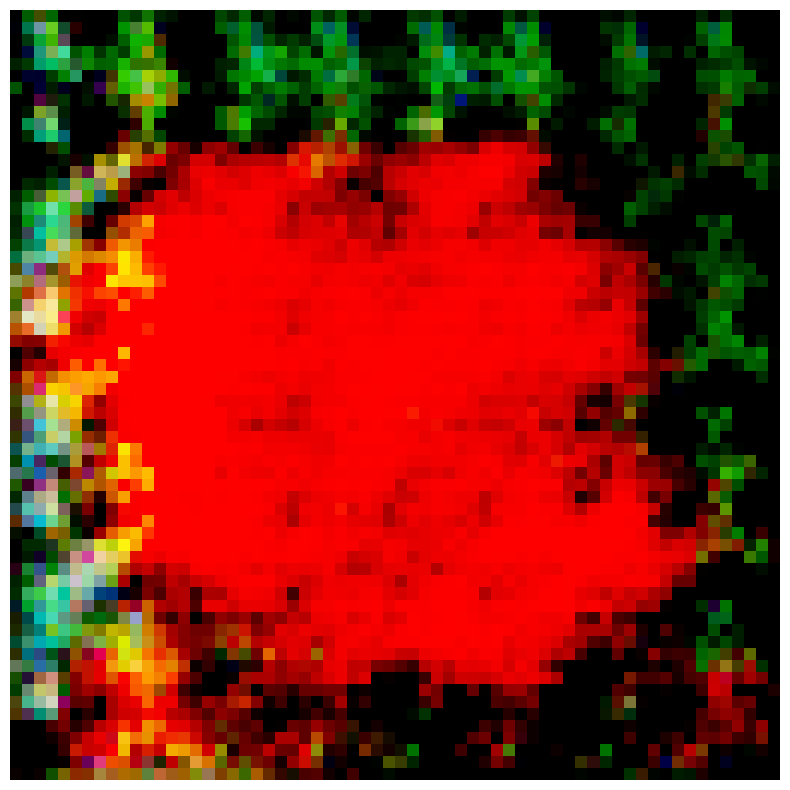

Epoch [106/200]  Loss D: 0.3392, Loss G: 2.3975


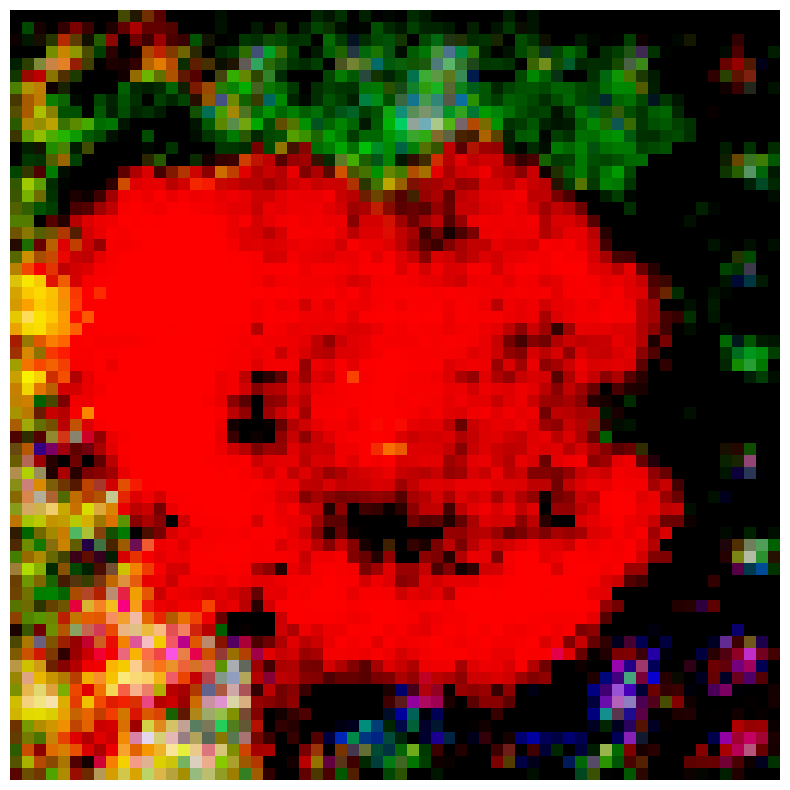

Epoch [107/200]  Loss D: 0.5571, Loss G: 6.7740


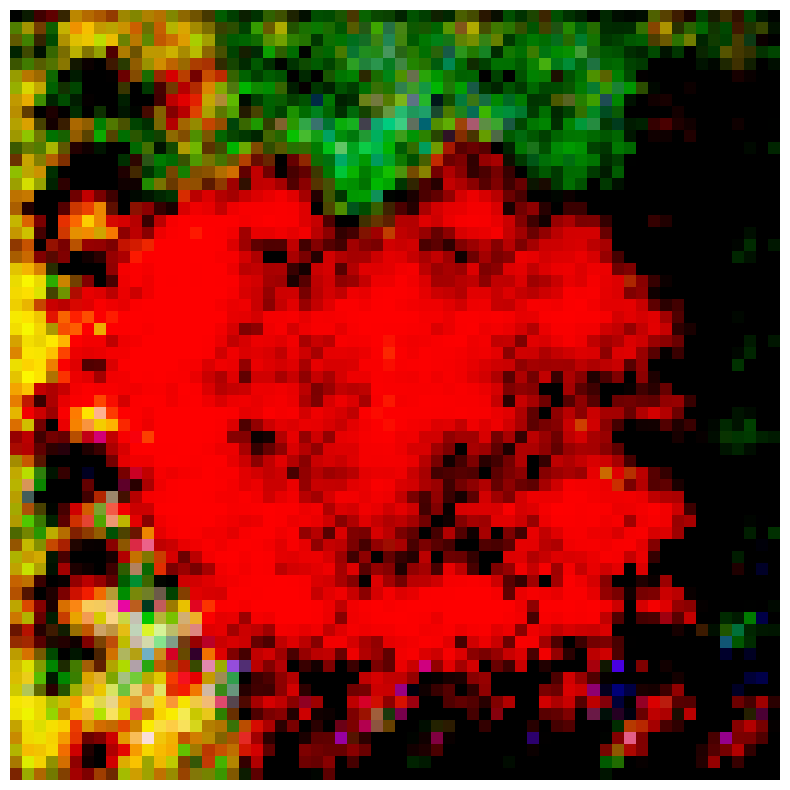

Epoch [108/200]  Loss D: 0.6041, Loss G: 4.6147


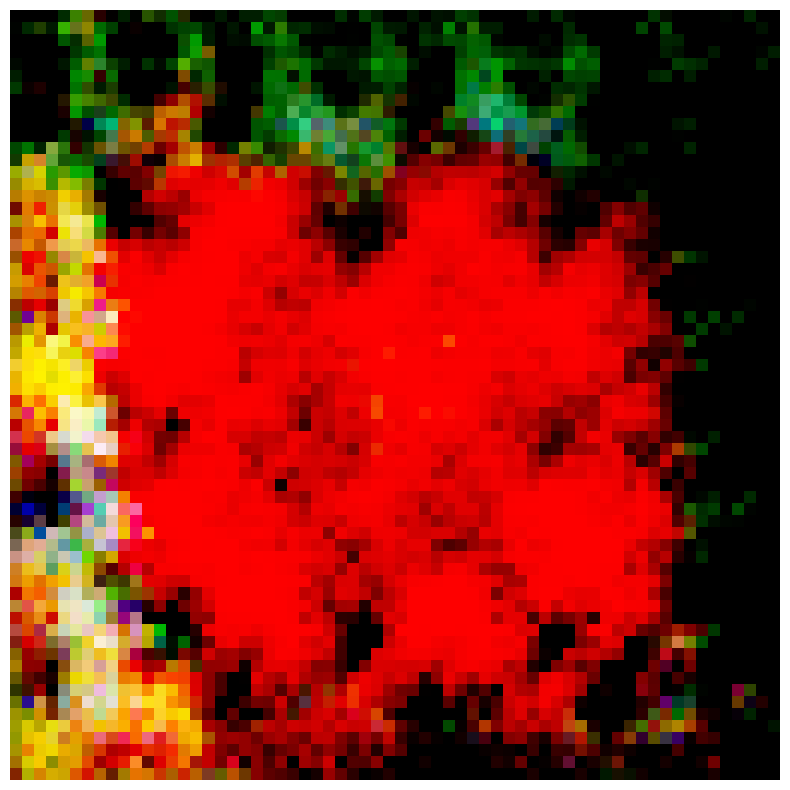

Epoch [109/200]  Loss D: 0.2984, Loss G: 3.0793


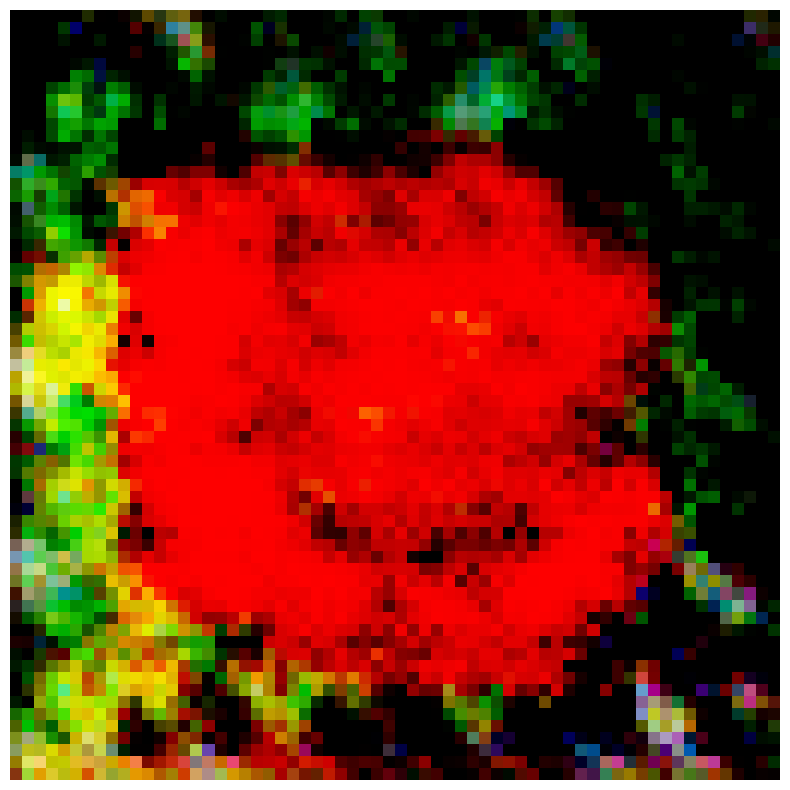

Epoch [110/200]  Loss D: 1.0891, Loss G: 1.1545


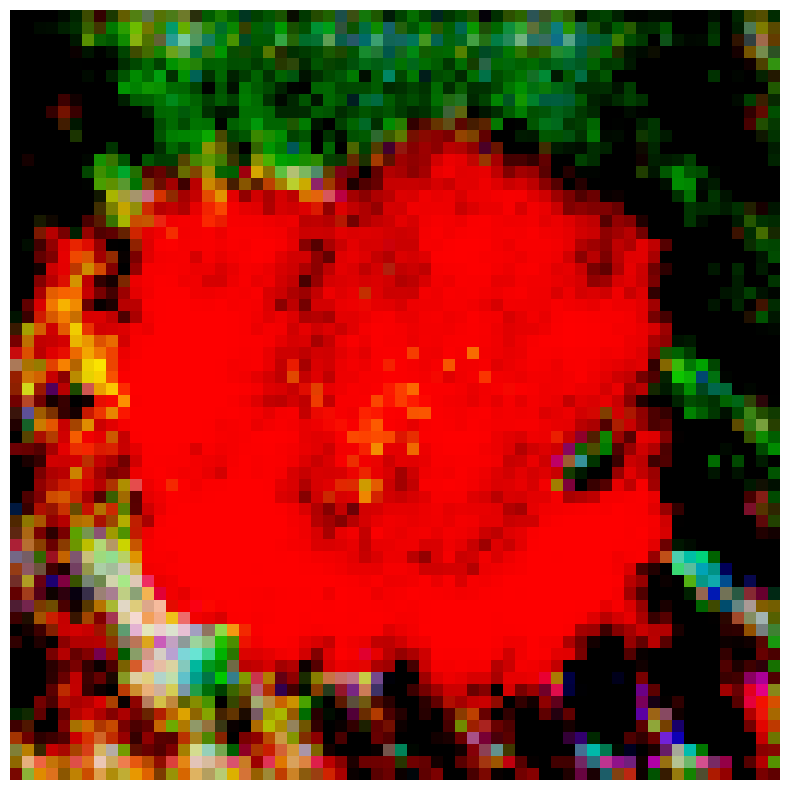

Epoch [111/200]  Loss D: 0.4788, Loss G: 2.7536


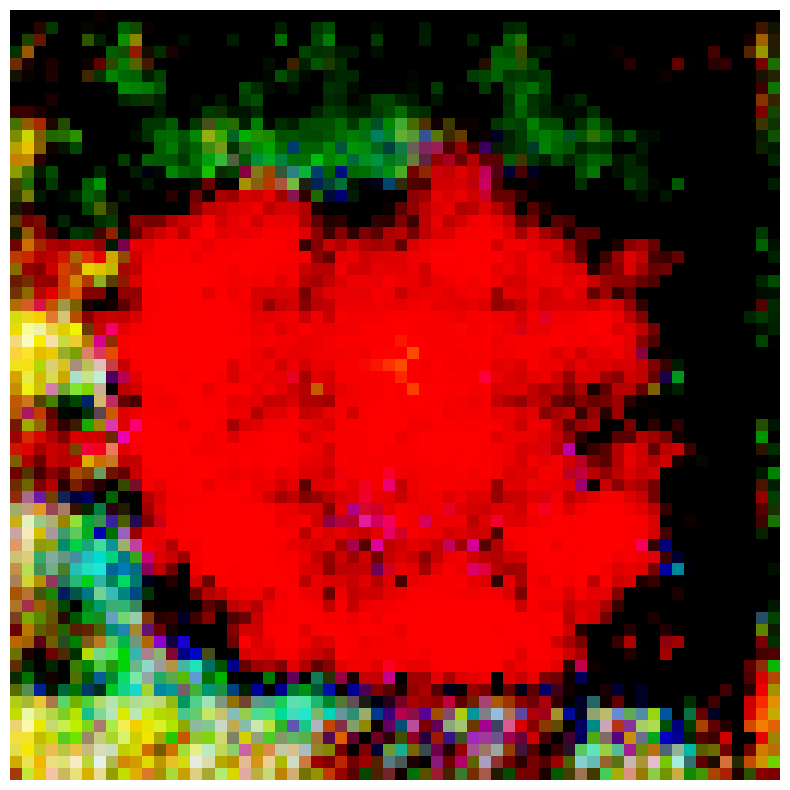

Epoch [112/200]  Loss D: 0.2813, Loss G: 4.3323


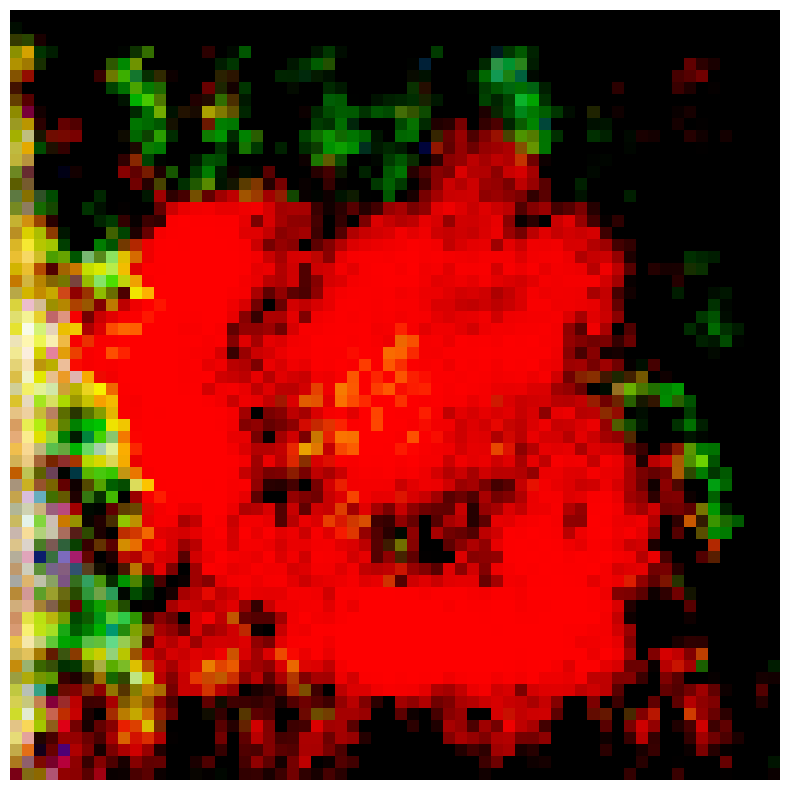

Epoch [113/200]  Loss D: 0.3391, Loss G: 3.8297


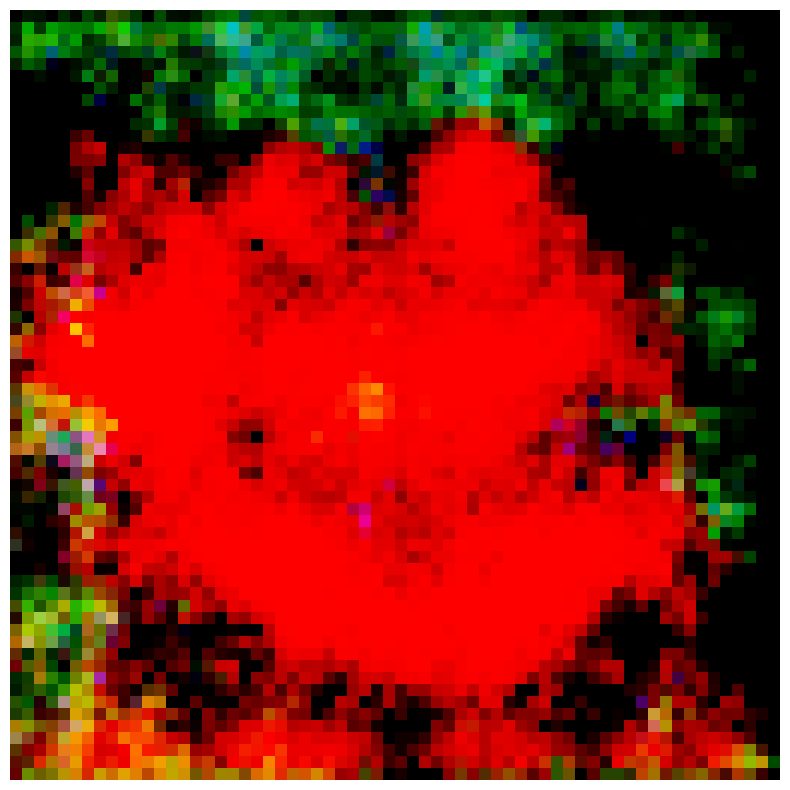

Epoch [114/200]  Loss D: 0.1493, Loss G: 3.8092


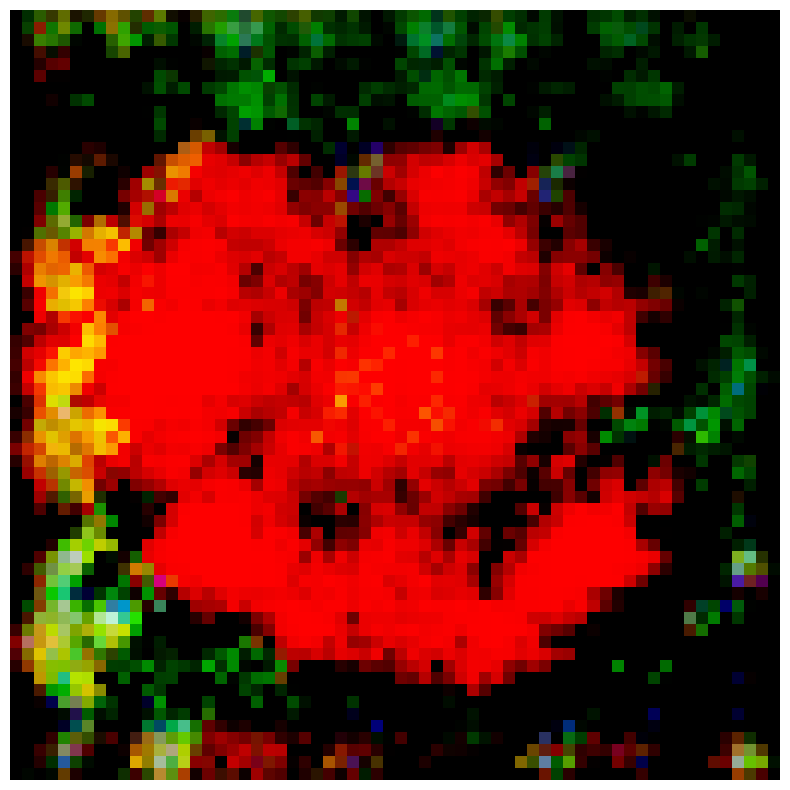

Epoch [115/200]  Loss D: 0.4039, Loss G: 1.9547


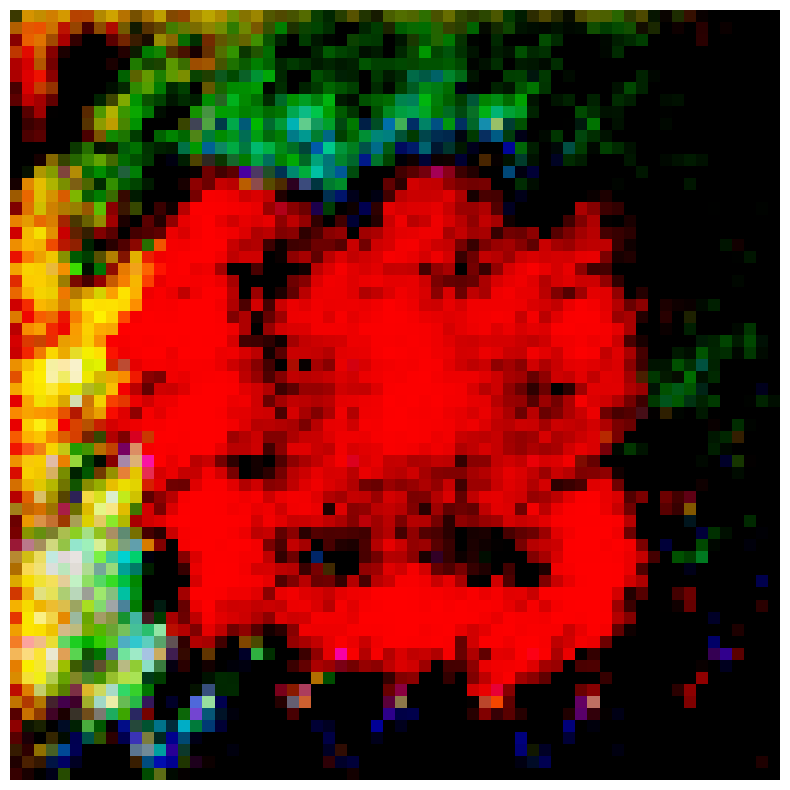

Epoch [116/200]  Loss D: 0.1220, Loss G: 4.2176


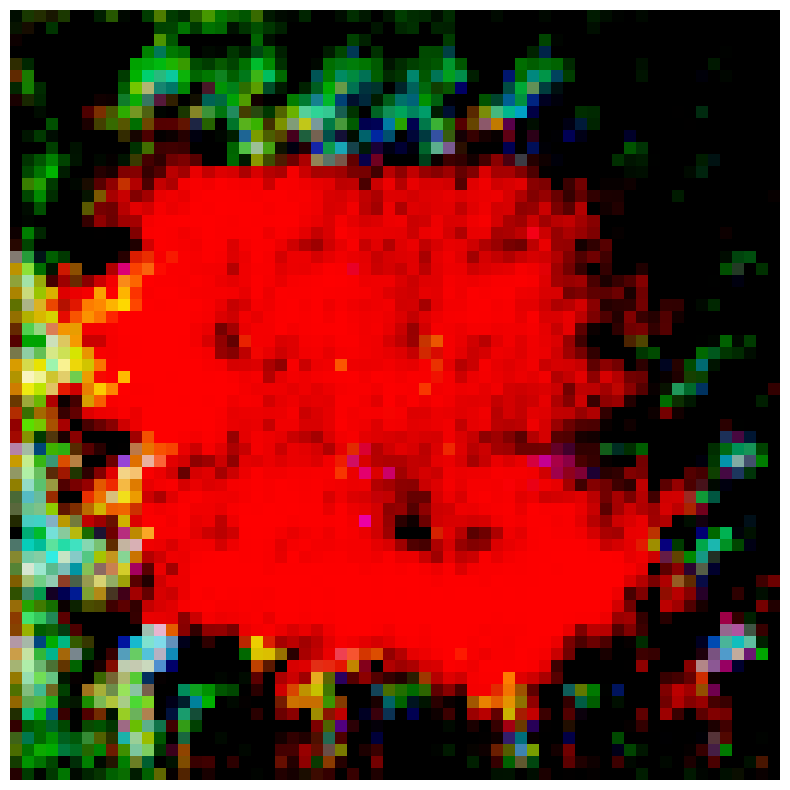

Epoch [117/200]  Loss D: 0.2944, Loss G: 2.6321


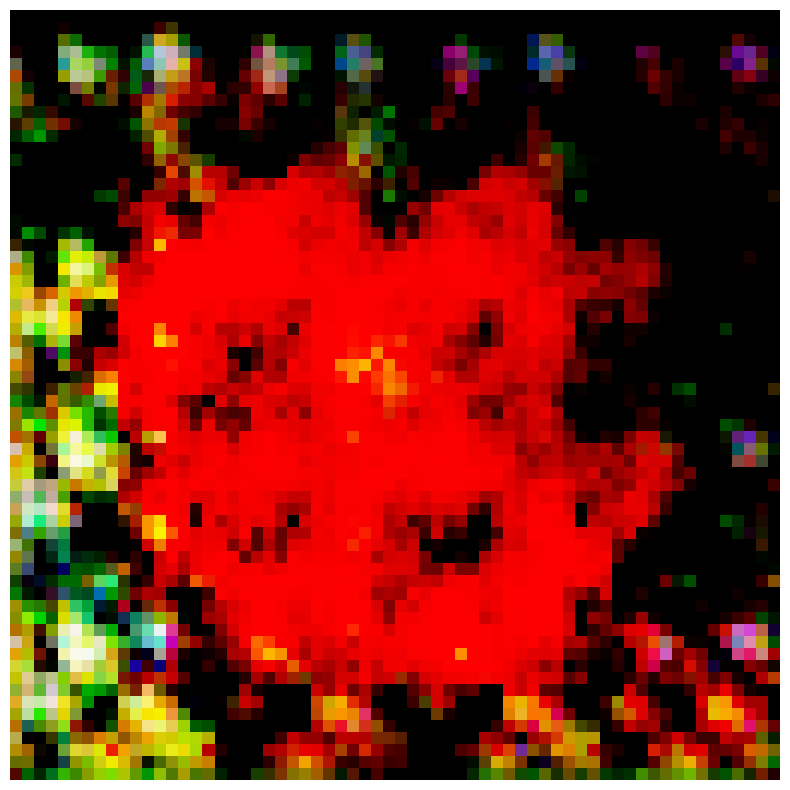

Epoch [118/200]  Loss D: 0.2282, Loss G: 3.3239


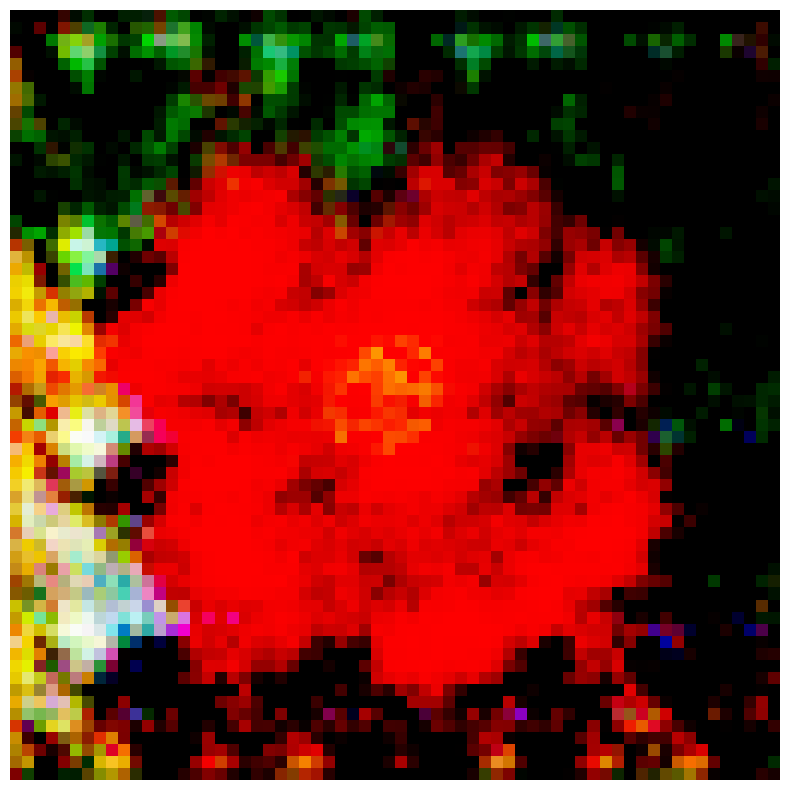

Epoch [119/200]  Loss D: 0.6570, Loss G: 6.1052


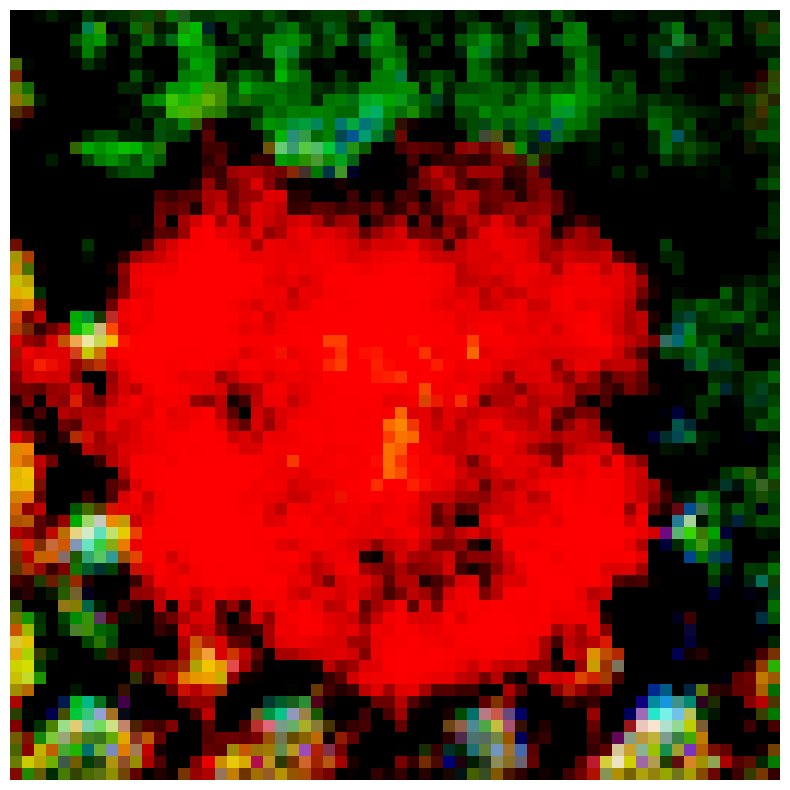

Epoch [120/200]  Loss D: 0.4392, Loss G: 1.7386


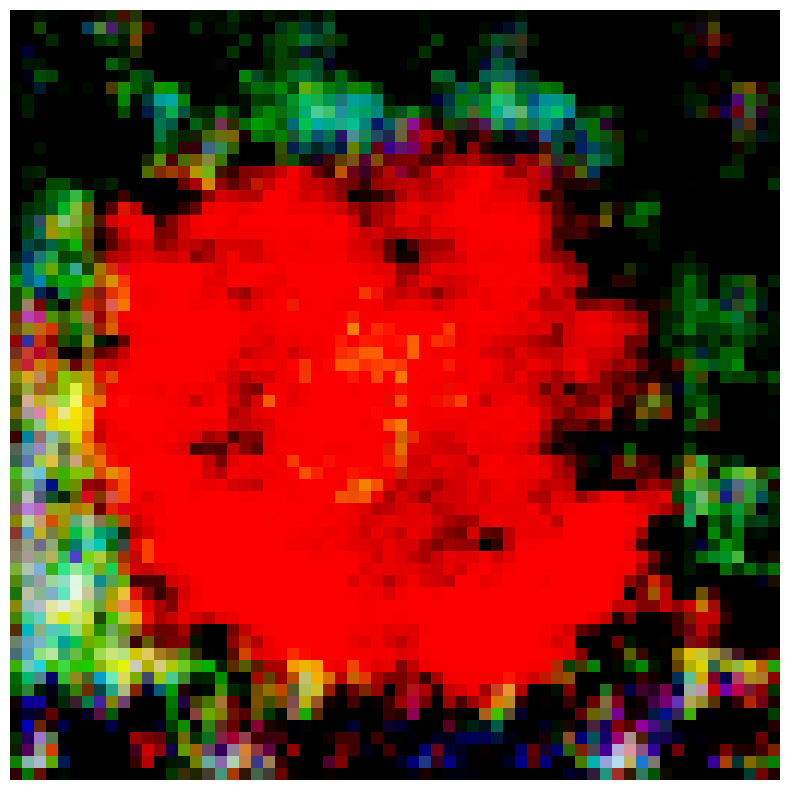

Epoch [121/200]  Loss D: 0.4703, Loss G: 2.9215


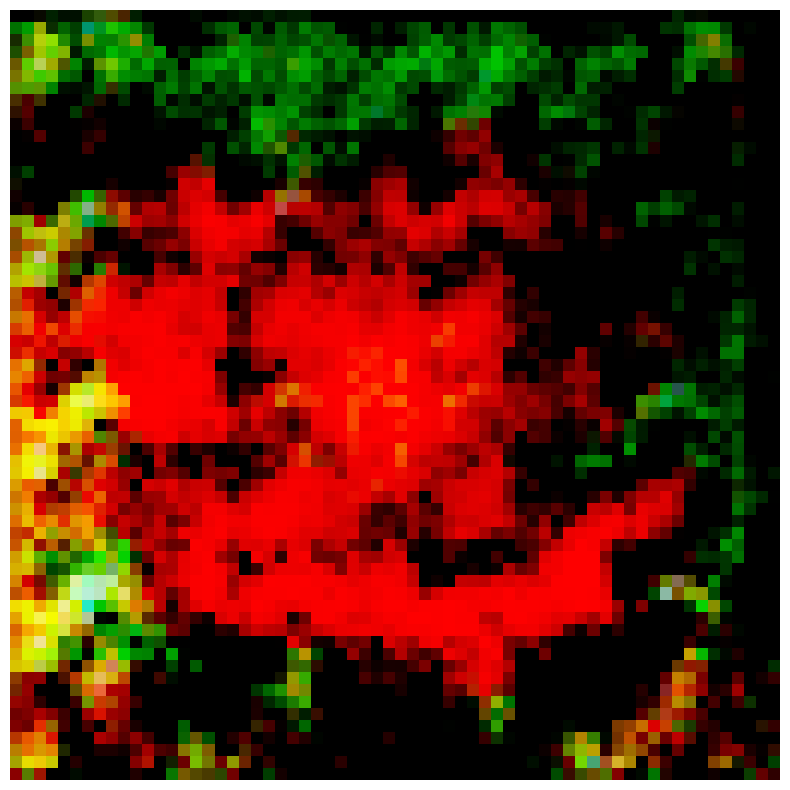

Epoch [122/200]  Loss D: 0.1902, Loss G: 2.9971


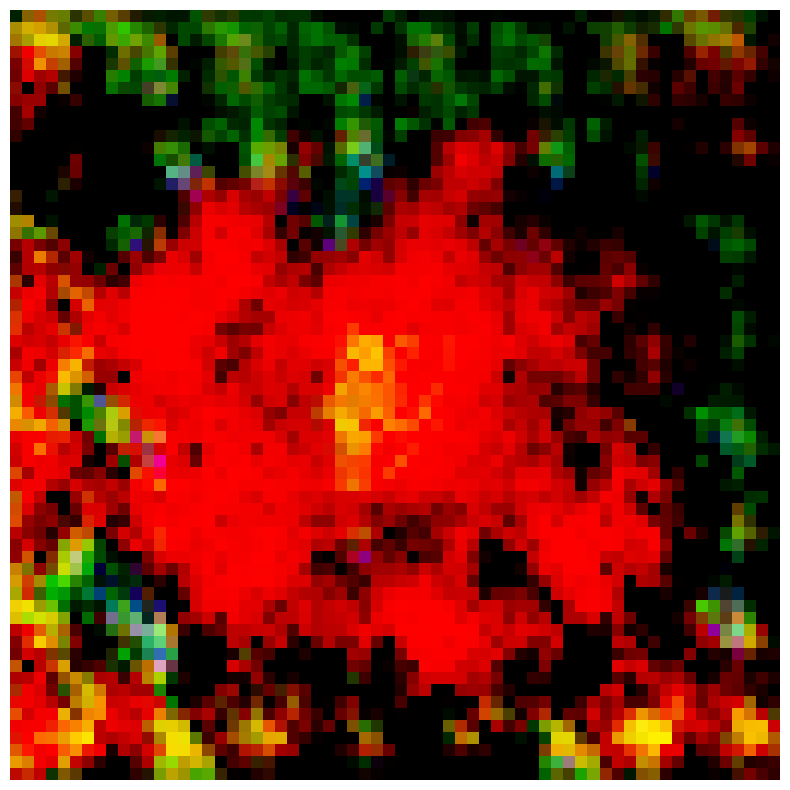

Epoch [123/200]  Loss D: 0.4471, Loss G: 3.0974


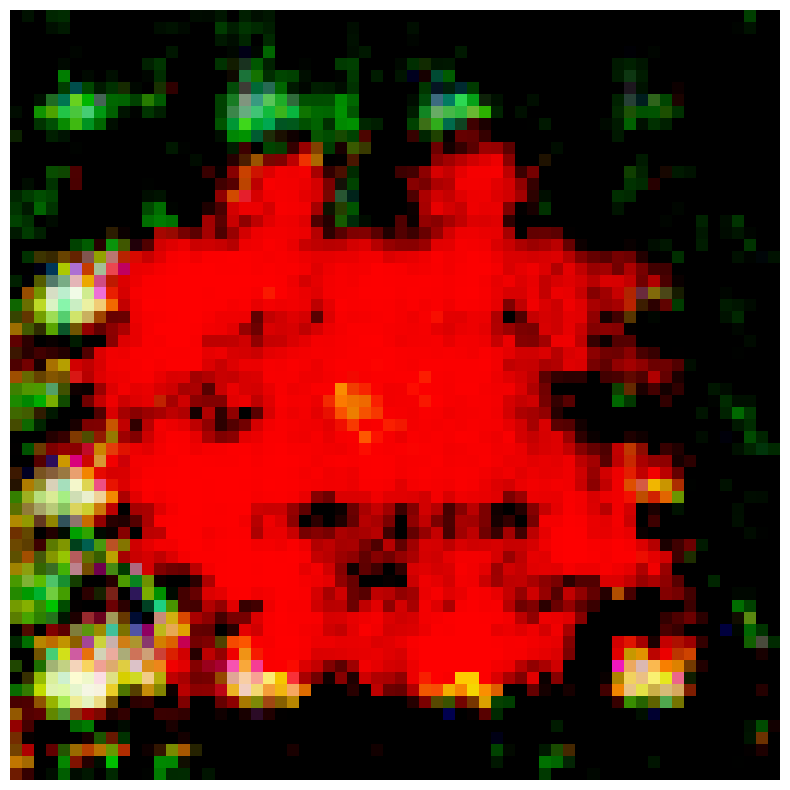

Epoch [124/200]  Loss D: 0.2543, Loss G: 2.5043


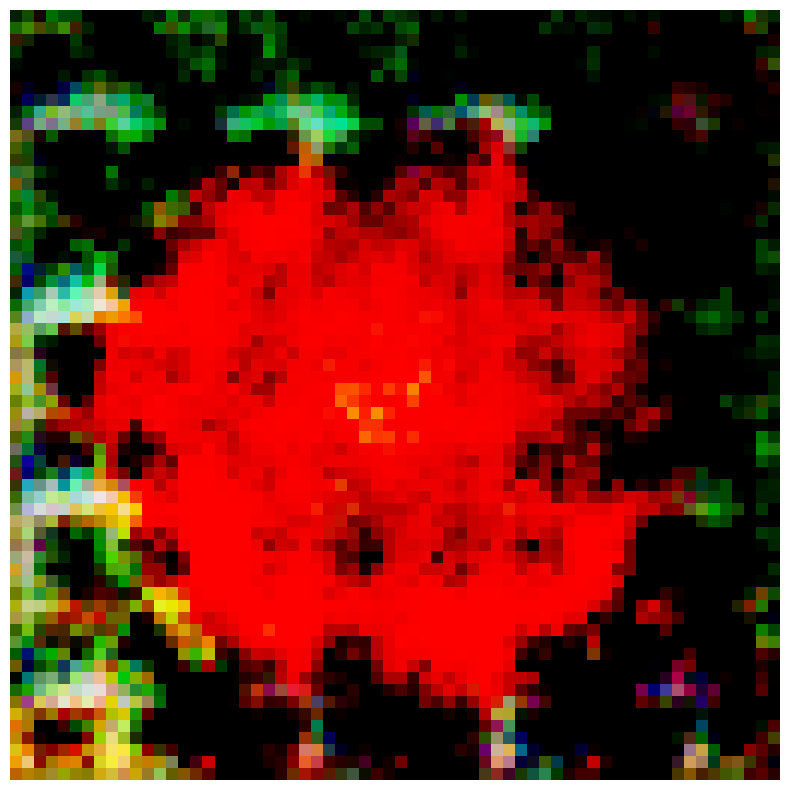

Epoch [125/200]  Loss D: 0.5720, Loss G: 2.6033


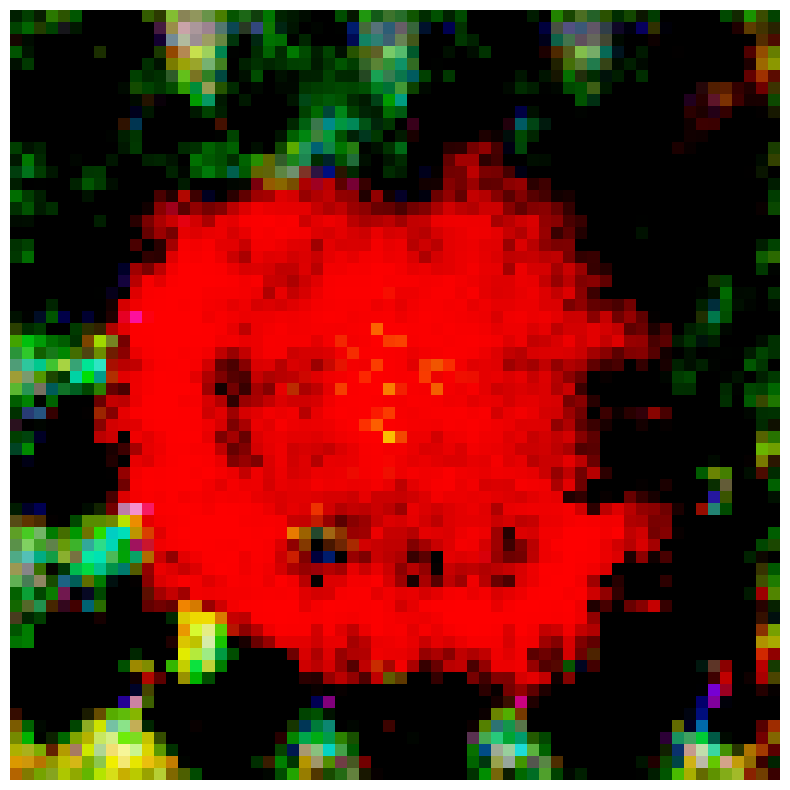

Epoch [126/200]  Loss D: 0.4335, Loss G: 4.5903


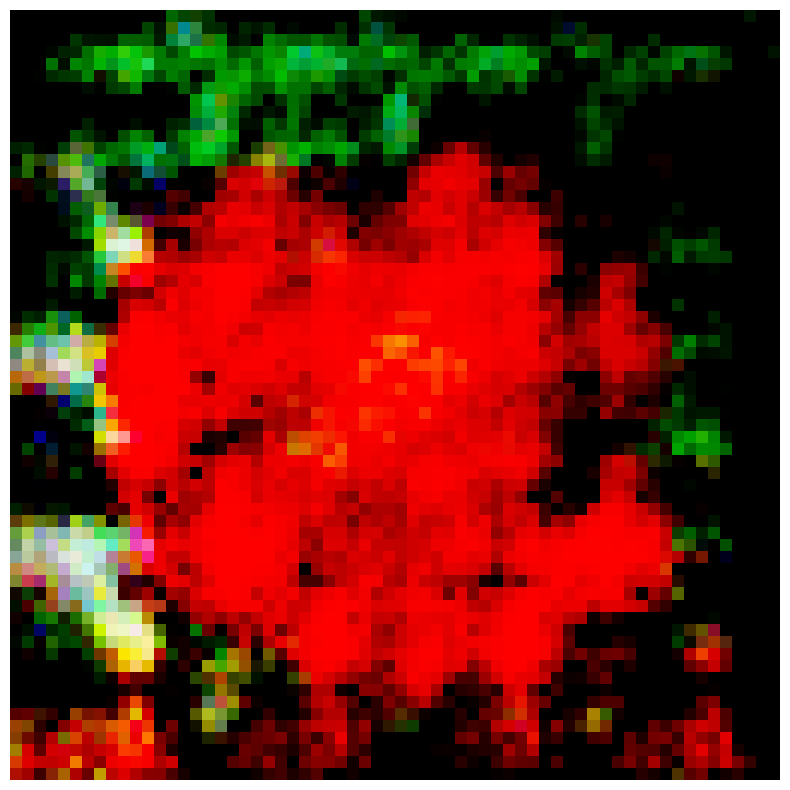

Epoch [127/200]  Loss D: 0.2090, Loss G: 2.9909


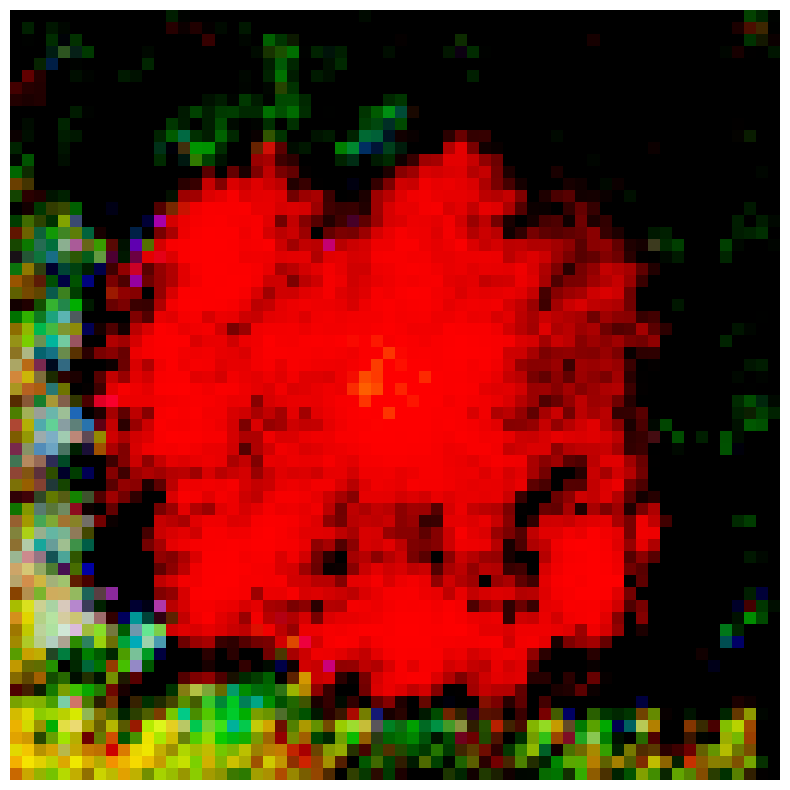

Epoch [128/200]  Loss D: 0.6248, Loss G: 5.7525


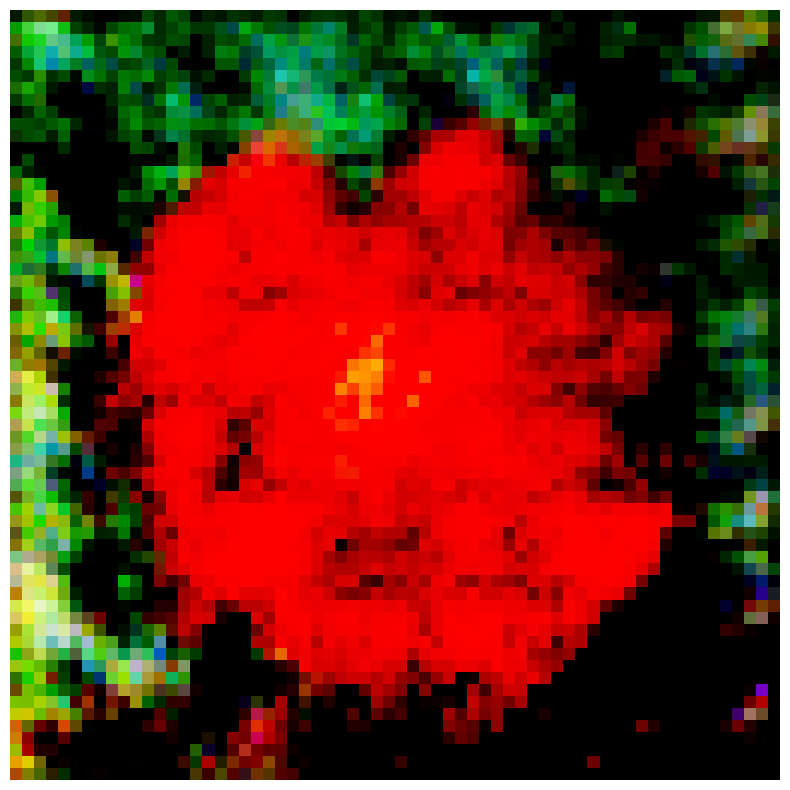

Epoch [129/200]  Loss D: 0.4500, Loss G: 3.3953


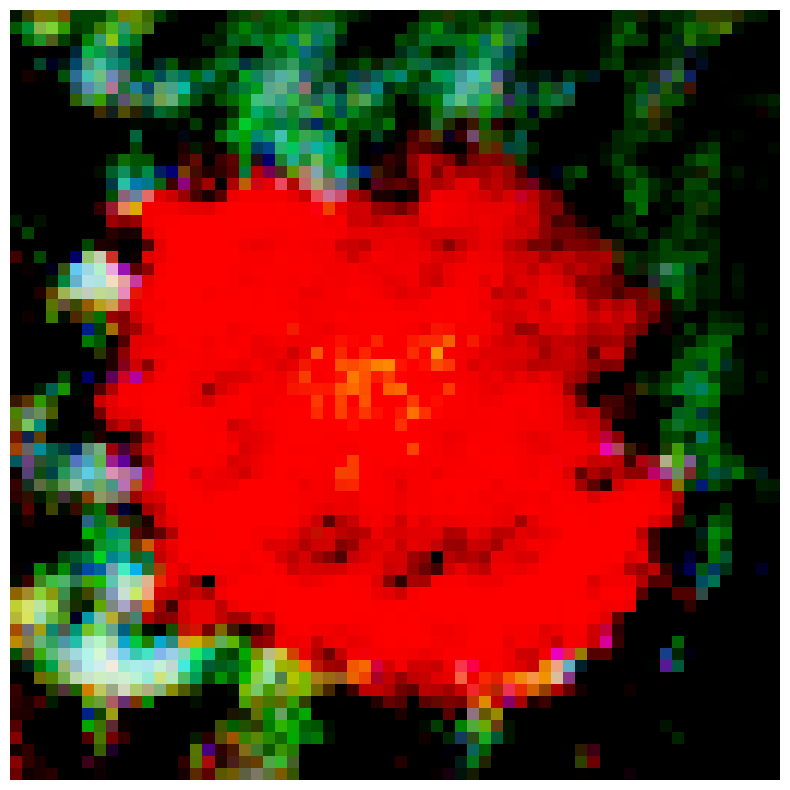

Epoch [130/200]  Loss D: 0.2522, Loss G: 5.1800


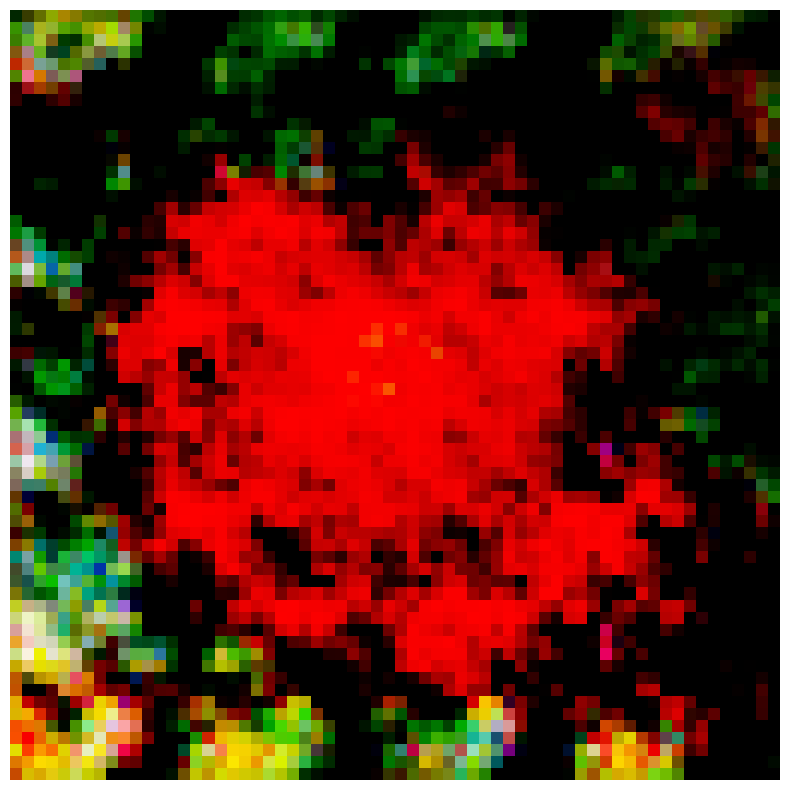

Epoch [131/200]  Loss D: 0.3568, Loss G: 7.8468


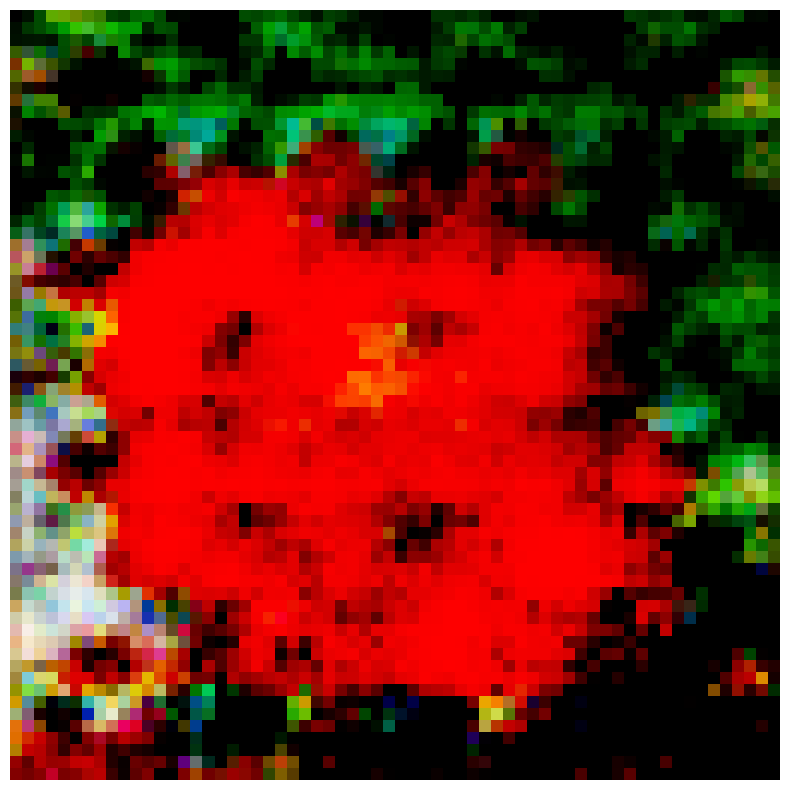

Epoch [132/200]  Loss D: 0.2619, Loss G: 3.9539


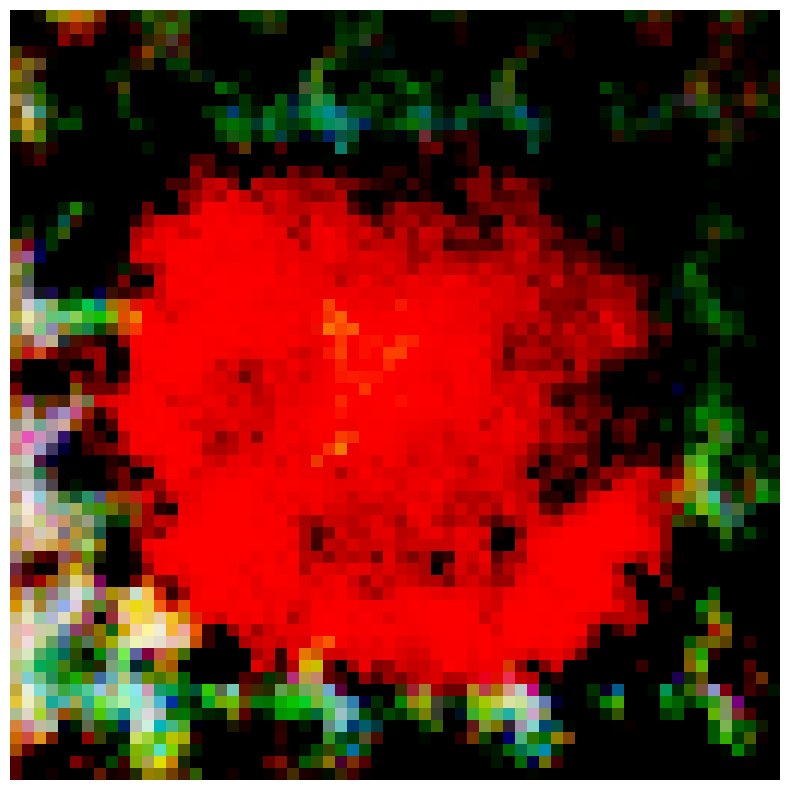

Epoch [133/200]  Loss D: 0.6252, Loss G: 5.0828


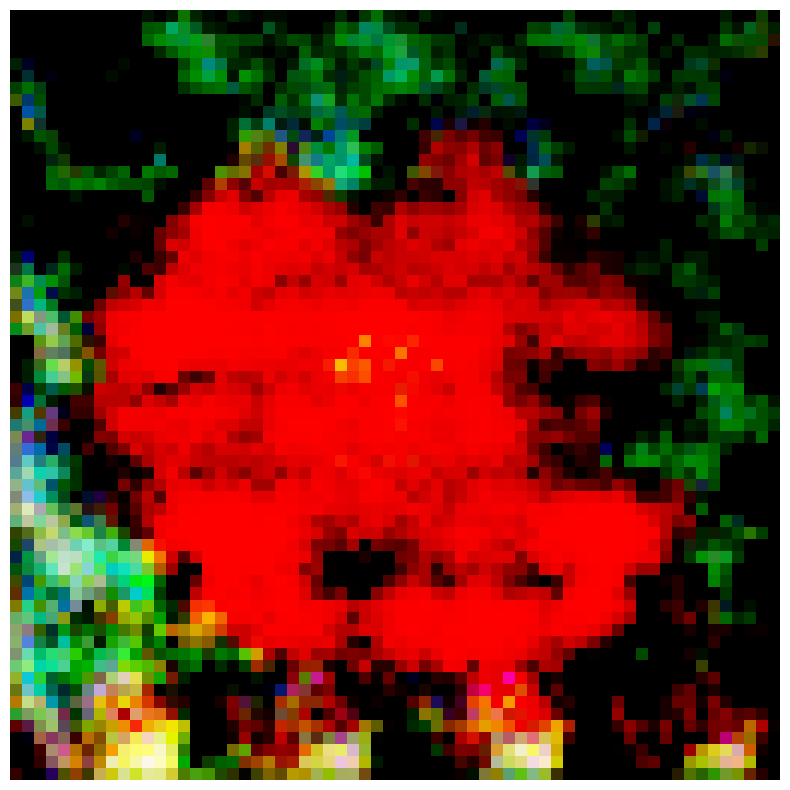

Epoch [134/200]  Loss D: 0.3652, Loss G: 3.9294


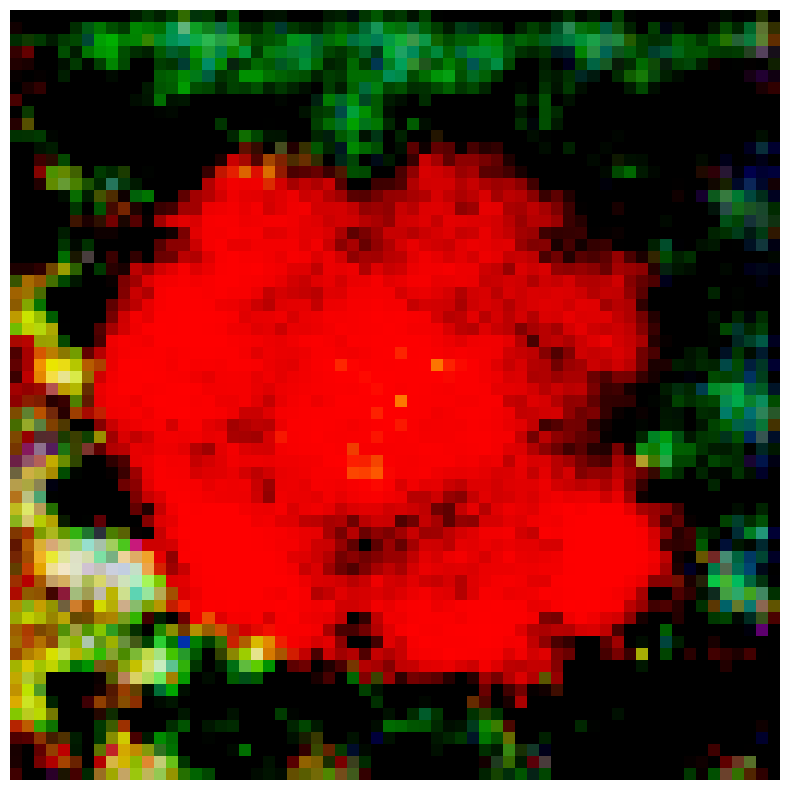

Epoch [135/200]  Loss D: 0.4976, Loss G: 2.6282


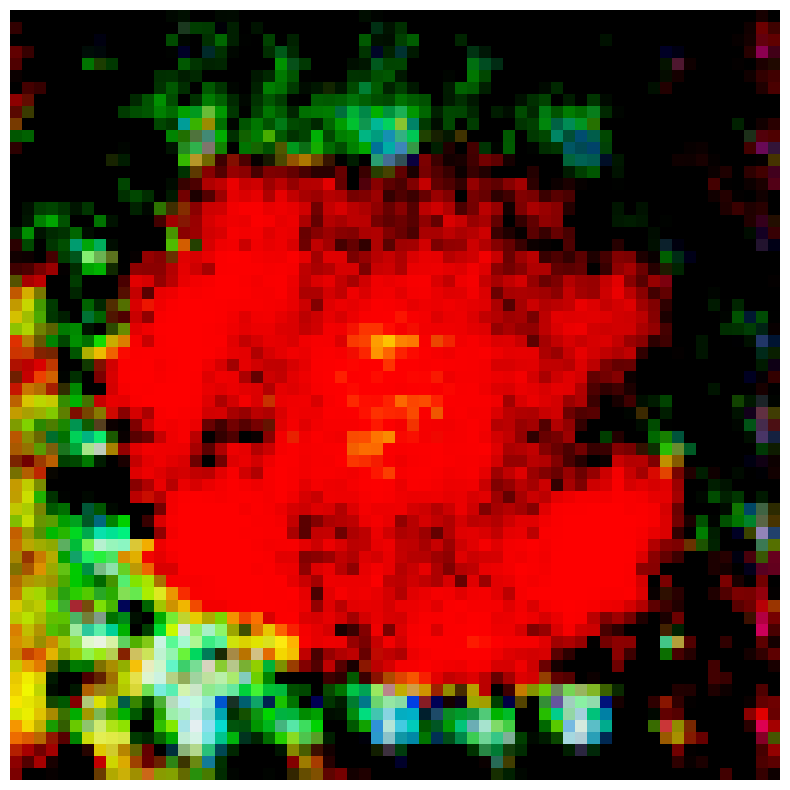

Epoch [136/200]  Loss D: 0.3178, Loss G: 2.7994


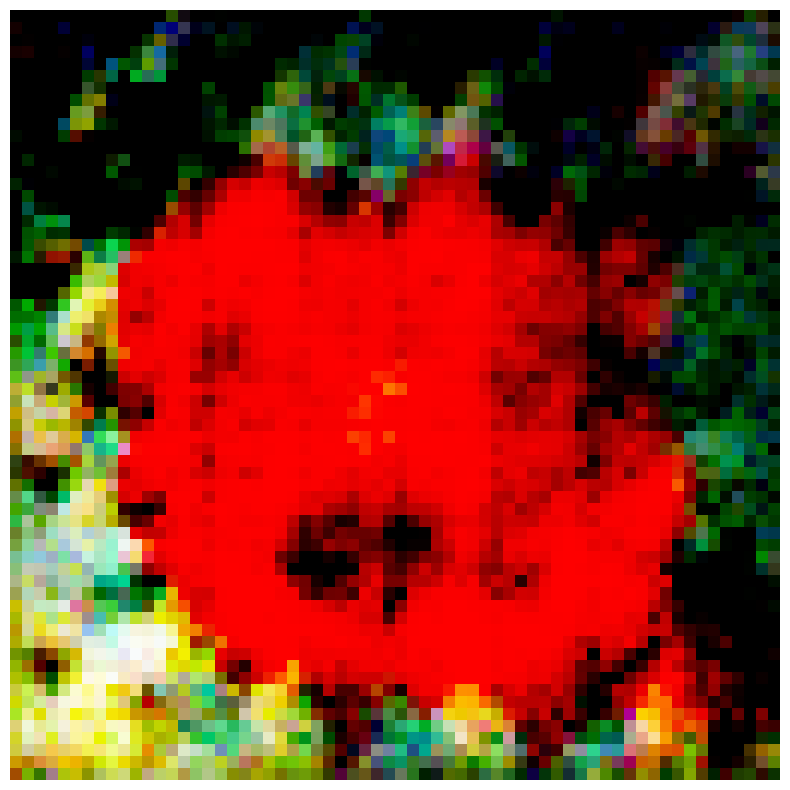

Epoch [137/200]  Loss D: 1.0938, Loss G: 0.2727


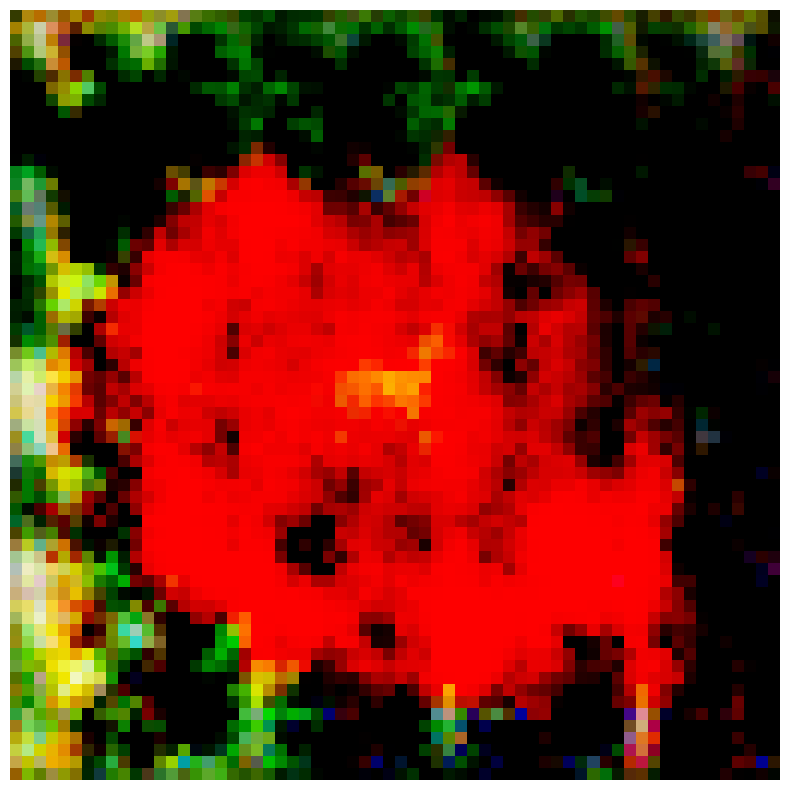

Epoch [138/200]  Loss D: 0.3414, Loss G: 4.7173


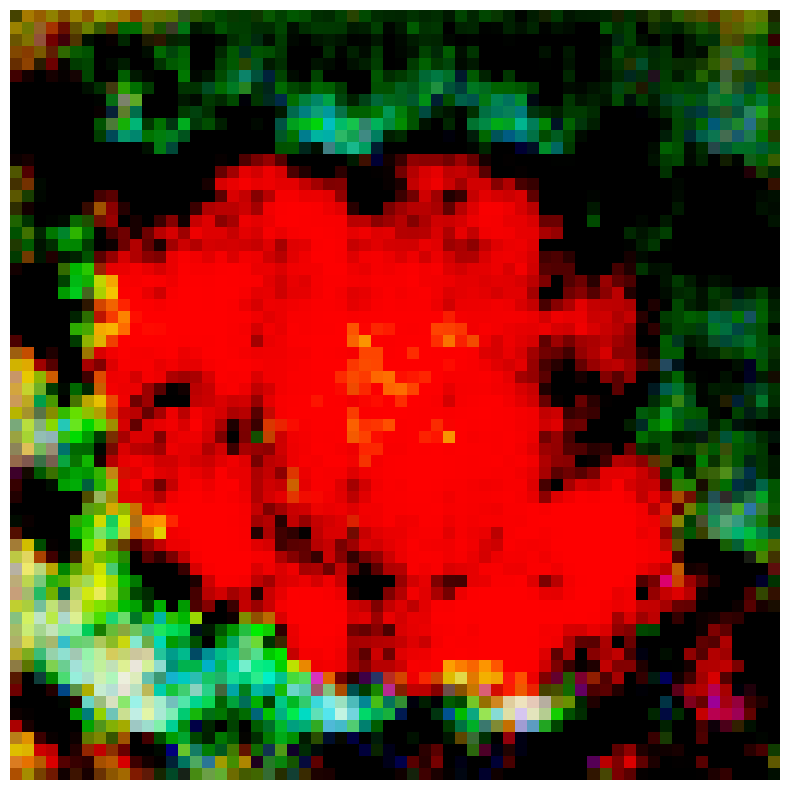

Epoch [139/200]  Loss D: 0.3800, Loss G: 2.9662


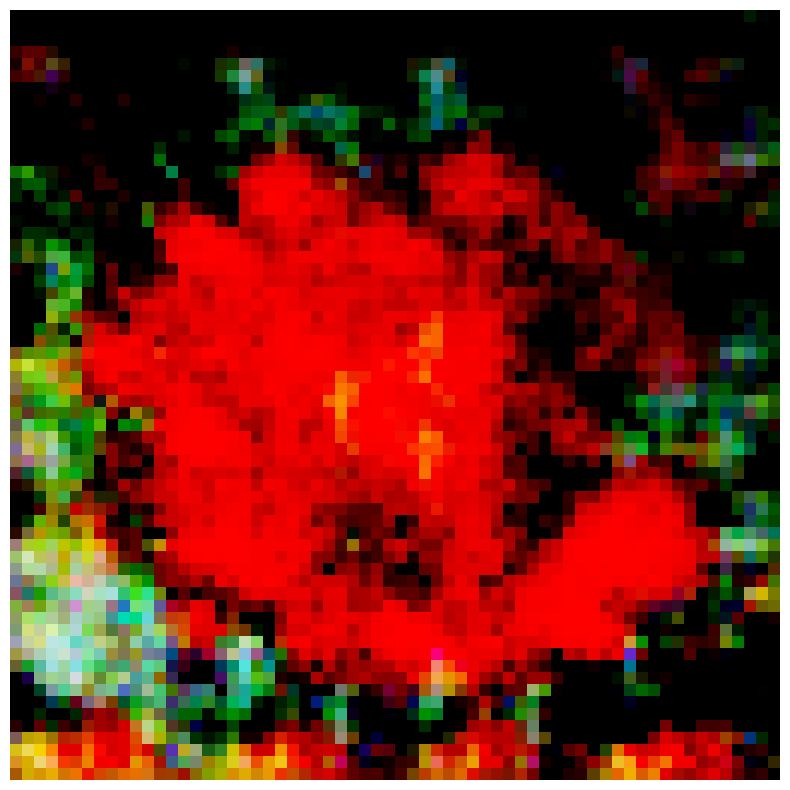

Epoch [140/200]  Loss D: 0.4464, Loss G: 3.9089


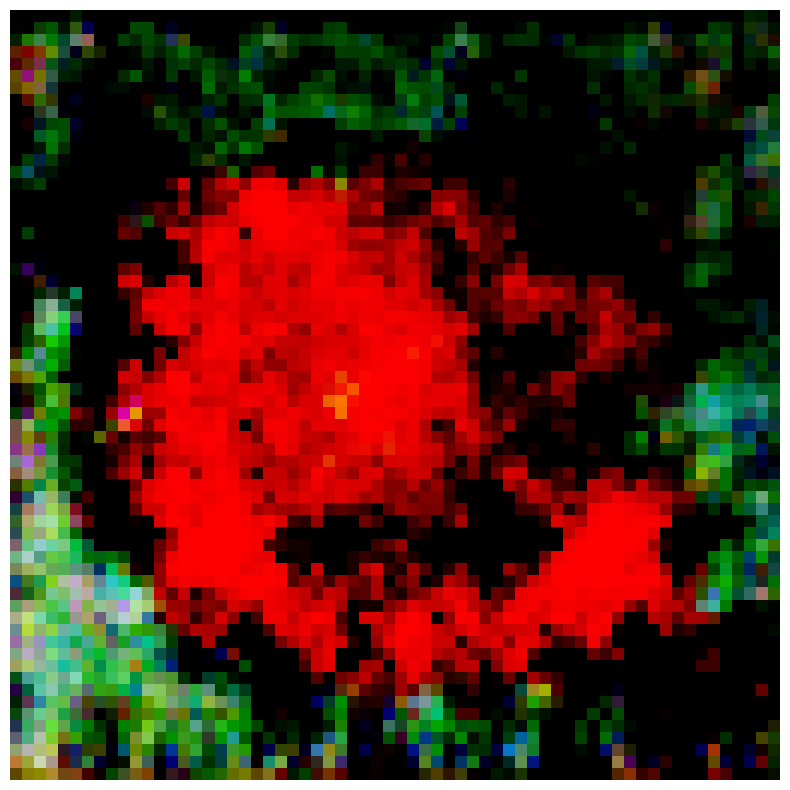

Epoch [141/200]  Loss D: 0.5250, Loss G: 5.5085


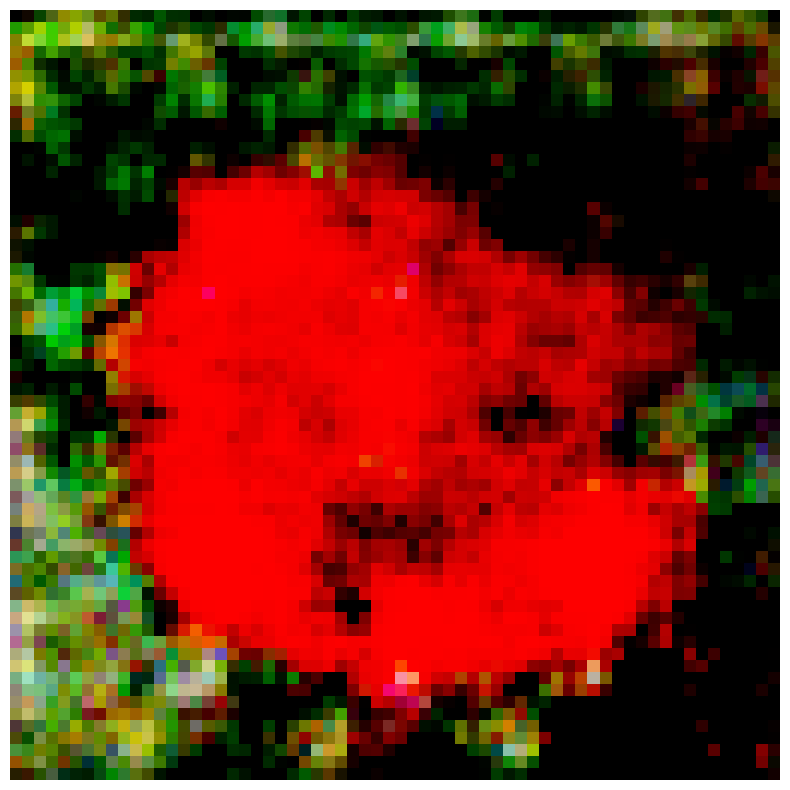

Epoch [142/200]  Loss D: 0.9266, Loss G: 8.4670


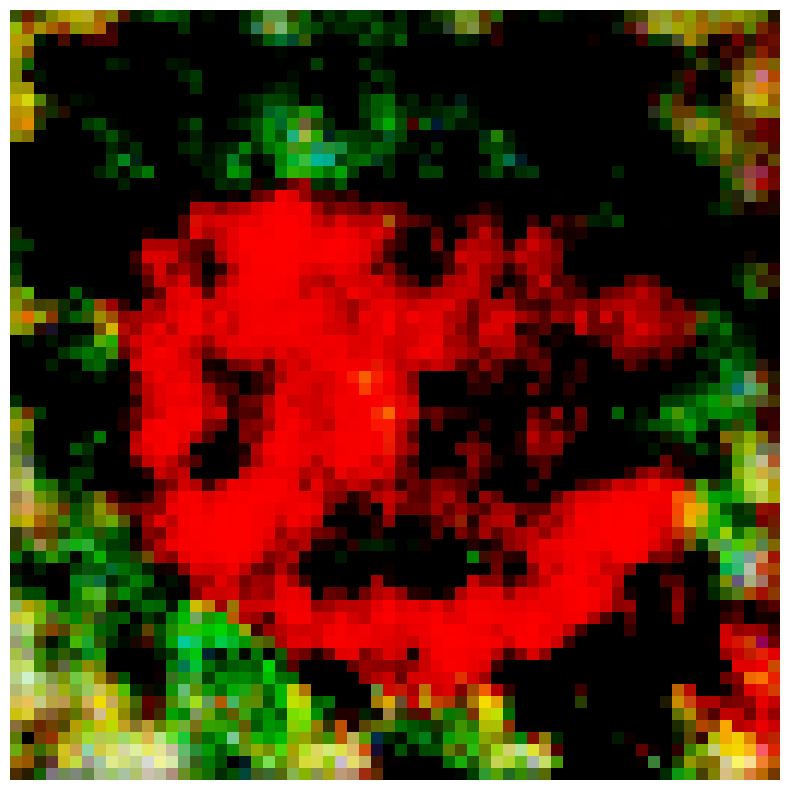

Epoch [143/200]  Loss D: 0.3166, Loss G: 2.7727


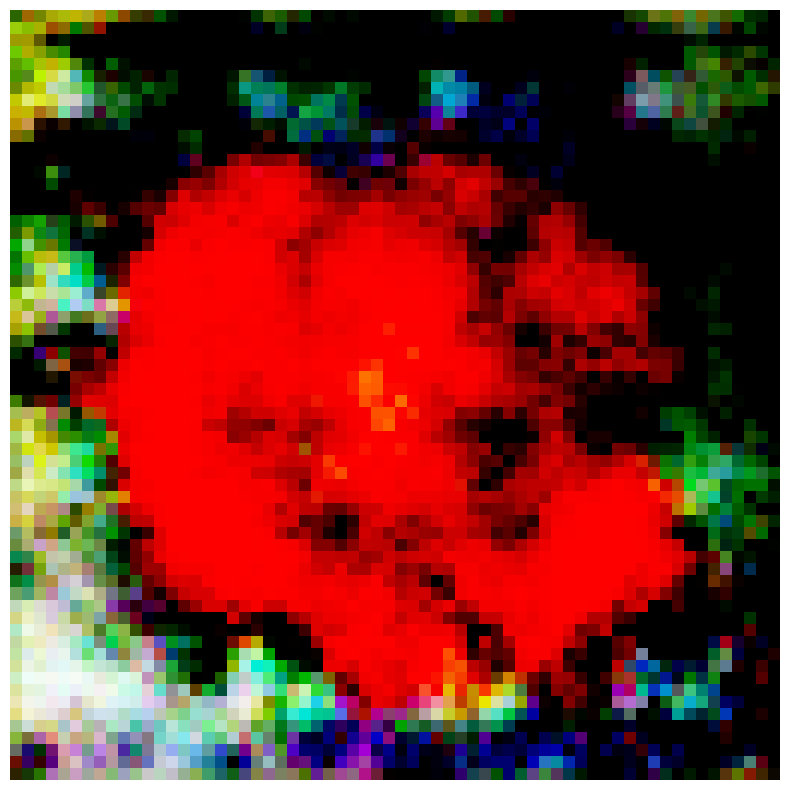

Epoch [144/200]  Loss D: 0.2978, Loss G: 3.2156


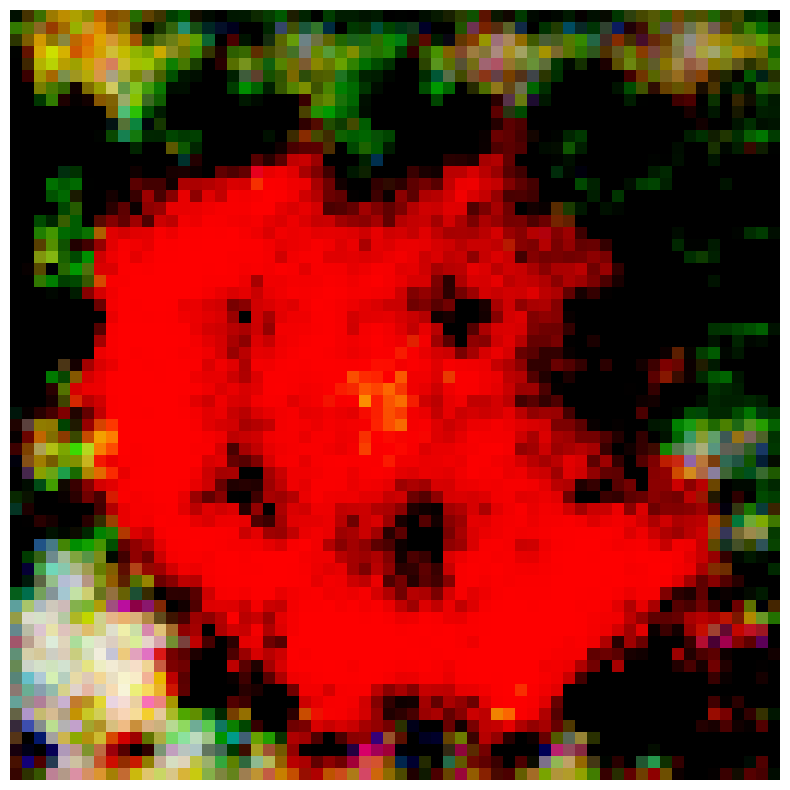

Epoch [145/200]  Loss D: 0.5766, Loss G: 9.6440


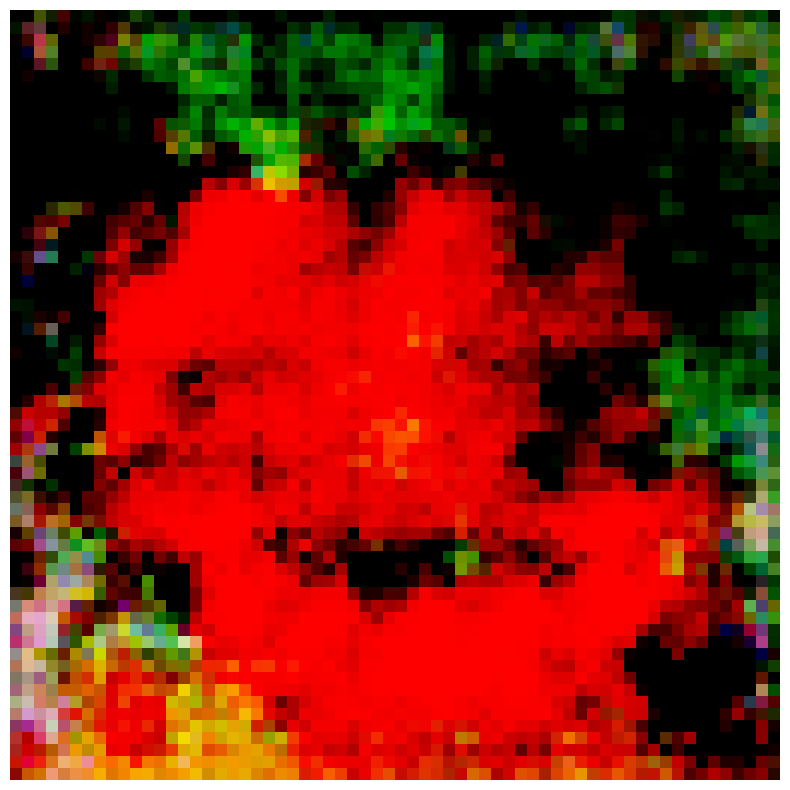

Epoch [146/200]  Loss D: 1.0280, Loss G: 0.9737


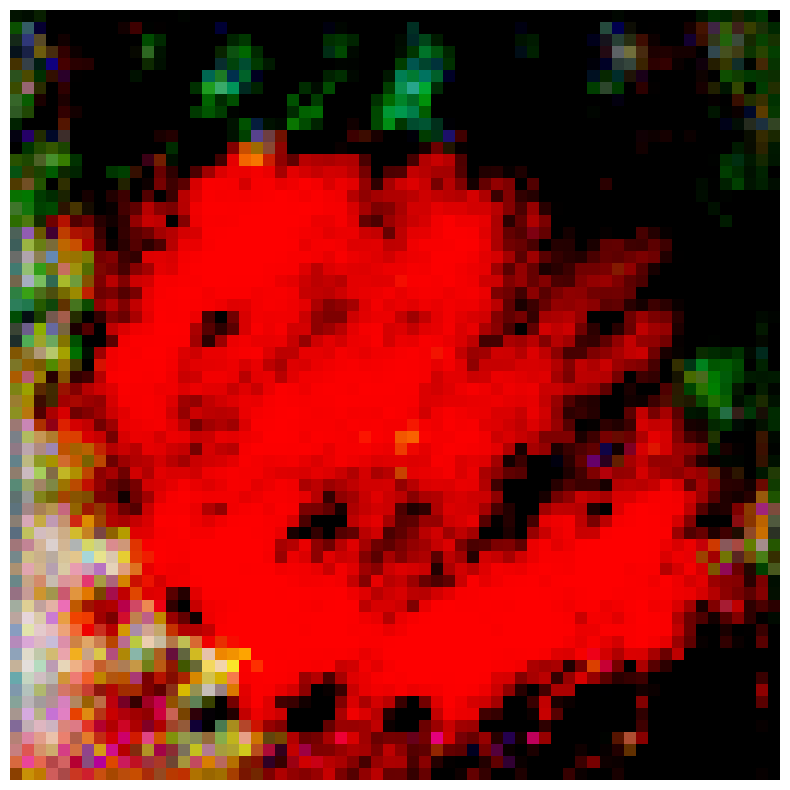

Epoch [147/200]  Loss D: 0.4306, Loss G: 7.0605


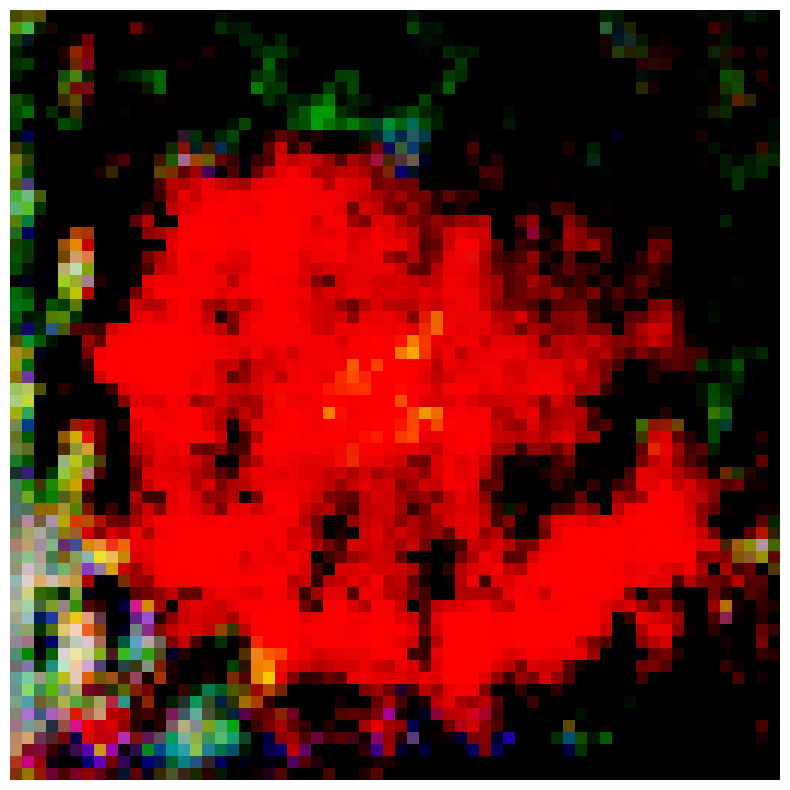

Epoch [148/200]  Loss D: 0.2984, Loss G: 4.5099


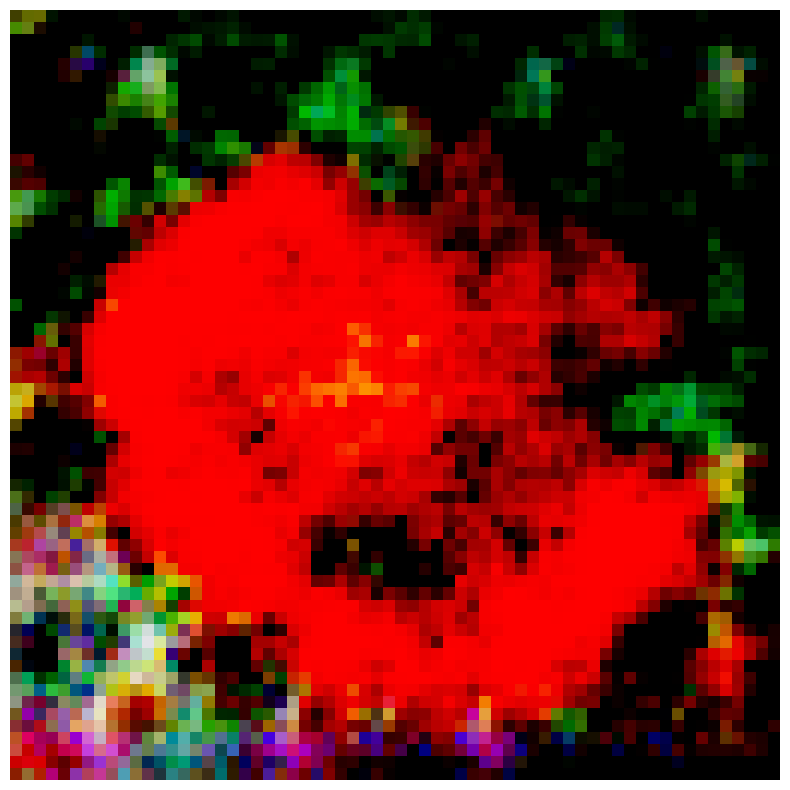

Epoch [149/200]  Loss D: 0.7161, Loss G: 9.6588


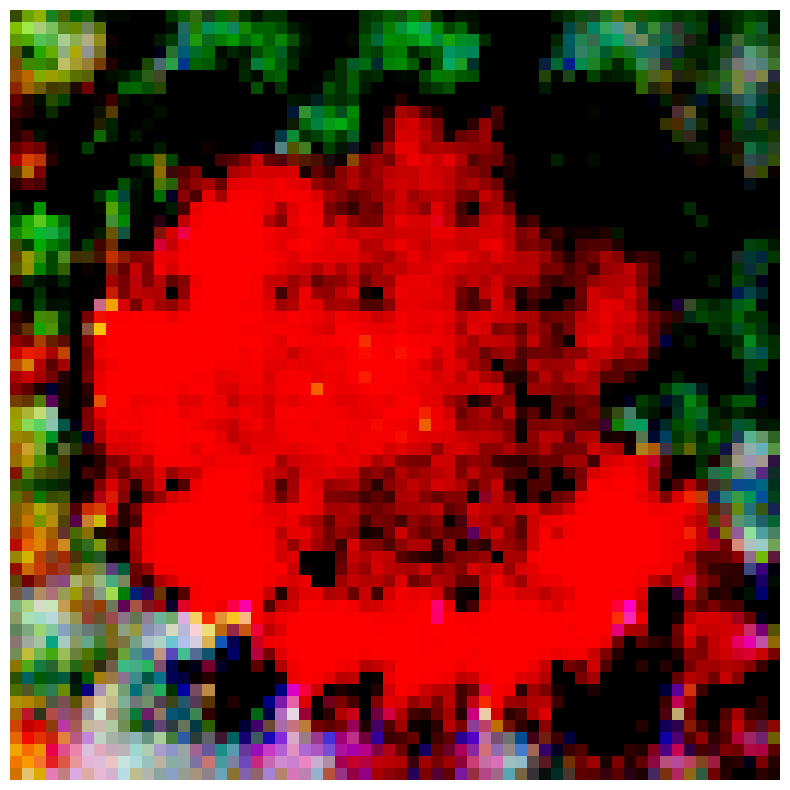

Epoch [150/200]  Loss D: 0.7225, Loss G: 1.4606


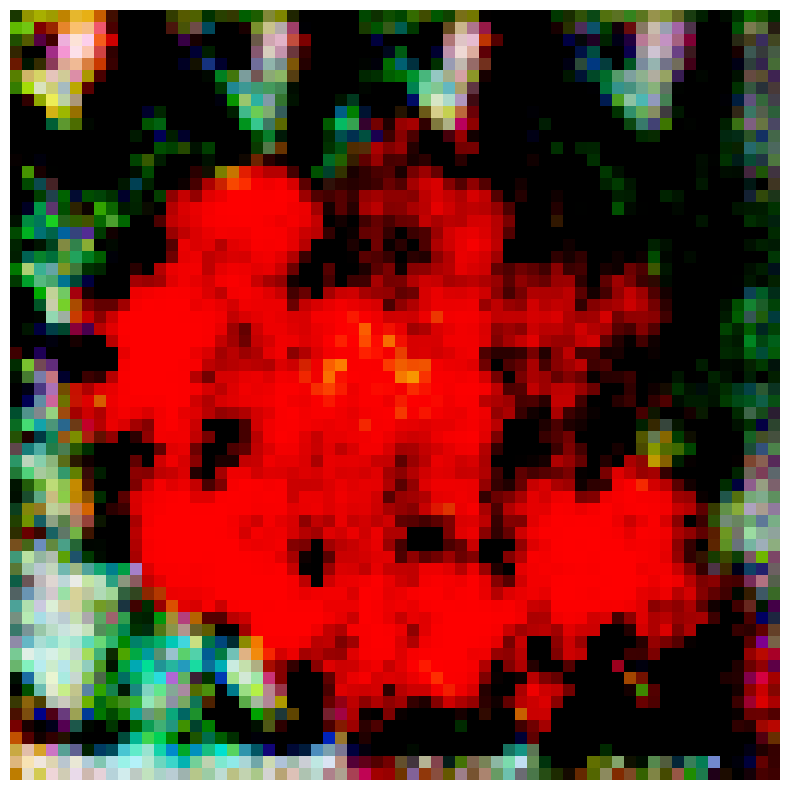

Epoch [151/200]  Loss D: 0.2351, Loss G: 3.6548


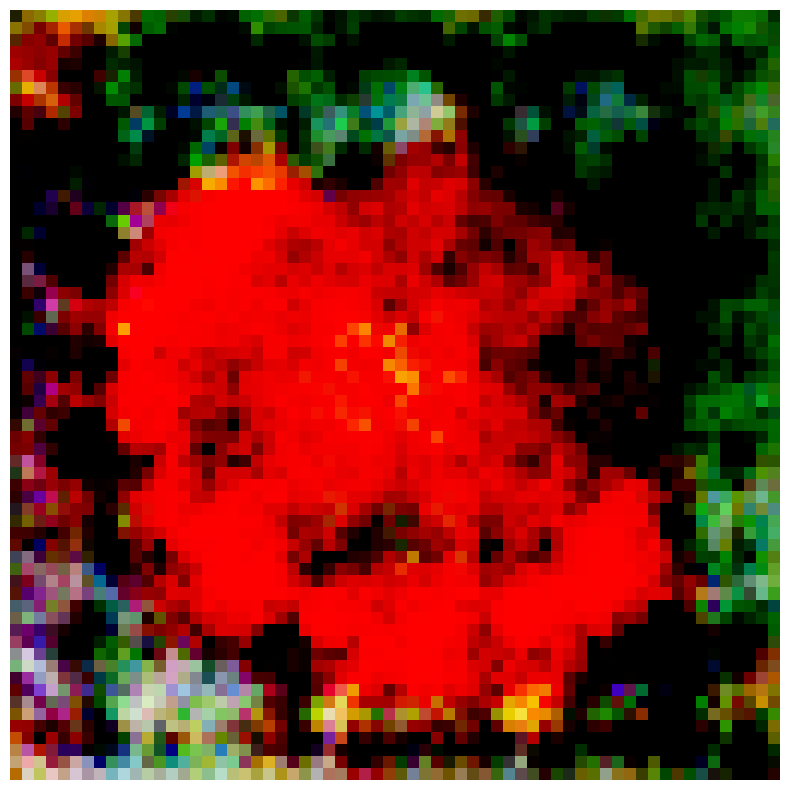

Epoch [152/200]  Loss D: 0.7833, Loss G: 1.7079


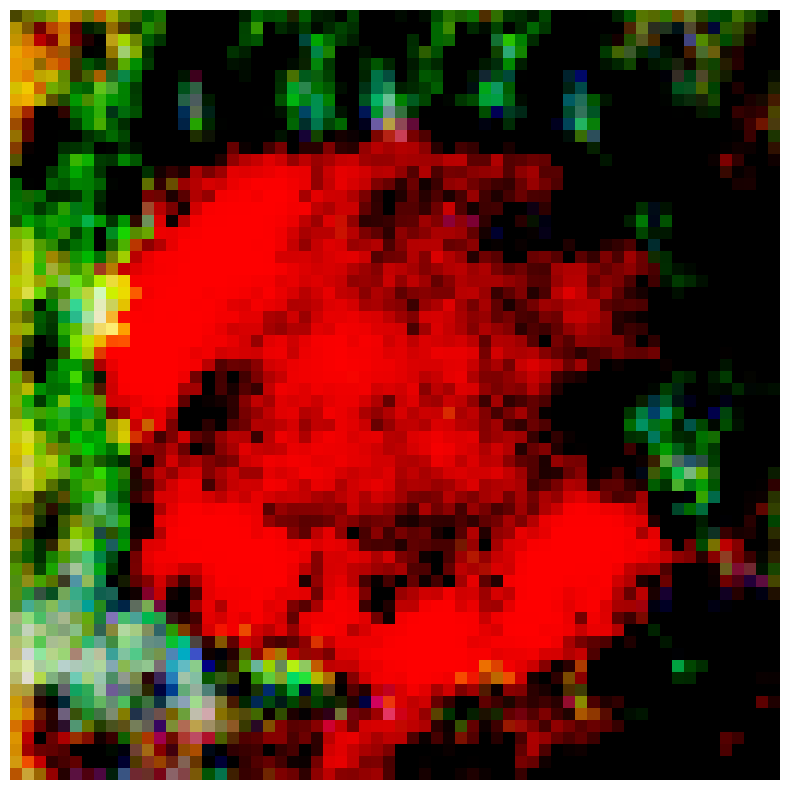

Epoch [153/200]  Loss D: 0.3435, Loss G: 3.1827


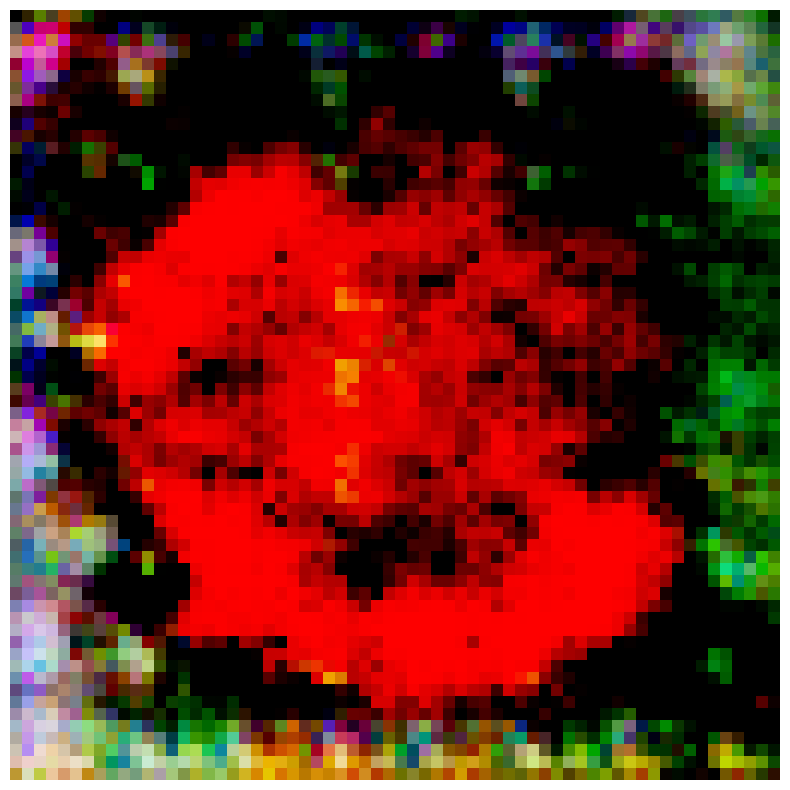

Epoch [154/200]  Loss D: 0.2202, Loss G: 4.3681


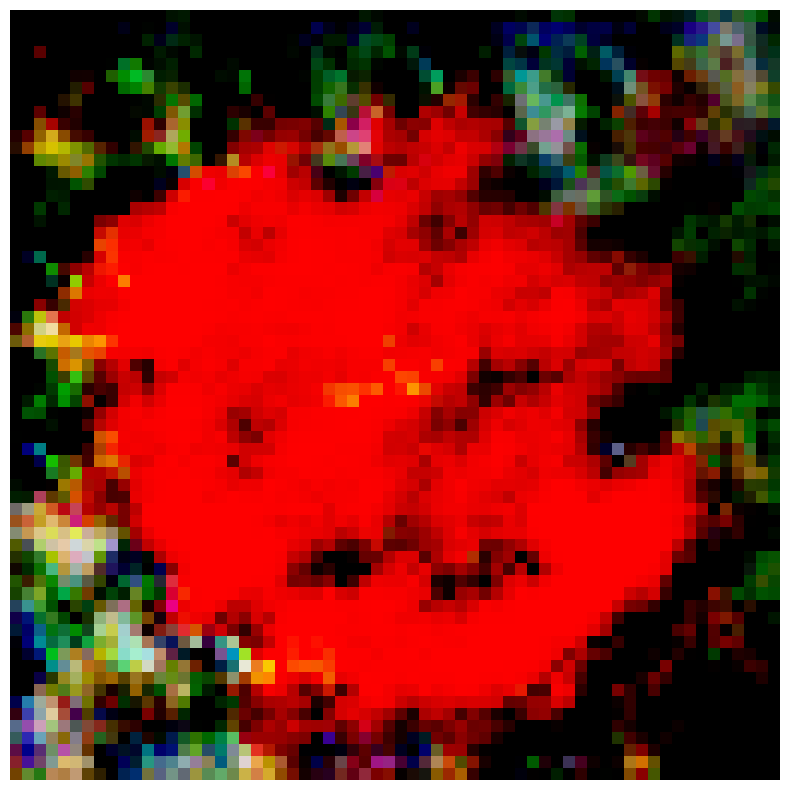

Epoch [155/200]  Loss D: 1.2882, Loss G: 2.2730


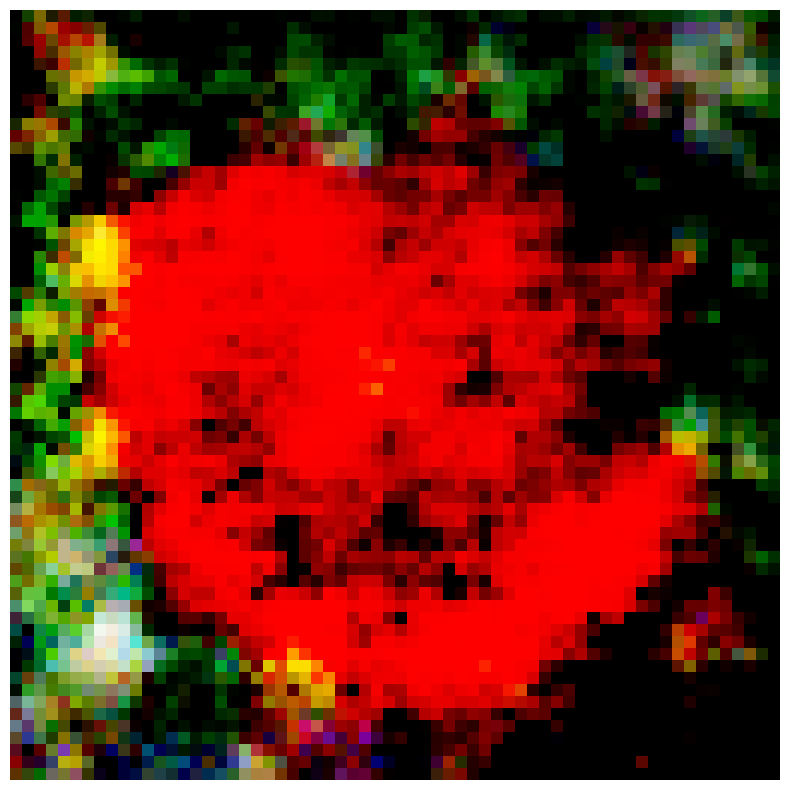

Epoch [156/200]  Loss D: 0.5823, Loss G: 6.2489


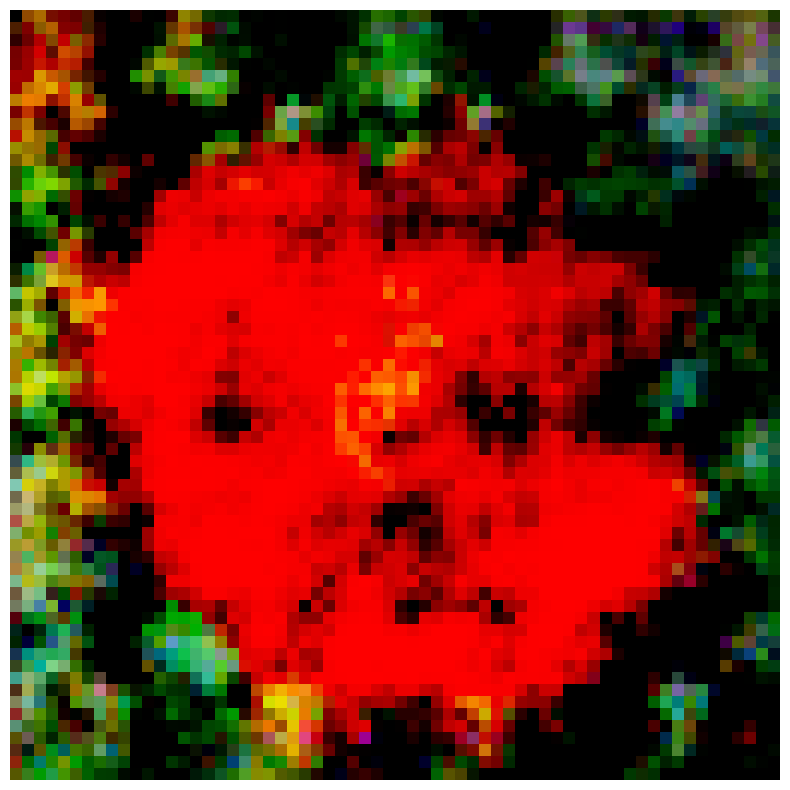

Epoch [157/200]  Loss D: 0.3025, Loss G: 4.7484


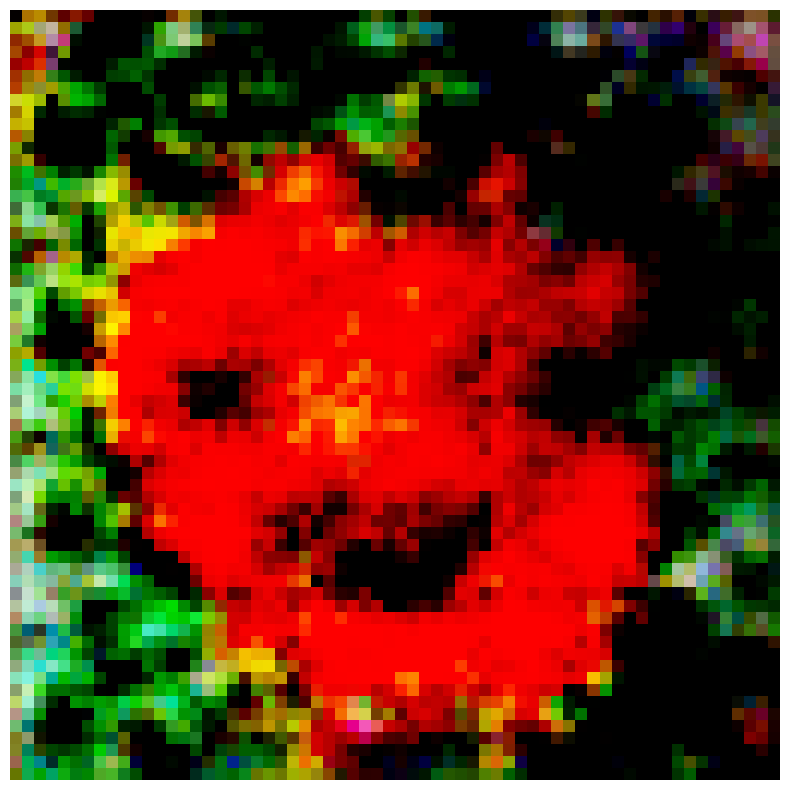

Epoch [158/200]  Loss D: 0.7730, Loss G: 9.9868


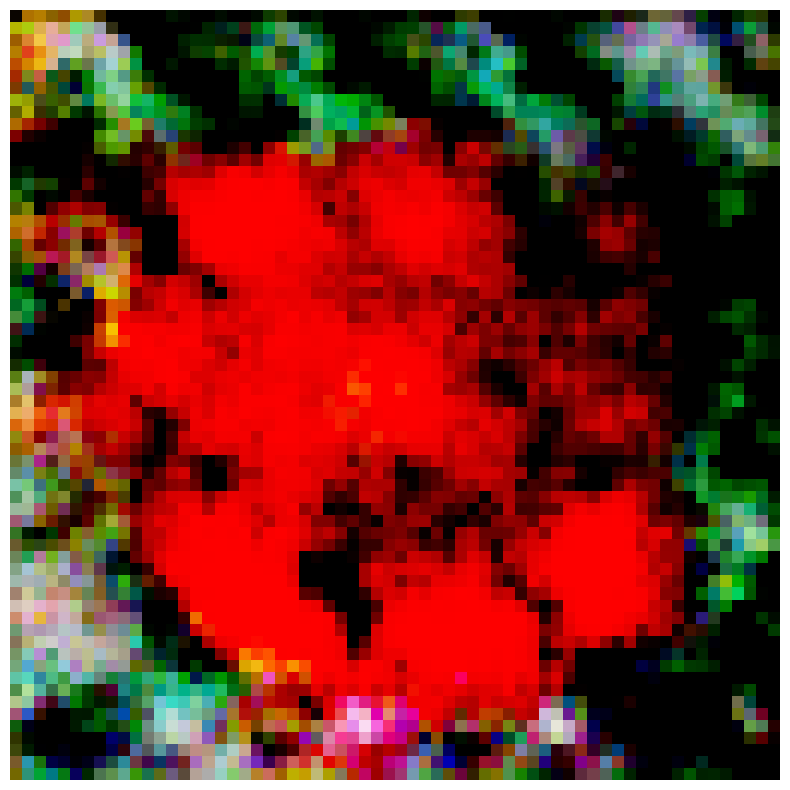

Epoch [159/200]  Loss D: 0.3074, Loss G: 2.9108


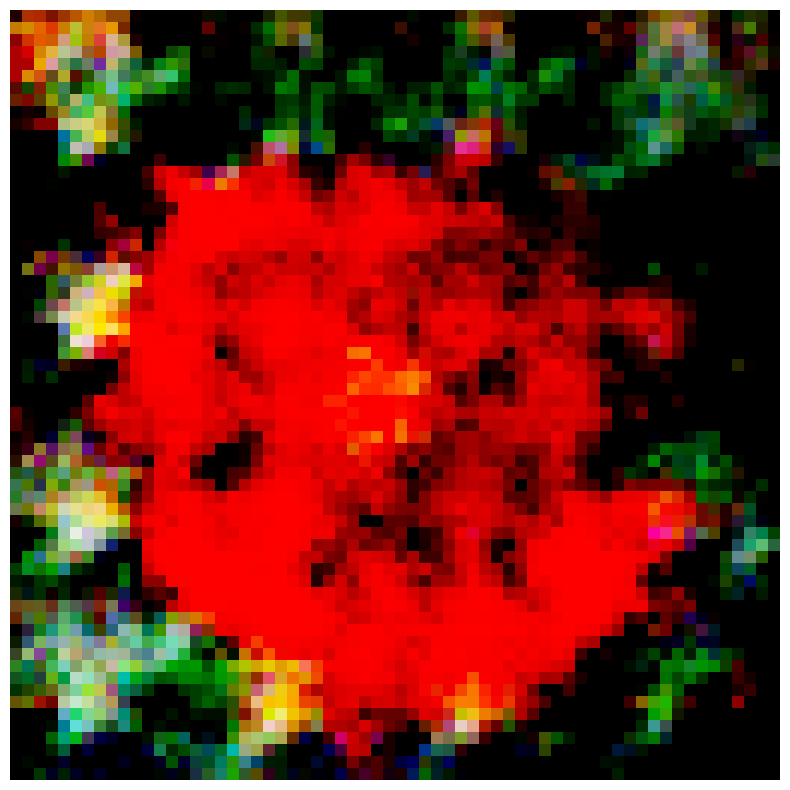

Epoch [160/200]  Loss D: 0.2512, Loss G: 4.6507


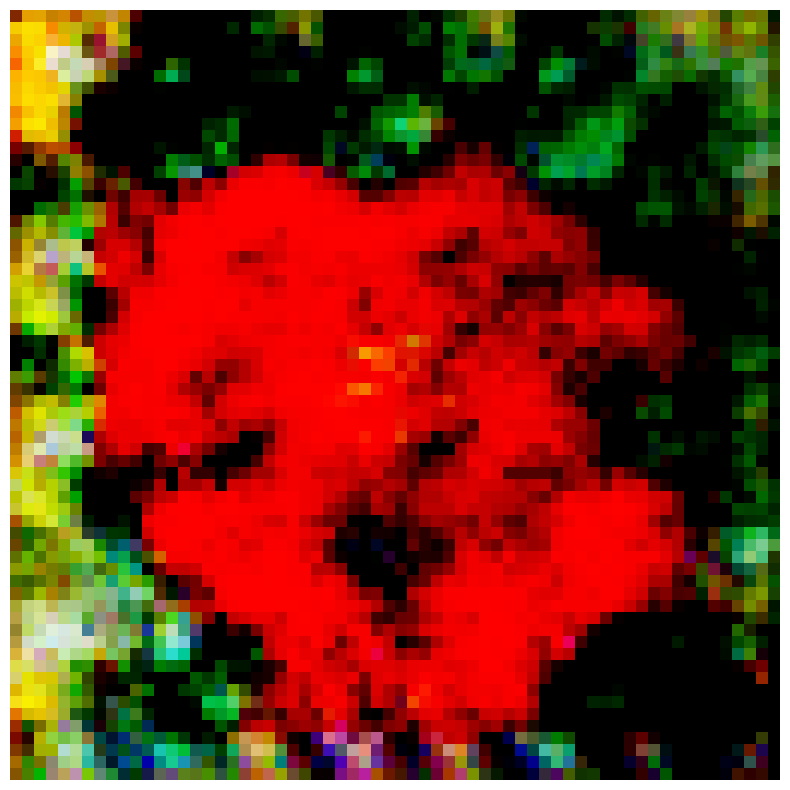

Epoch [161/200]  Loss D: 0.0965, Loss G: 4.1247


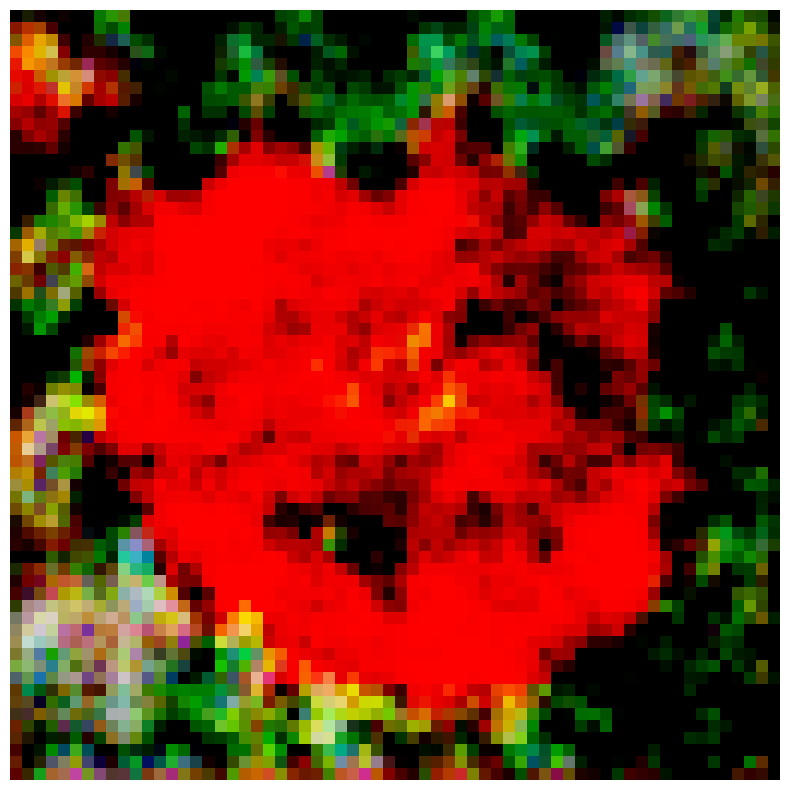

Epoch [162/200]  Loss D: 0.2554, Loss G: 5.4108


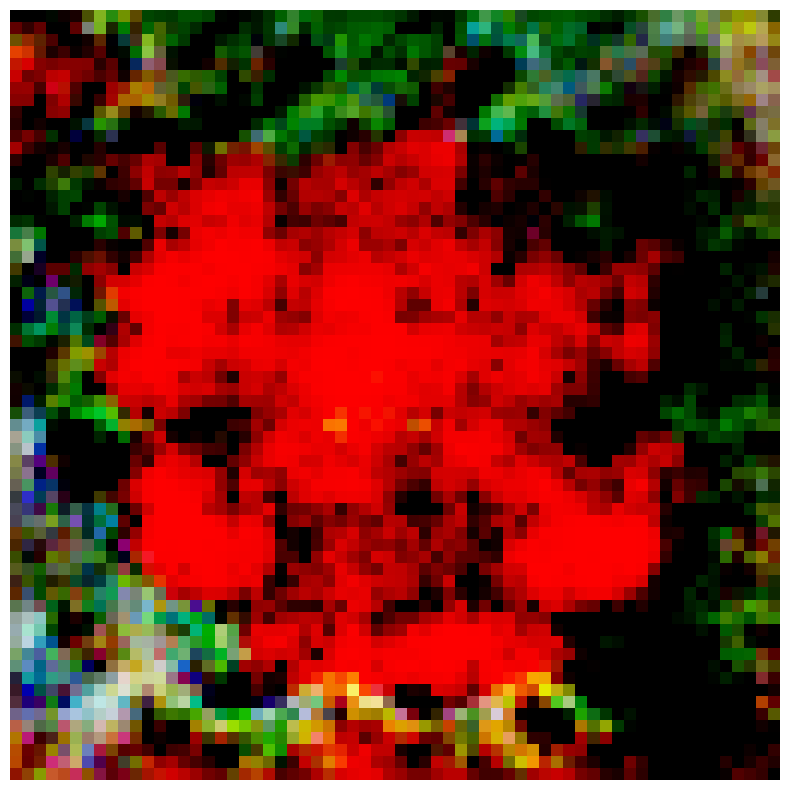

Epoch [163/200]  Loss D: 0.8348, Loss G: 2.0860


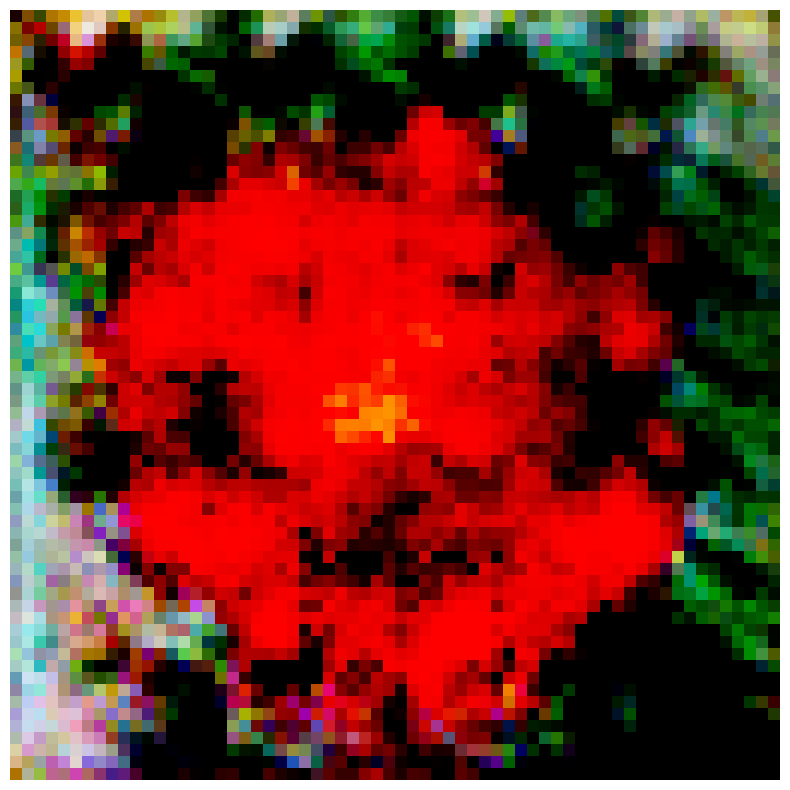

Epoch [164/200]  Loss D: 0.3708, Loss G: 3.9026


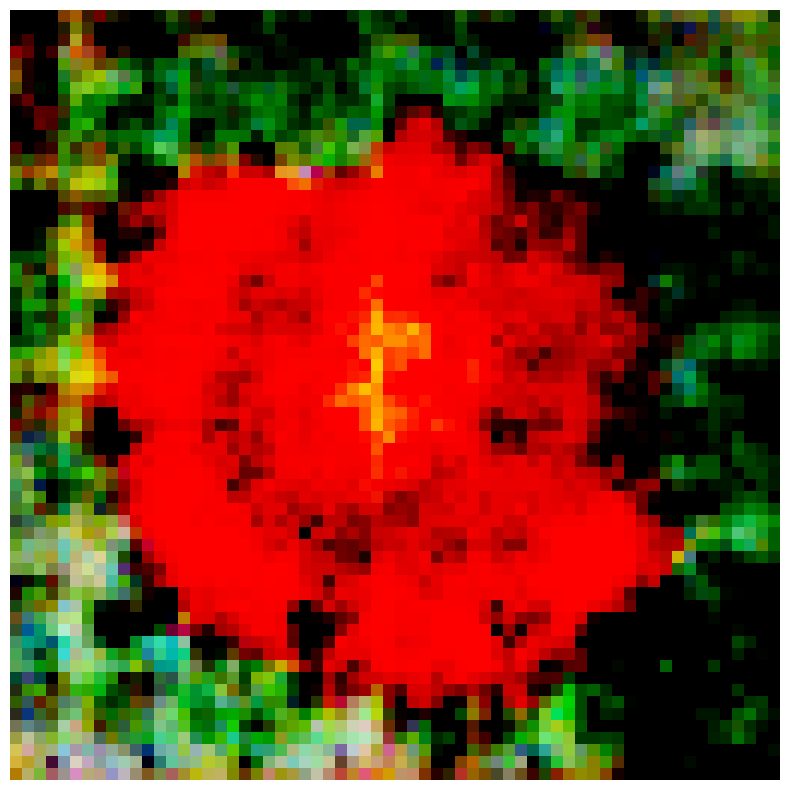

Epoch [165/200]  Loss D: 0.1683, Loss G: 4.4535


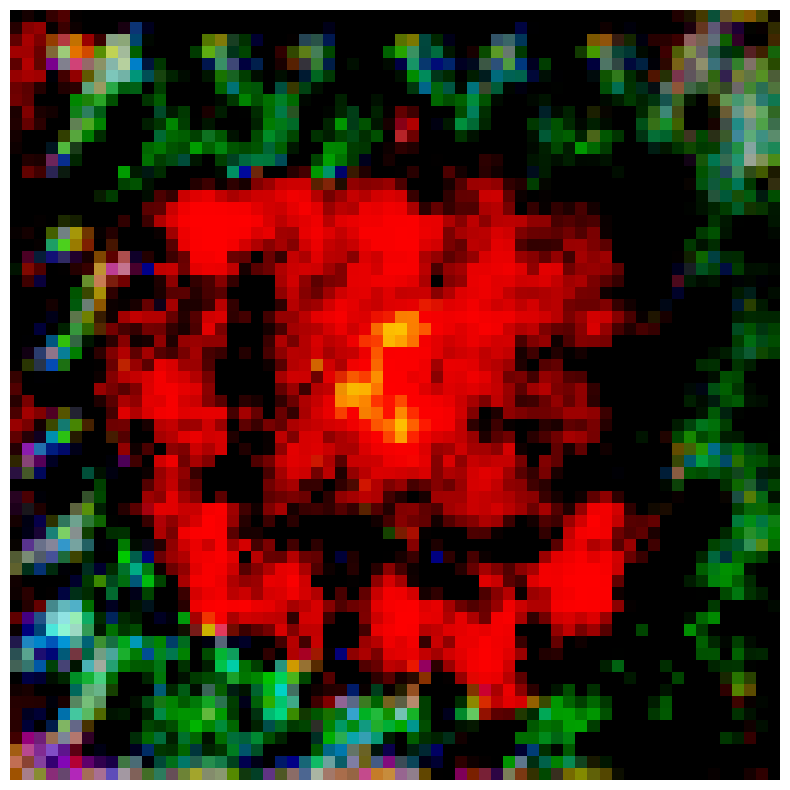

Epoch [166/200]  Loss D: 0.2788, Loss G: 3.5681


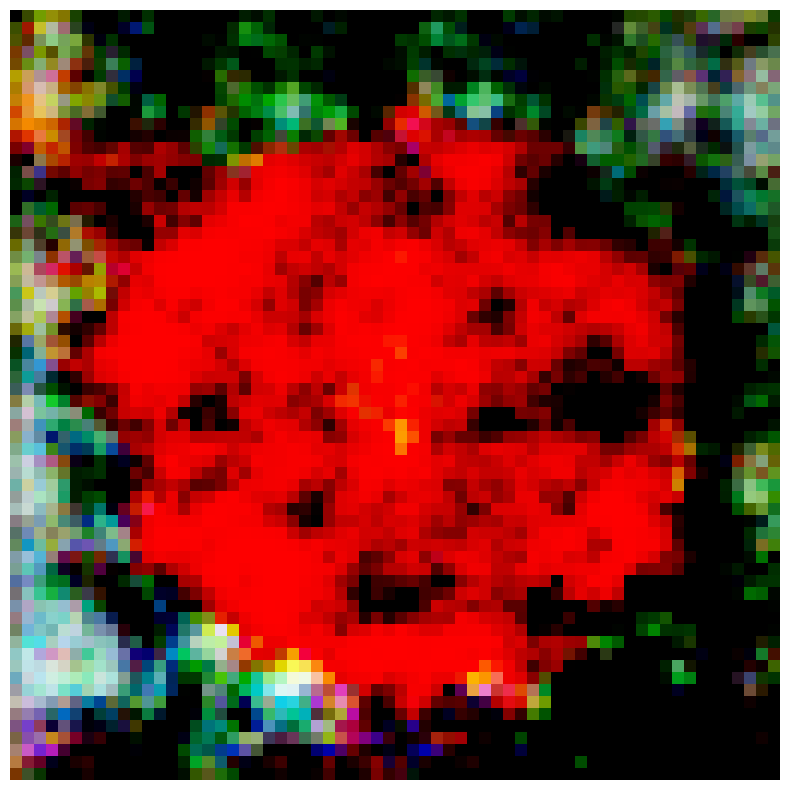

Epoch [167/200]  Loss D: 0.2877, Loss G: 4.2106


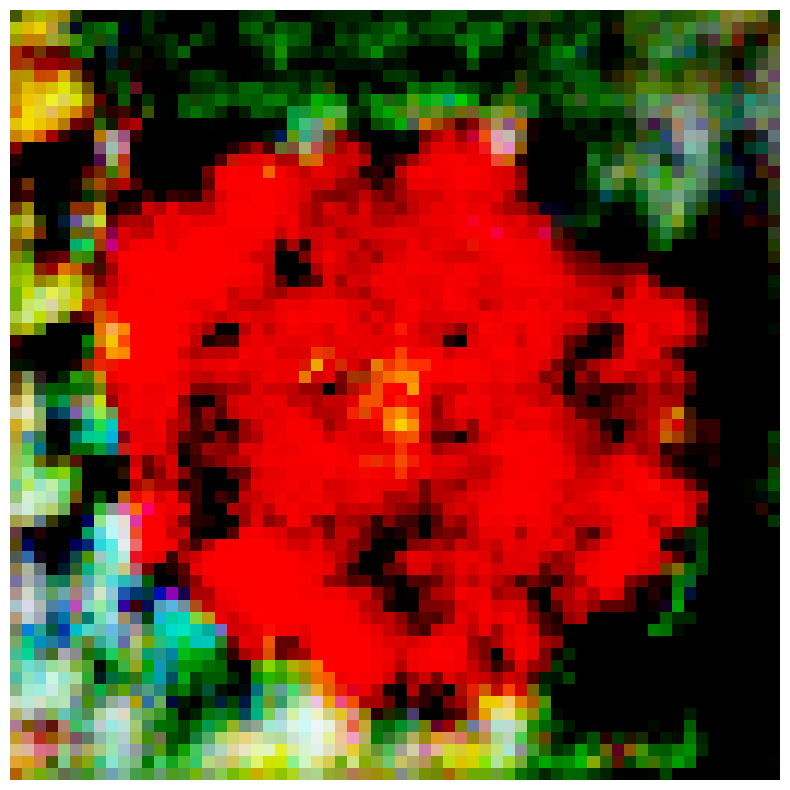

Epoch [168/200]  Loss D: 0.1951, Loss G: 3.9725


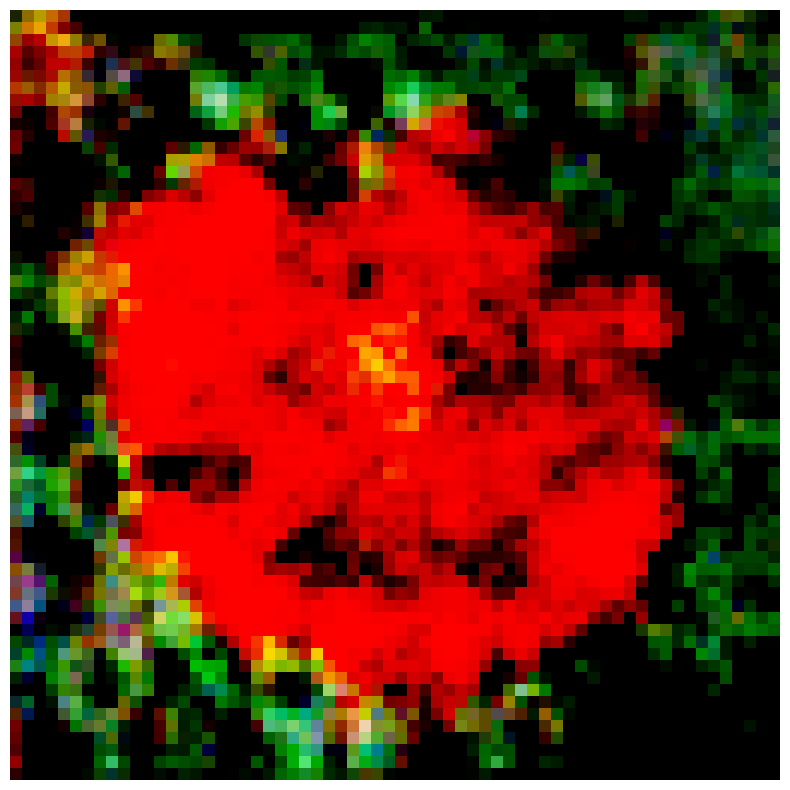

Epoch [169/200]  Loss D: 0.4986, Loss G: 5.6104


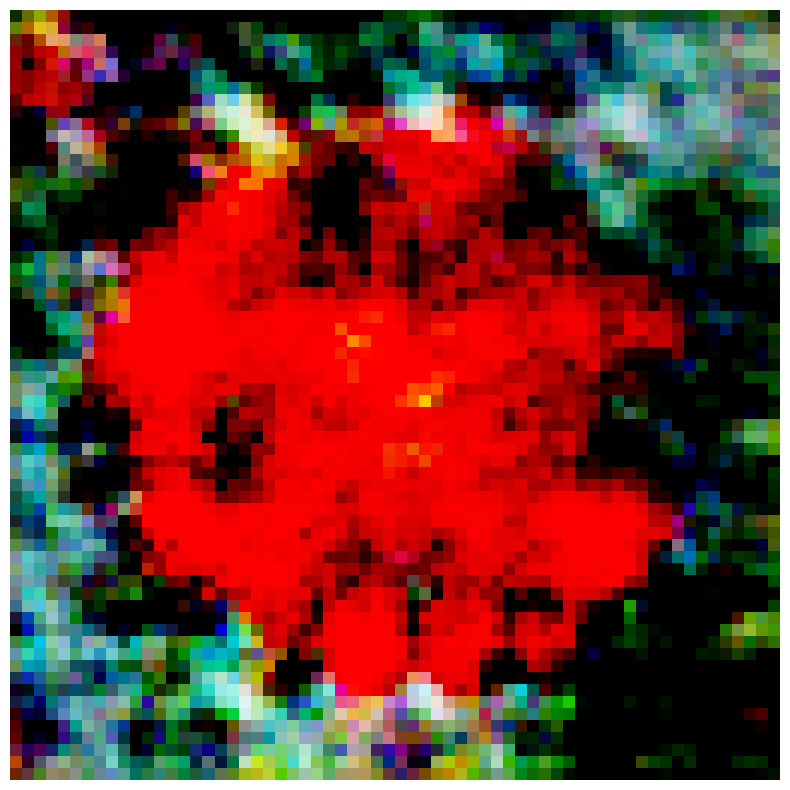

Epoch [170/200]  Loss D: 0.3186, Loss G: 2.9257


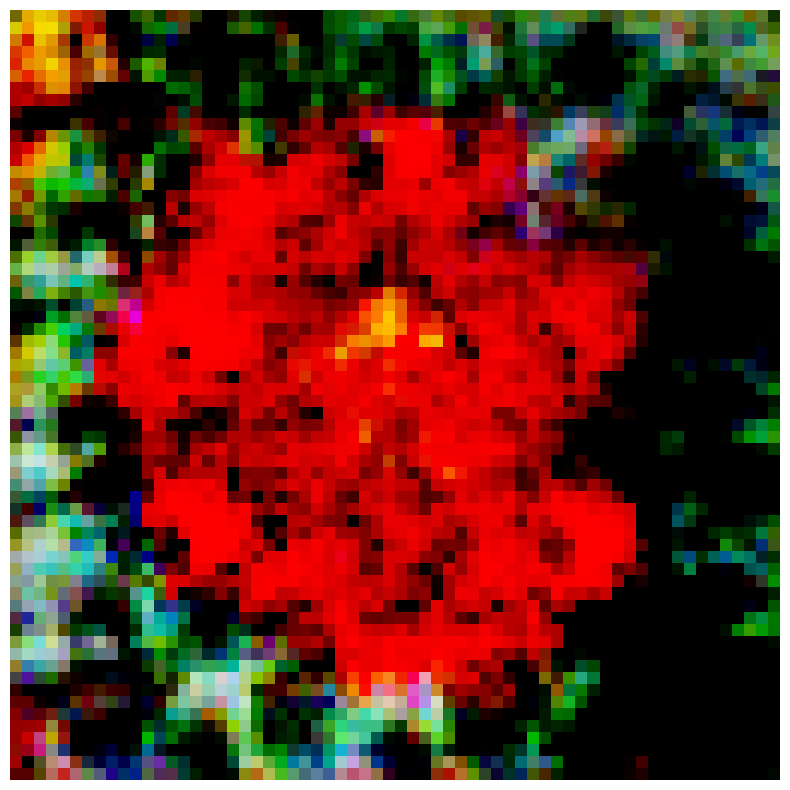

Epoch [171/200]  Loss D: 0.1676, Loss G: 4.0843


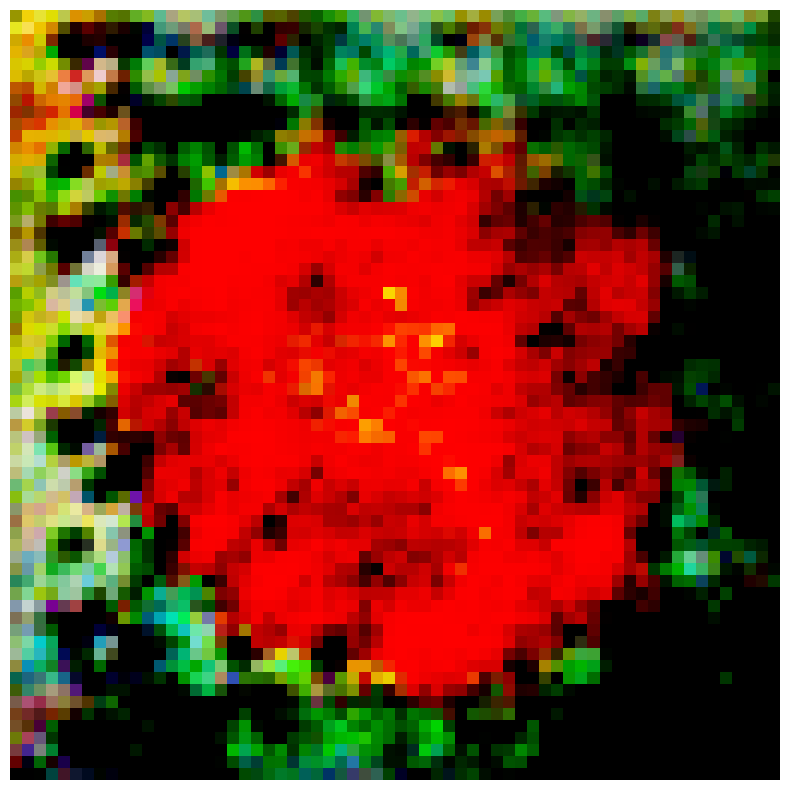

Epoch [172/200]  Loss D: 0.3381, Loss G: 7.2212


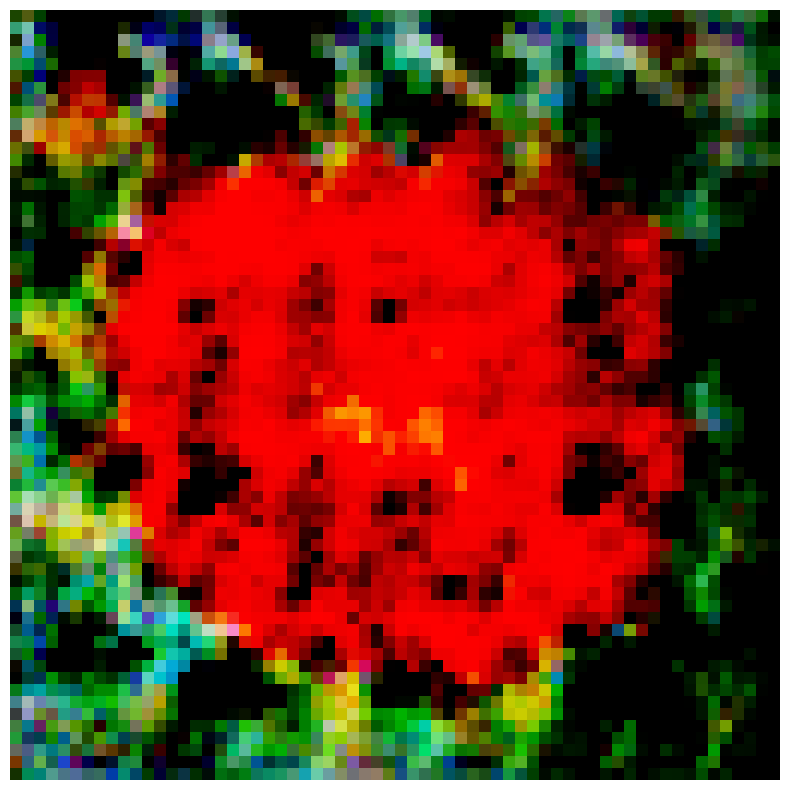

Epoch [173/200]  Loss D: 0.2528, Loss G: 4.5390


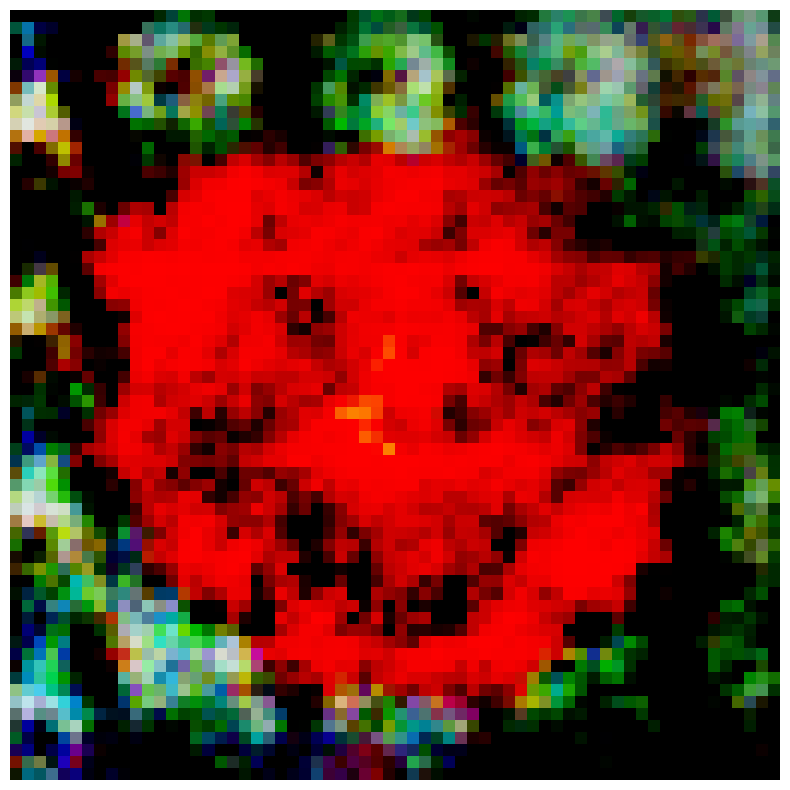

Epoch [174/200]  Loss D: 0.2570, Loss G: 3.6378


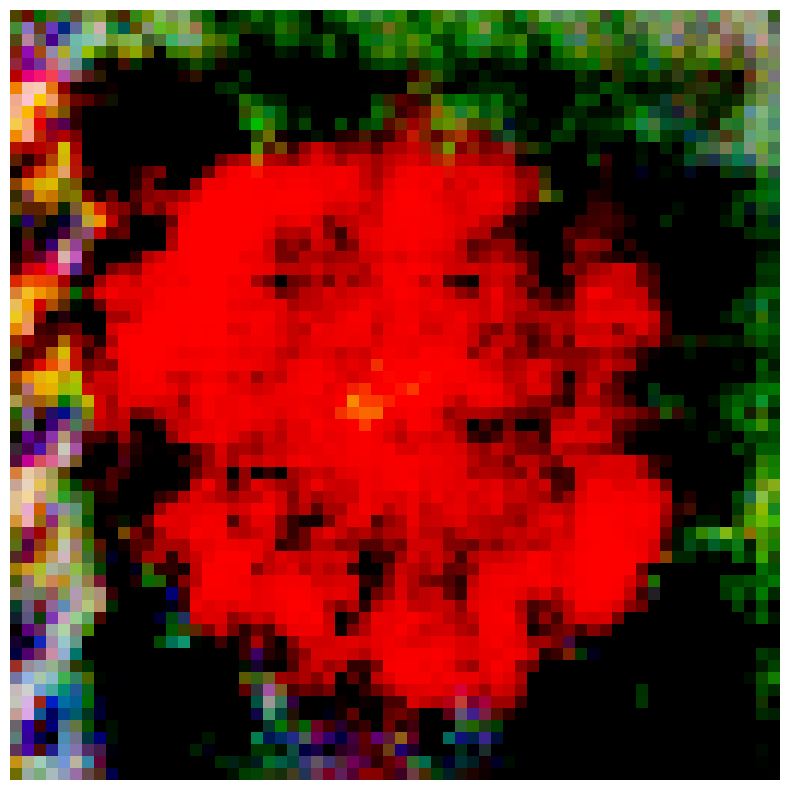

Epoch [175/200]  Loss D: 1.4730, Loss G: 1.7548


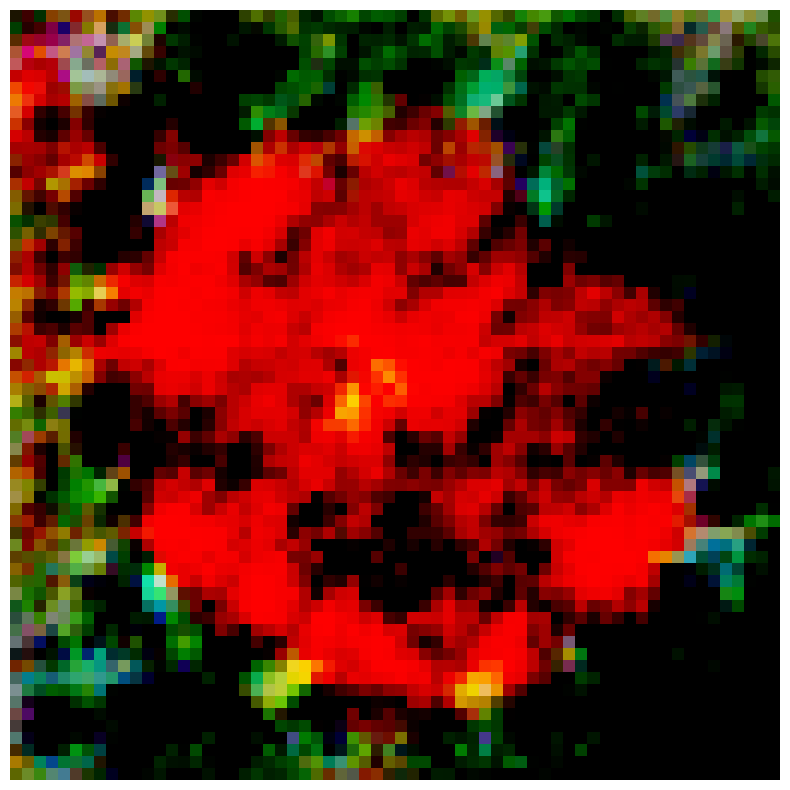

Epoch [176/200]  Loss D: 0.3325, Loss G: 4.1820


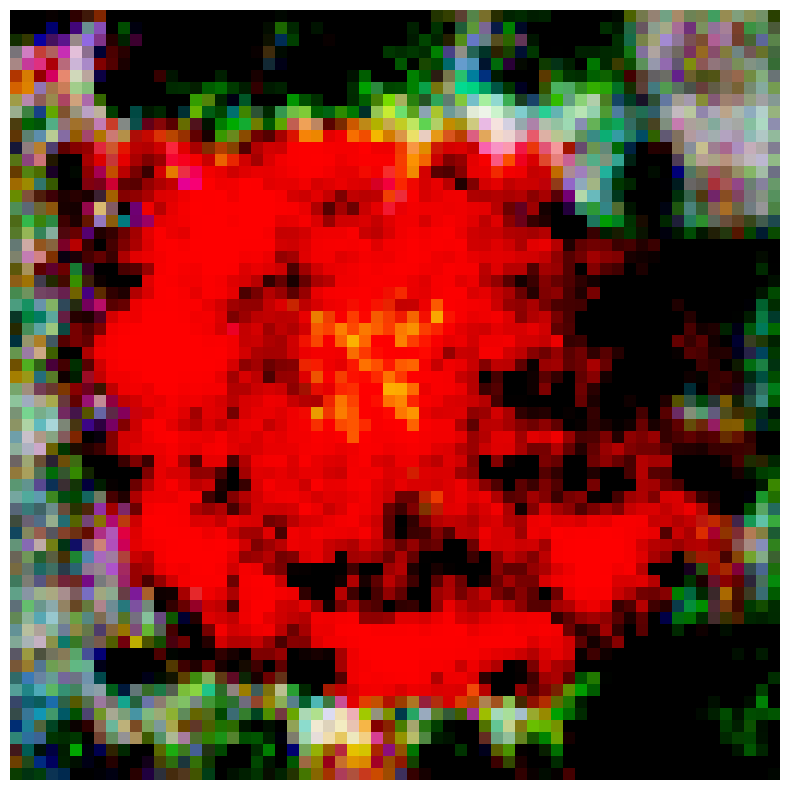

Epoch [177/200]  Loss D: 0.2232, Loss G: 4.7275


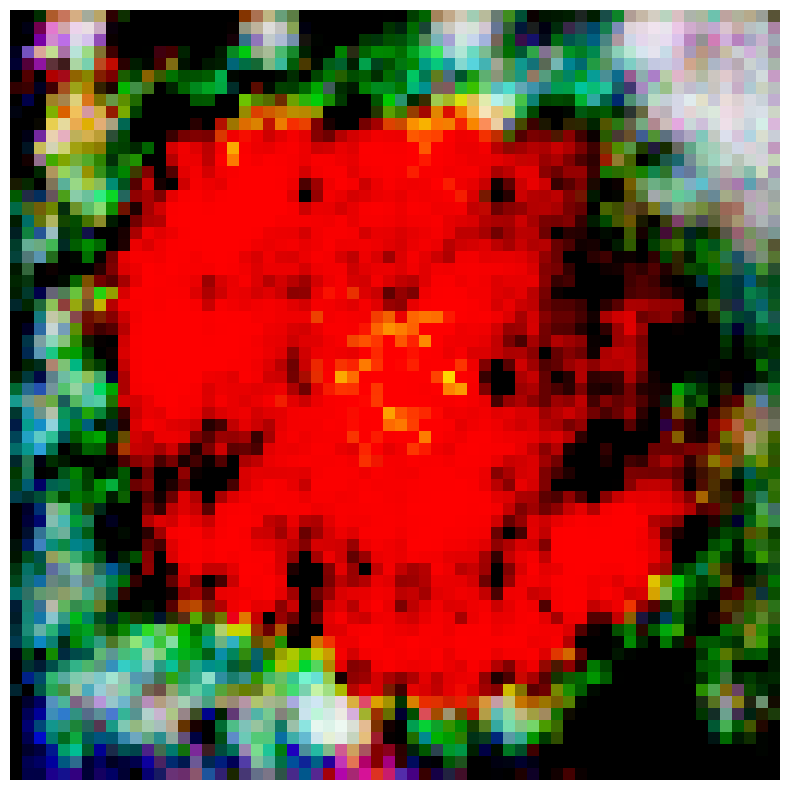

Epoch [178/200]  Loss D: 0.1423, Loss G: 5.4048


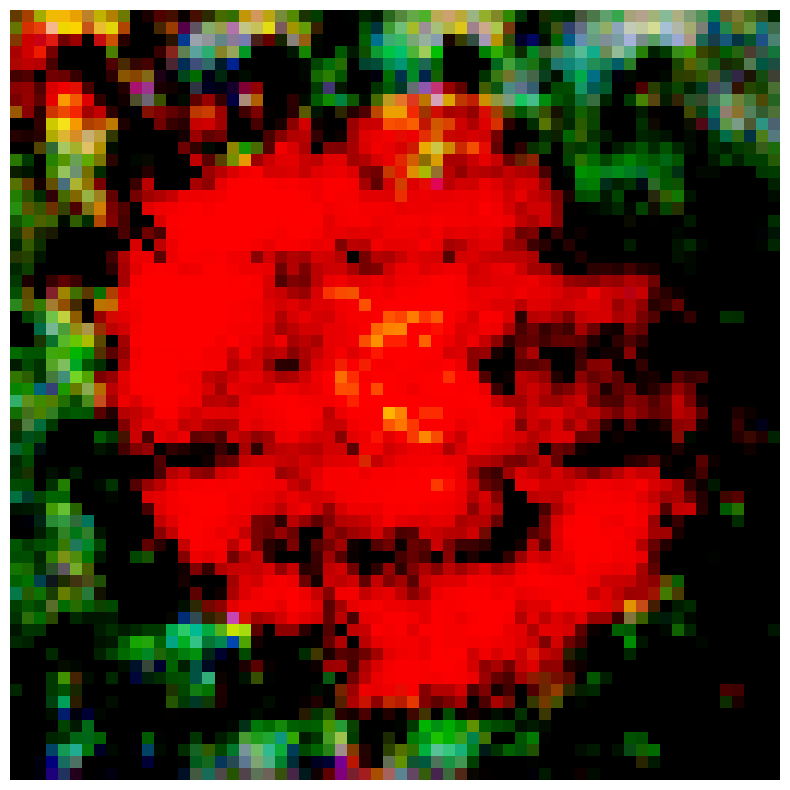

Epoch [179/200]  Loss D: 0.1932, Loss G: 4.9737


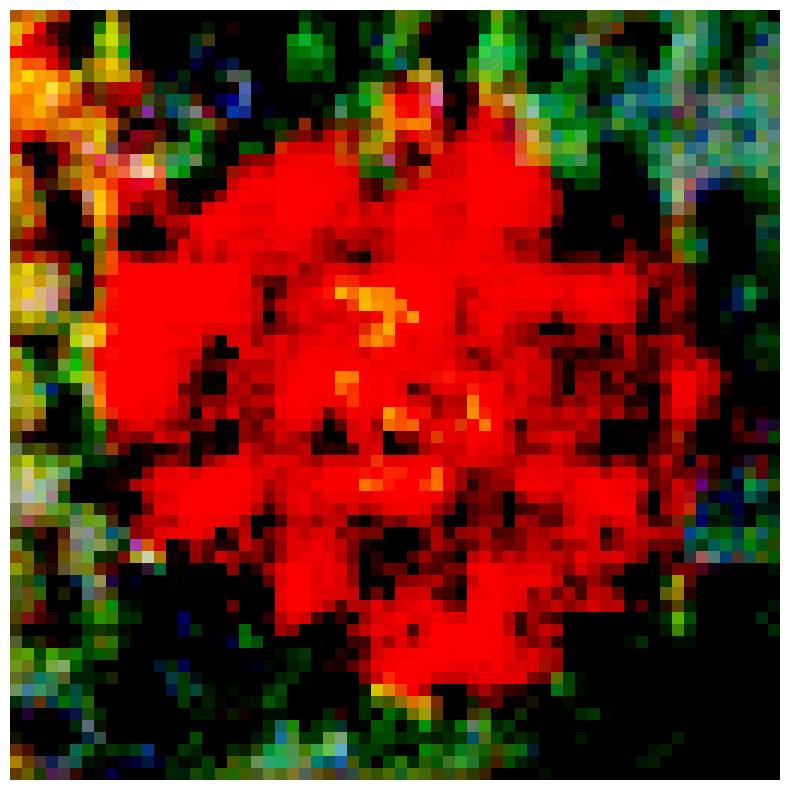

Epoch [180/200]  Loss D: 0.5689, Loss G: 3.1861


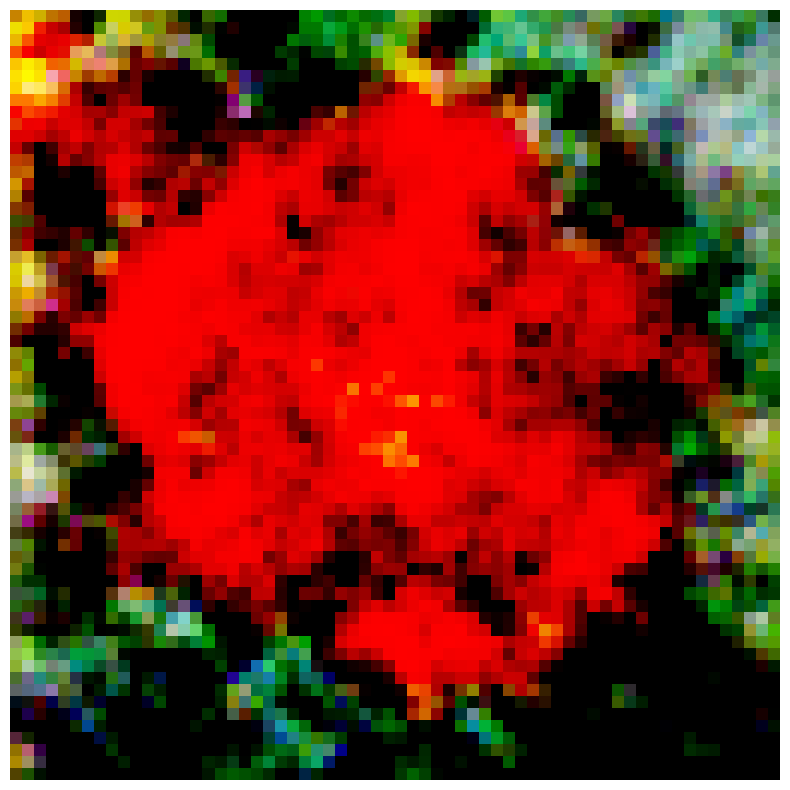

Epoch [181/200]  Loss D: 0.2883, Loss G: 2.6398


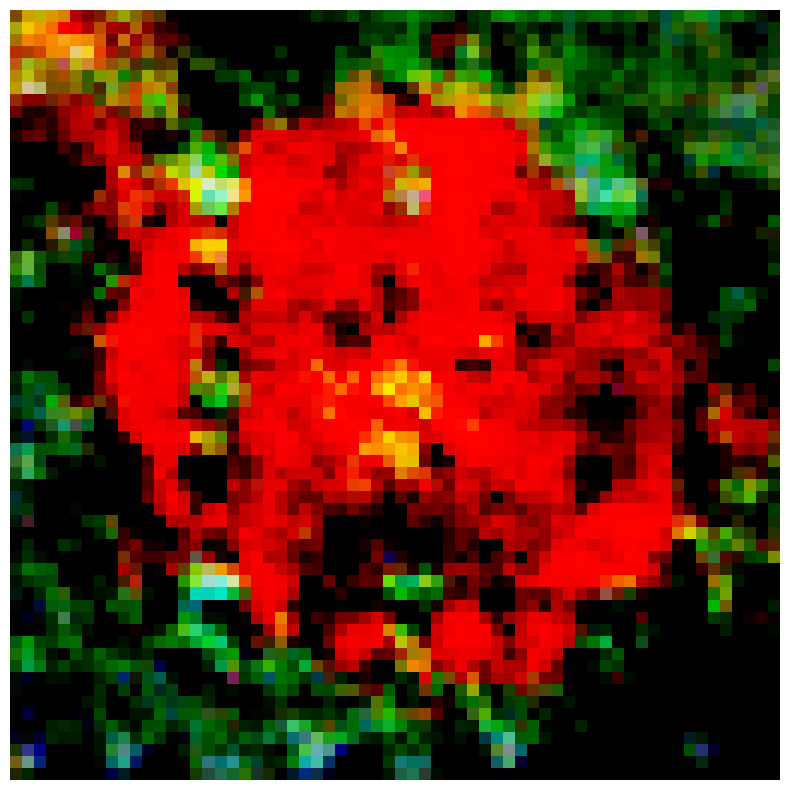

Epoch [182/200]  Loss D: 0.4227, Loss G: 5.3953


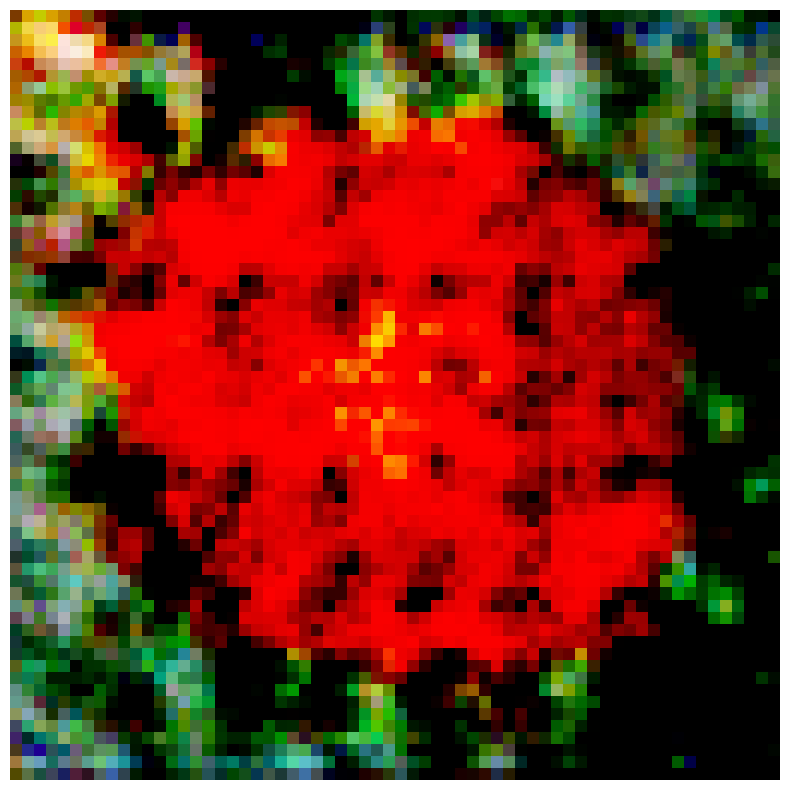

Epoch [183/200]  Loss D: 0.2005, Loss G: 2.8518


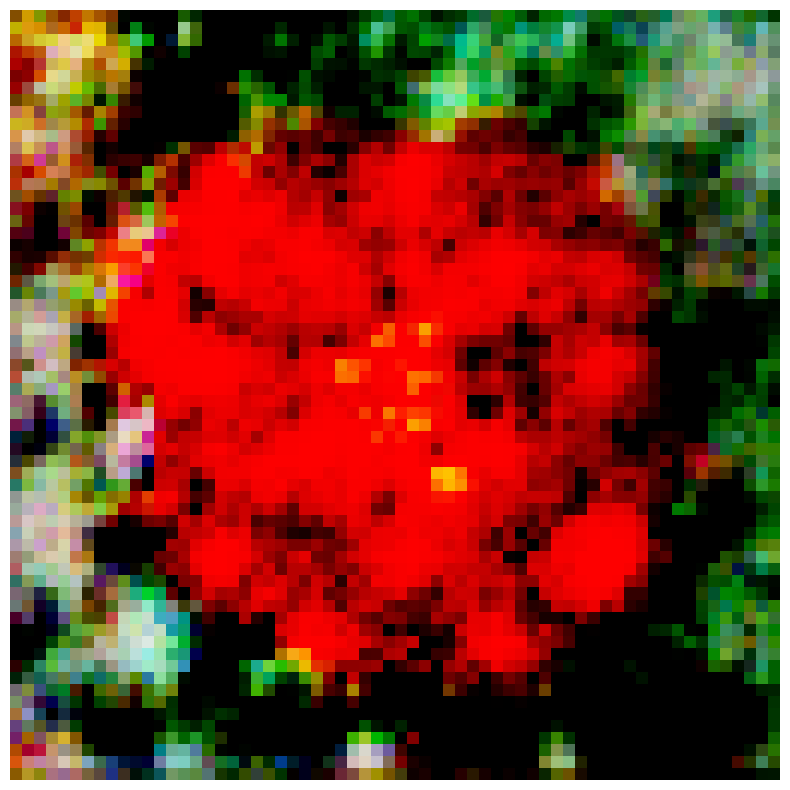

Epoch [184/200]  Loss D: 0.3013, Loss G: 4.5348


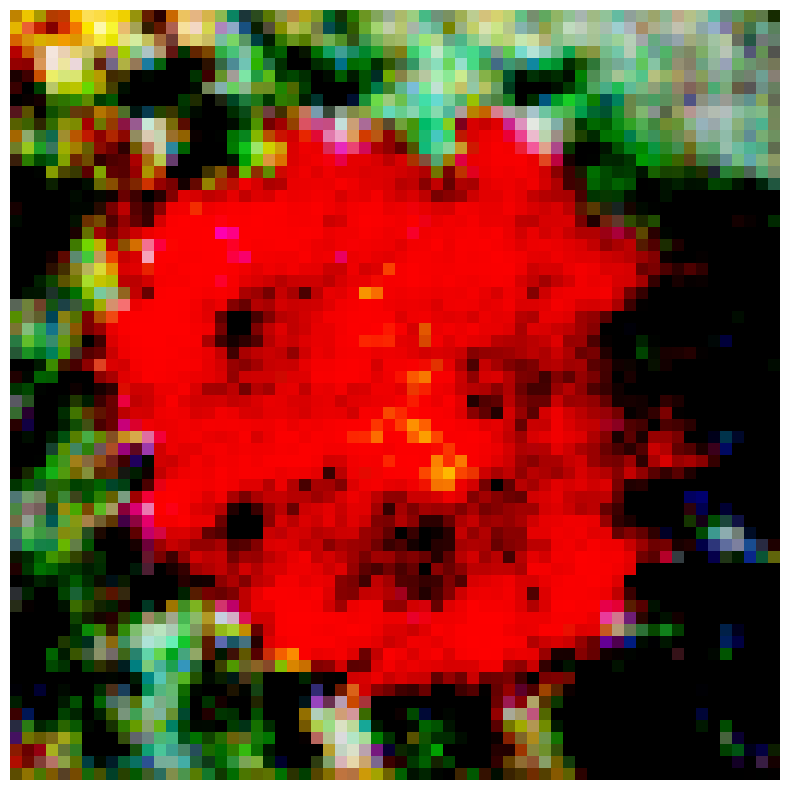

Epoch [185/200]  Loss D: 0.5440, Loss G: 7.8035


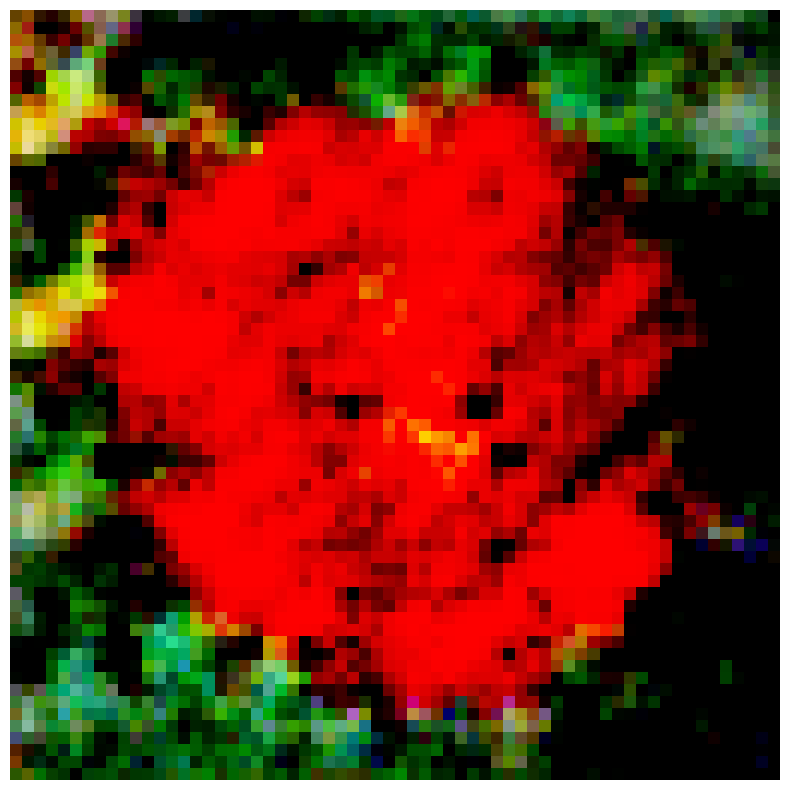

Epoch [186/200]  Loss D: 0.3891, Loss G: 6.9403


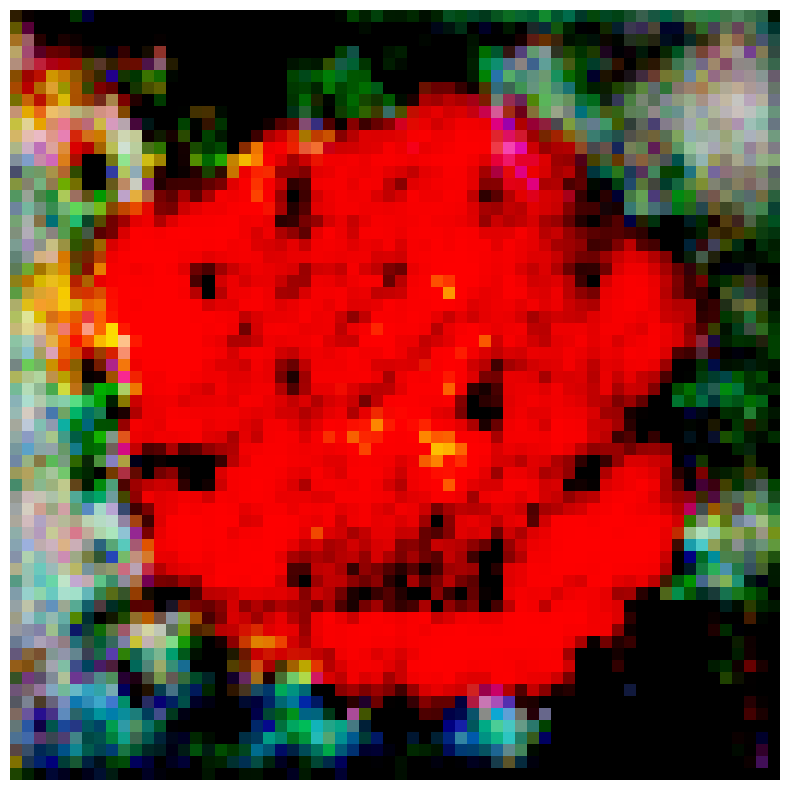

Epoch [187/200]  Loss D: 0.3886, Loss G: 3.9626


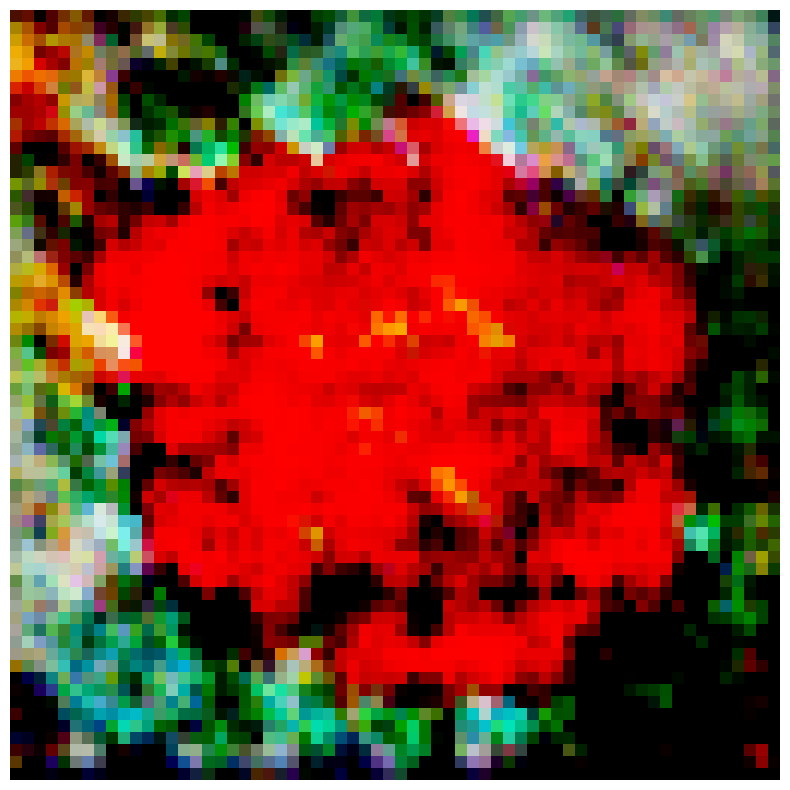

Epoch [188/200]  Loss D: 0.6954, Loss G: 2.5155


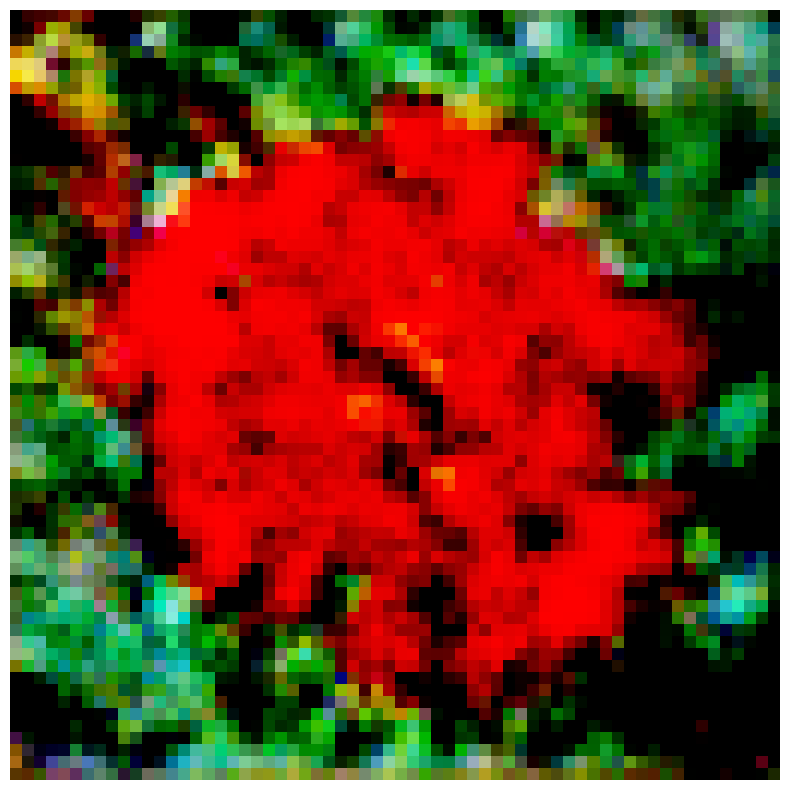

Epoch [189/200]  Loss D: 0.3622, Loss G: 4.5195


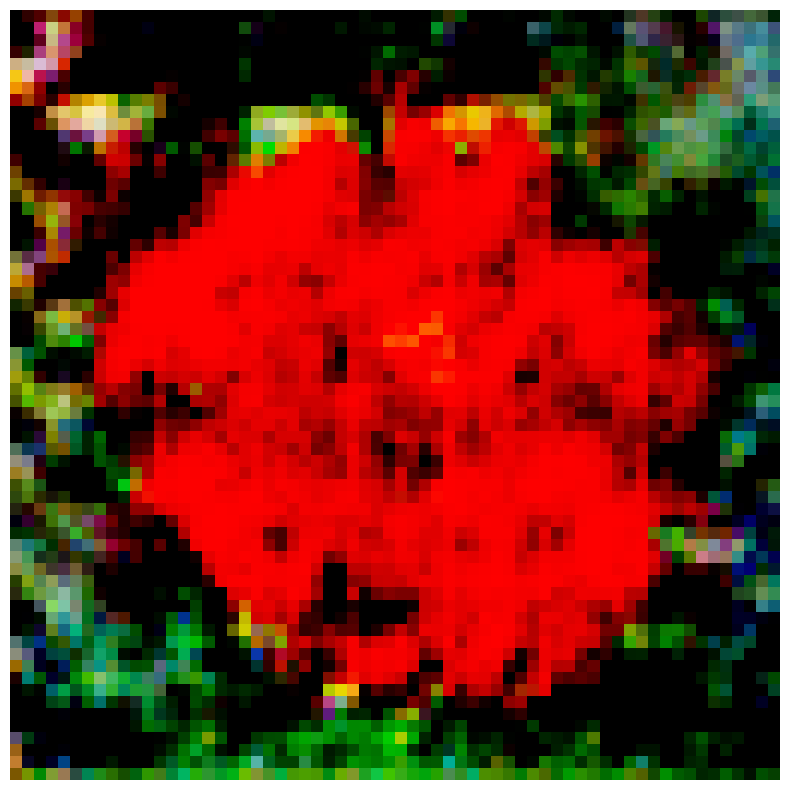

Epoch [190/200]  Loss D: 0.4526, Loss G: 1.3423


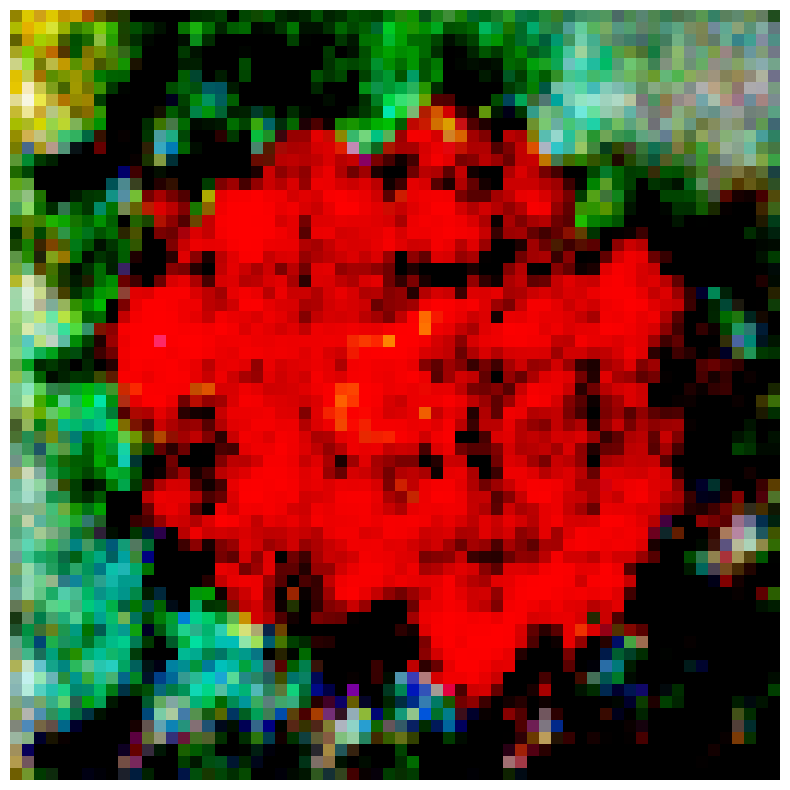

Epoch [191/200]  Loss D: 0.5206, Loss G: 3.5042


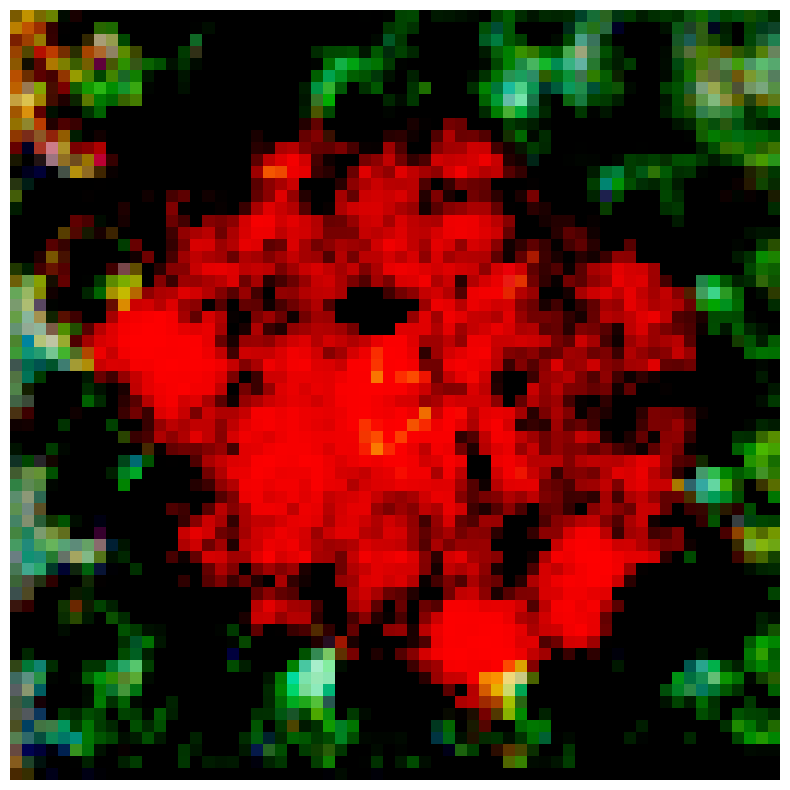

Epoch [192/200]  Loss D: 0.2761, Loss G: 5.9018


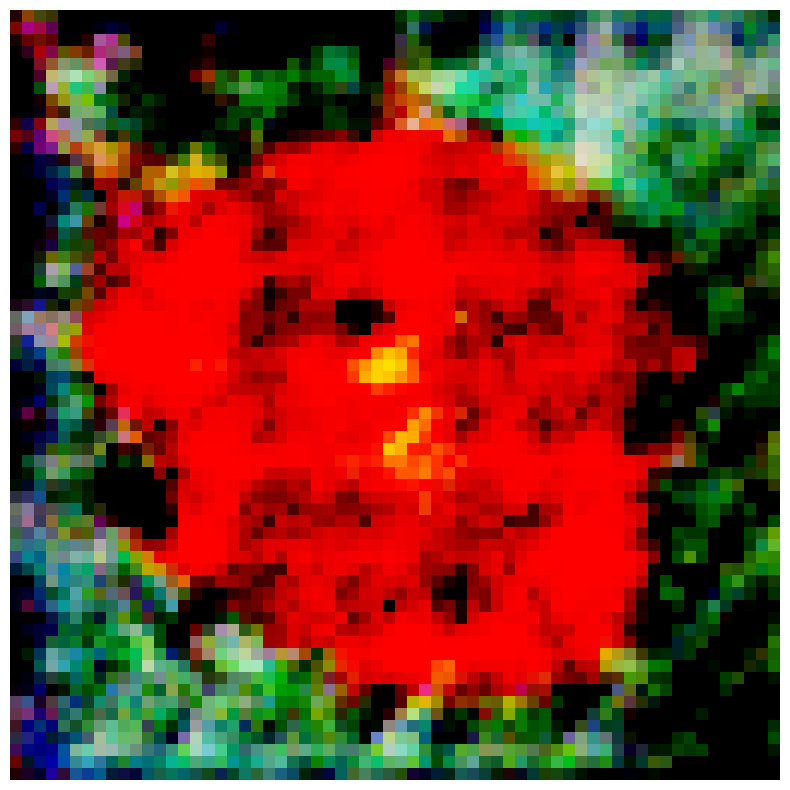

Epoch [193/200]  Loss D: 0.4850, Loss G: 6.4996


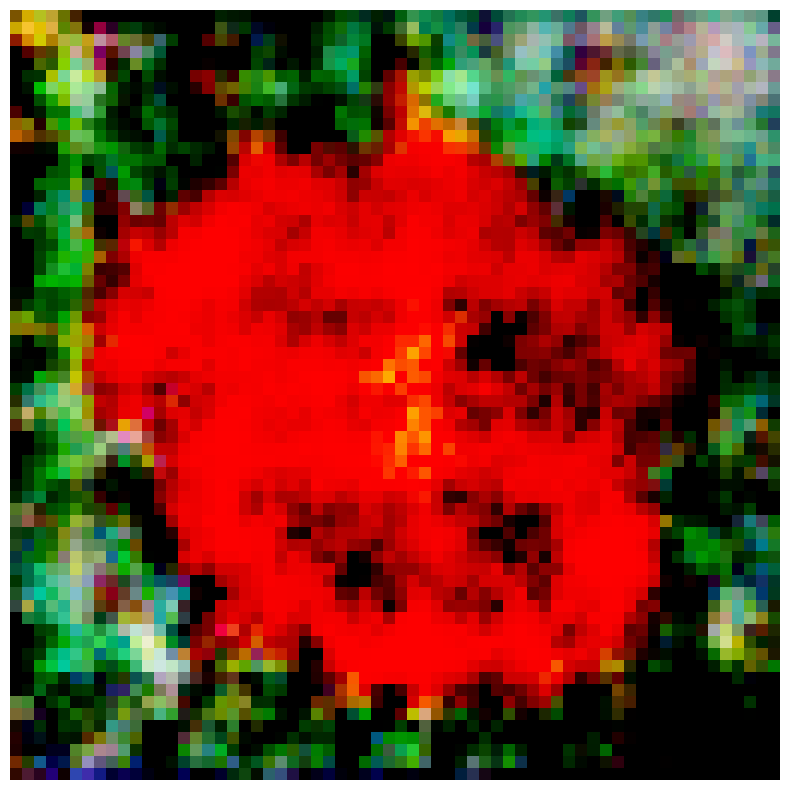

Epoch [194/200]  Loss D: 0.2401, Loss G: 4.0534


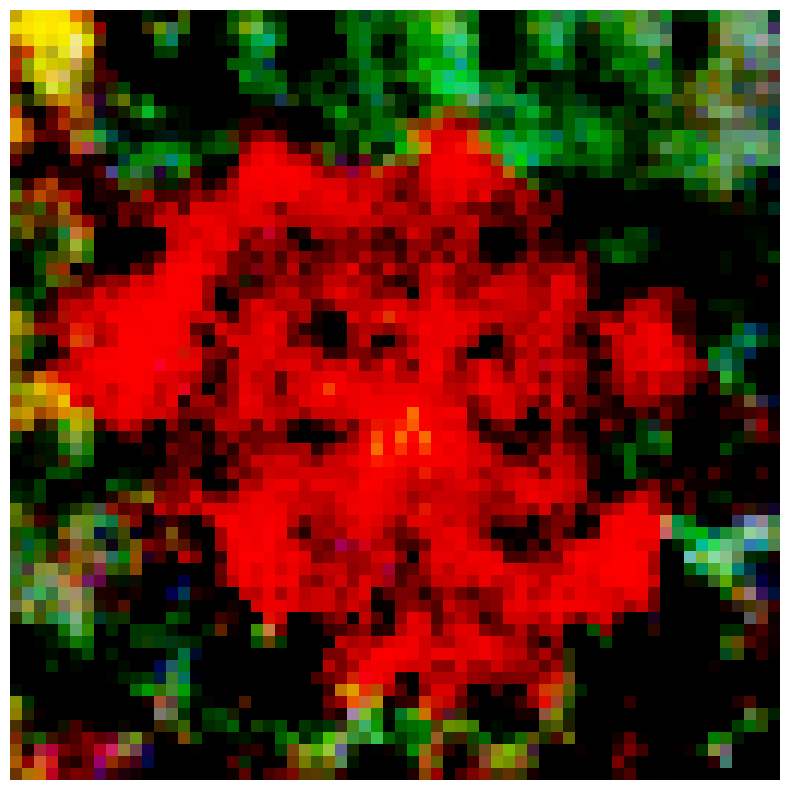

Epoch [195/200]  Loss D: 0.1643, Loss G: 3.2480


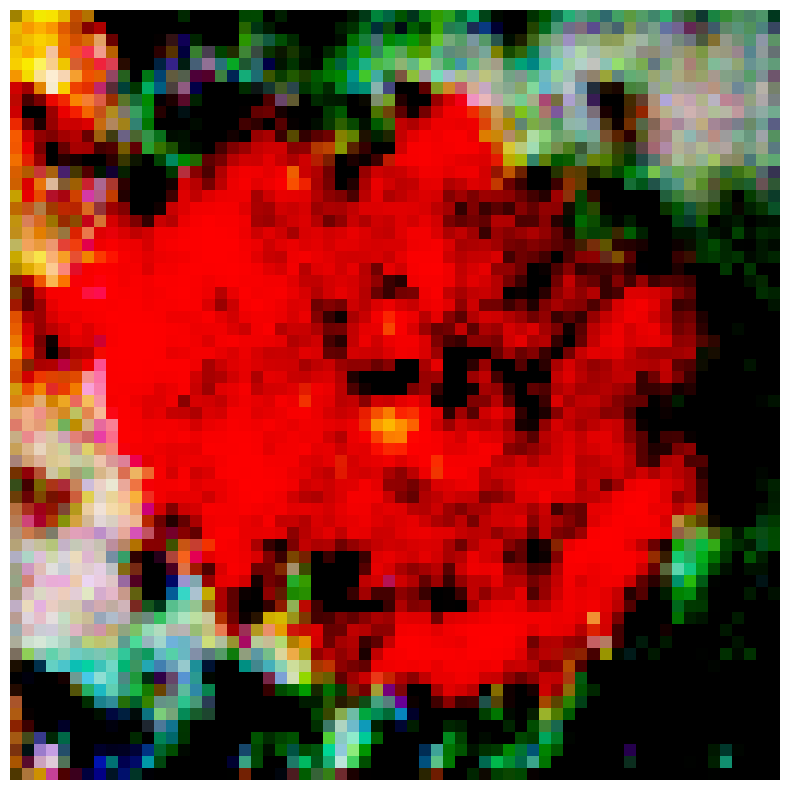

Epoch [196/200]  Loss D: 1.5273, Loss G: 0.7881


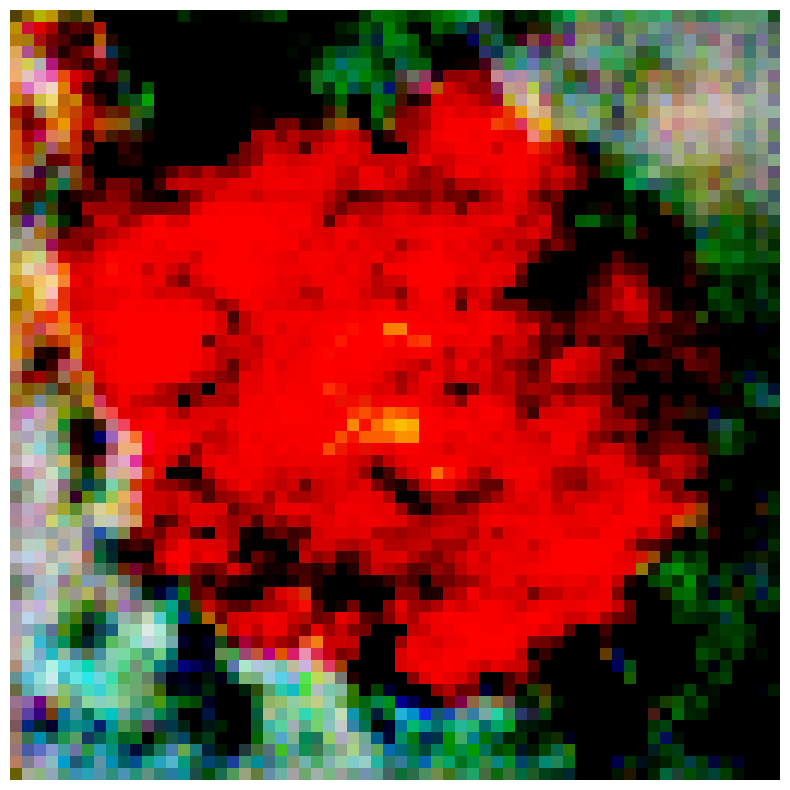

Epoch [197/200]  Loss D: 0.4772, Loss G: 4.6011


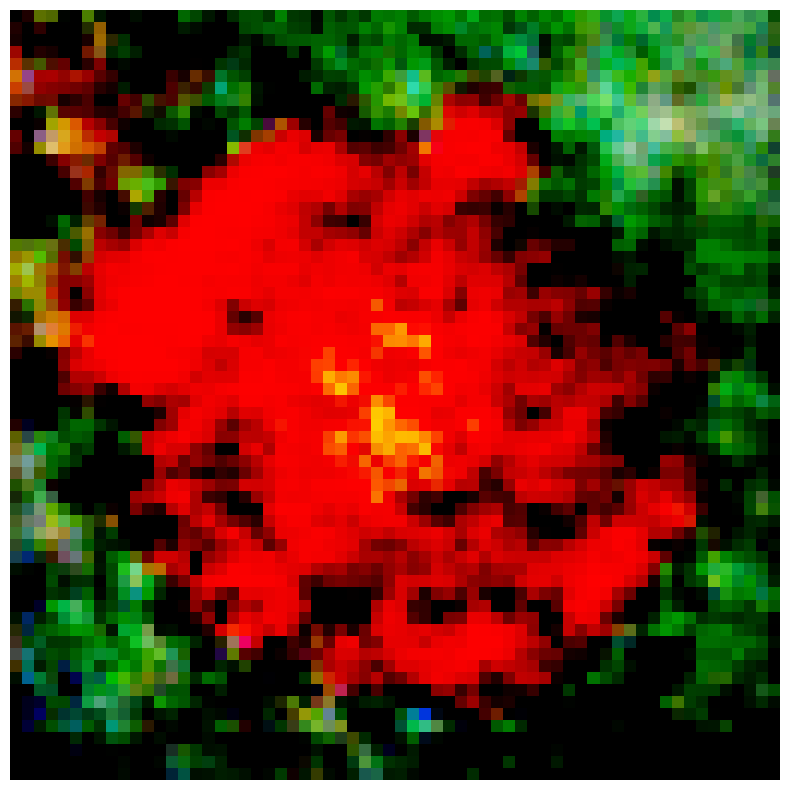

Epoch [198/200]  Loss D: 1.1144, Loss G: 1.5275


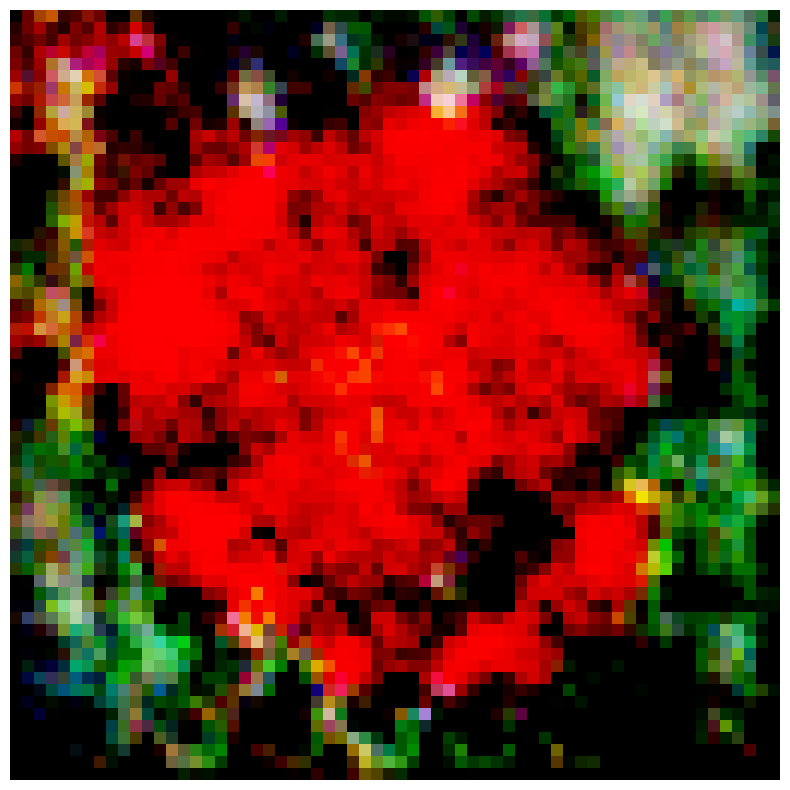

Epoch [199/200]  Loss D: 0.3432, Loss G: 3.6779


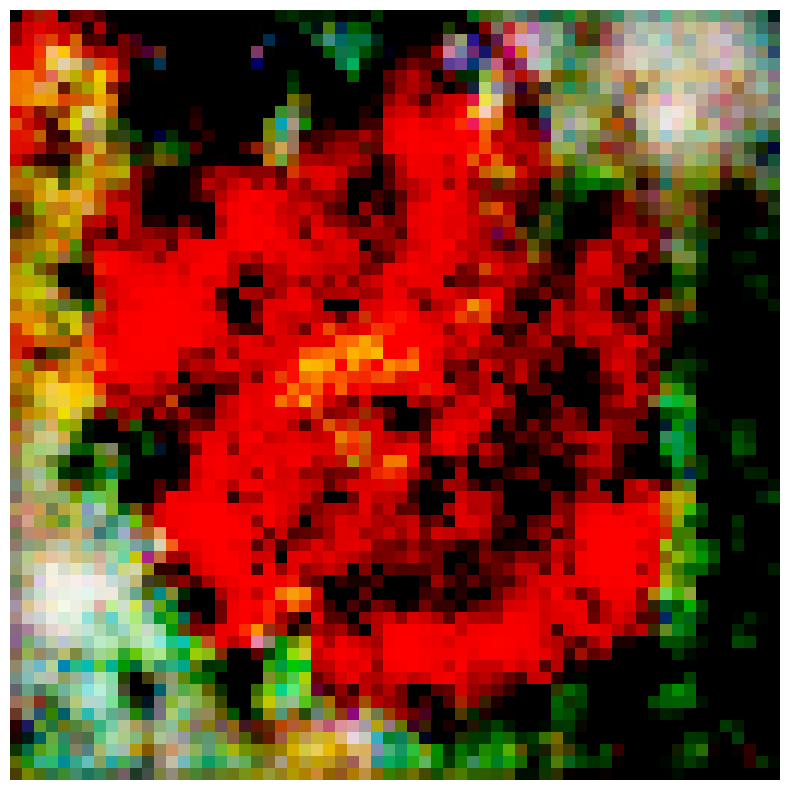

Training finished!


In [36]:
for epoch in range(num_epochs):
  for batch_idx, (real,_) in enumerate(dataloader):
    real=real.to(device)
    batch_size=real.size(0)

    noise=torch.randn(batch_size,latent_dim,1,1).to(device)
    fake=gen(noise)
    disc_real=disc(real).view(-1)
    loss_disc_real=criterion(disc_real,torch.ones_like(disc_real))
    disc_fake=disc(fake.detach()).view(-1)
    loss_disc_fake=criterion(disc_fake,torch.zeros_like(disc_fake))
    loss_disc=(loss_disc_real+loss_disc_fake)/2

    optimizer_disc.zero_grad()
    loss_disc.backward()
    optimizer_disc.step()
    output=disc(fake).view(-1)
    loss_gen=criterion(output,torch.ones_like(output))
    optimizer_gen.zero_grad()
    loss_gen.backward()
    optimizer_gen.step()
  print(f"Epoch [{epoch}/{num_epochs}]  Loss D: {loss_disc:.4f}, Loss G: {loss_gen:.4f}")
  if epoch % 1 == 0:
        with torch.no_grad():
            fake_images = gen(fixed_noise).detach().cpu()
            save_image(fake_images, f"generated/epoch_{epoch}.png", normalize=True)

            grid_img = fake_images.permute(0, 2, 3, 1).numpy()
            plt.figure(figsize=(10, 10))
            plt.imshow(grid_img[0])
            plt.axis("off")
            plt.show()

print("Training finished!")

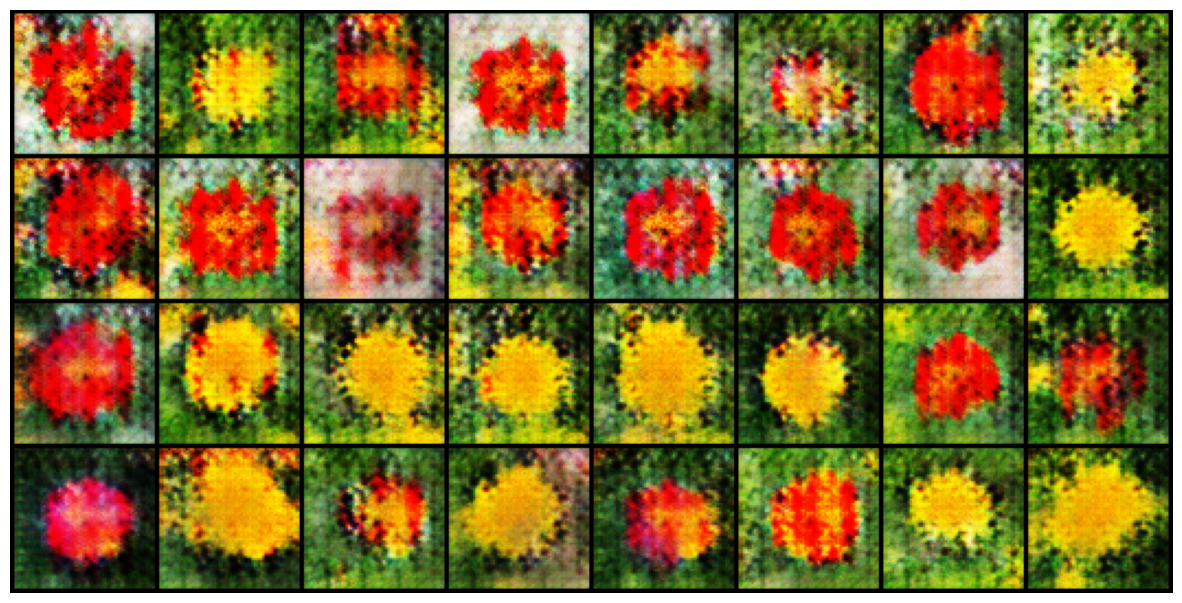

In [37]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid, save_image

with torch.no_grad():
    fake_images = gen(fixed_noise).detach().cpu()

save_image(fake_images, "generated/last_epoch.png", normalize=True)

grid = make_grid(fake_images, nrow=8, normalize=True)

plt.figure(figsize=(15, 15))
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.show()
